# **Hypothesis 1: "A higher hospitalization rate gives a higher fatality rate"**


---

H0: A higher hospitalization rate does not affect the probability of fatality rate

H1: A higher hospitalization rate increases the probability of fatality rate

H2: A higher hospitalization rate decreases the probability of fatality rate

# Introduction

---

In the first quarter of the year 2020 the novel coronavirus SARS-CoV-2 (more colloquially known as COVID 19) began appearing in the United States. Infections soon spread to Texas with the first cases reported in March. Since then COVID 19 has become a sobering part of people's daily lives, affecting everything from the economy to global politics. One disturbing trend also noticed during the height of the pandemic was a rise in fatalities among Texas residents who experianced having flu-like symptomes. This raises the question of what, if any, effect COVID 19 has on the rate of fatalities given known cases.

# Procedure


---
Our question is whether a higher hospitalization rate has any effect on observed fatalities. To answer this question we must perform exploratory analysis to determine if any statistically significant trends exist within our samples.

Having been provided with the data from the analyst, we begin by loading in our samples and visually inspecting what they offer.


In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from scipy.stats import linregress
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from scipy.stats import levene
from scipy.stats import ttest_ind as tt
import statsmodels.api as sm 
import pylab as py
from decimal import Decimal

!wget --no-check-certificate "https://gitlab.tamucc.edu/6380-hypothesis-testing-assignment-3/assignment/-/raw/master/data/hosp_clean.csv"
!wget --no-check-certificate "https://gitlab.tamucc.edu/6380-hypothesis-testing-assignment-3/assignment/-/raw/master/data/fatal_clean.csv"

hospital_data = pd.read_csv('hosp_clean.csv')
fatality_data = pd.read_csv('fatal_clean.csv')

print(hospital_data)
print(fatality_data)

--2020-10-02 05:34:40--  https://gitlab.tamucc.edu/6380-hypothesis-testing-assignment-3/assignment/-/raw/master/data/hosp_clean.csv
Resolving gitlab.tamucc.edu (gitlab.tamucc.edu)... 64.71.82.39
Connecting to gitlab.tamucc.edu (gitlab.tamucc.edu)|64.71.82.39|:443... connected.
  Unable to locally verify the issuer's authority.
HTTP request sent, awaiting response... 200 OK
Length: 21386 (21K) [text/plain]
Saving to: ‘hosp_clean.csv.3’

hosp_clean.csv.3    100%[===================>]  20.88K  --.-KB/s    in 0.06s   

2020-10-02 05:34:41 (359 KB/s) - ‘hosp_clean.csv.3’ saved [21386/21386]

--2020-10-02 05:34:41--  https://gitlab.tamucc.edu/6380-hypothesis-testing-assignment-3/assignment/-/raw/master/data/fatal_clean.csv
Resolving gitlab.tamucc.edu (gitlab.tamucc.edu)... 64.71.82.39
Connecting to gitlab.tamucc.edu (gitlab.tamucc.edu)|64.71.82.39|:443... connected.
  Unable to locally verify the issuer's authority.
HTTP request sent, awaiting response... 200 OK
Length: 119083 (116K) [text/p

We see that hospitalizations is categorized by Texas Trauma Service Area (TSA) and fatalities are given via Texas counties. Both sets of data relay their information by using daily observed case occurrences. The dates can give us a nice way to compare hospitalization numbers against fatalities.

Because it is highly unlikely that people die on the first day of hospitalization, we need to account for a lag in days between hospitalizations and fatalities. Median hospital stay of Covid-19 fatalities is 13 days according to the CDC, so we drop columns to have a one-to-one relationship to plot. 

Example: Hospital data starts on 4-12, so we drop all Fatality columns until 4-25 since that is 13 days after 4-12. Hospital 4-12 and Fatality 4-25 will be plotted against each other, as will Hospital 4-13 and Fatality 4-26, etc.

We are making the assumption that all the people who died on 4-25 had their first hospital visit on 4-12. In reality this is not true as there are days with more fatalities than corresponding hospital visits.

In [27]:
hospital_data.drop(hospital_data.iloc[:, 150:], inplace=True, axis=1)
fatality_data.drop(fatality_data.iloc[:, 1:50], inplace=True, axis=1)

Because Fatality data is based on counties and Hospital data is based on TSA health regions, we need to aggregate the Fatality data into their respective TSA regions in order to conduct our analysis.

Create dataframes representing each TSA region, with each being a deep copy of Fatality data. Afterward drop all counties (rows) that don't belong to their respective region.

In [28]:
TSA_A = fatality_data.copy(deep=True)
TSA_B = fatality_data.copy(deep=True)
TSA_C = fatality_data.copy(deep=True)
TSA_D = fatality_data.copy(deep=True)
TSA_E = fatality_data.copy(deep=True)
TSA_F = fatality_data.copy(deep=True)
TSA_G = fatality_data.copy(deep=True)
TSA_H = fatality_data.copy(deep=True)
TSA_I = fatality_data.copy(deep=True)
TSA_J = fatality_data.copy(deep=True)
TSA_K = fatality_data.copy(deep=True)
TSA_L = fatality_data.copy(deep=True)
TSA_M = fatality_data.copy(deep=True)
TSA_N = fatality_data.copy(deep=True)
TSA_O = fatality_data.copy(deep=True)
TSA_P = fatality_data.copy(deep=True)
TSA_Q = fatality_data.copy(deep=True)
TSA_R = fatality_data.copy(deep=True)
TSA_S = fatality_data.copy(deep=True)
TSA_T = fatality_data.copy(deep=True)
TSA_U = fatality_data.copy(deep=True)
TSA_V = fatality_data.copy(deep=True)

TSA_A.drop(TSA_A.loc[0:4].index, inplace=True)
TSA_A.drop(TSA_A.loc[6:21].index, inplace=True)
TSA_A.drop(TSA_A.loc[23:31].index, inplace=True)
TSA_A.drop(TSA_A.loc[33:36].index, inplace=True)
TSA_A.drop(TSA_A.loc[38:42].index, inplace=True)
TSA_A.drop(TSA_A.loc[44:54].index, inplace=True)
TSA_A.drop(TSA_A.loc[56:58].index, inplace=True)
TSA_A.drop(TSA_A.loc[60:63].index, inplace=True)
TSA_A.drop(TSA_A.loc[65:88].index, inplace=True)
TSA_A.drop(TSA_A.loc[90:94].index, inplace=True)
TSA_A.drop(TSA_A.loc[96:96].index, inplace=True)
TSA_A.drop(TSA_A.loc[98:101].index, inplace=True)
TSA_A.drop(TSA_A.loc[103:104].index, inplace=True)
TSA_A.drop(TSA_A.loc[106:115].index, inplace=True)
TSA_A.drop(TSA_A.loc[117:146].index, inplace=True)
TSA_A.drop(TSA_A.loc[148:169].index, inplace=True)
TSA_A.drop(TSA_A.loc[171:177].index, inplace=True)
TSA_A.drop(TSA_A.loc[180:183].index, inplace=True)
TSA_A.drop(TSA_A.loc[185:186].index, inplace=True)
TSA_A.drop(TSA_A.loc[188:189].index, inplace=True)
TSA_A.drop(TSA_A.loc[191:195].index, inplace=True)
TSA_A.drop(TSA_A.loc[197:209].index, inplace=True)
TSA_A.drop(TSA_A.loc[211:217].index, inplace=True)
TSA_A.drop(TSA_A.loc[219:240].index, inplace=True)
TSA_A.drop(TSA_A.loc[242:255].index, inplace=True)

TSA_B.drop(TSA_B.loc[0:7].index, inplace=True)
TSA_B.drop(TSA_B.loc[9:15].index, inplace=True)
TSA_B.drop(TSA_B.loc[17:33].index, inplace=True)
TSA_B.drop(TSA_B.loc[35:38].index, inplace=True)
TSA_B.drop(TSA_B.loc[40:49].index, inplace=True)
TSA_B.drop(TSA_B.loc[51:52].index, inplace=True)
TSA_B.drop(TSA_B.loc[54:56].index, inplace=True)
TSA_B.drop(TSA_B.loc[58:61].index, inplace=True)
TSA_B.drop(TSA_B.loc[63:75].index, inplace=True)
TSA_B.drop(TSA_B.loc[77:81].index, inplace=True)
TSA_B.drop(TSA_B.loc[83:83].index, inplace=True)
TSA_B.drop(TSA_B.loc[85:93].index, inplace=True)
TSA_B.drop(TSA_B.loc[95:108].index, inplace=True)
TSA_B.drop(TSA_B.loc[110:130].index, inplace=True)
TSA_B.drop(TSA_B.loc[132:133].index, inplace=True)
TSA_B.drop(TSA_B.loc[135:139].index, inplace=True)
TSA_B.drop(TSA_B.loc[141:150].index, inplace=True)
TSA_B.drop(TSA_B.loc[153:171].index, inplace=True)
TSA_B.drop(TSA_B.loc[173:206].index, inplace=True)
TSA_B.drop(TSA_B.loc[208:221].index, inplace=True)
TSA_B.drop(TSA_B.loc[223:249].index, inplace=True)
TSA_B.drop(TSA_B.loc[251:255].index, inplace=True)

TSA_C.drop(TSA_C.loc[0:3].index, inplace=True)
TSA_C.drop(TSA_C.loc[5:10].index, inplace=True)
TSA_C.drop(TSA_C.loc[12:37].index, inplace=True)
TSA_C.drop(TSA_C.loc[39:76].index, inplace=True)
TSA_C.drop(TSA_C.loc[78:97].index, inplace=True)
TSA_C.drop(TSA_C.loc[99:117].index, inplace=True)
TSA_C.drop(TSA_C.loc[119:167].index, inplace=True)
TSA_C.drop(TSA_C.loc[169:241].index, inplace=True)
TSA_C.drop(TSA_C.loc[244:250].index, inplace=True)
TSA_C.drop(TSA_C.loc[252:255].index, inplace=True)

TSA_D.drop(TSA_D.loc[0:23].index, inplace=True)
TSA_D.drop(TSA_D.loc[25:28].index, inplace=True)
TSA_D.drop(TSA_D.loc[30:40].index, inplace=True)
TSA_D.drop(TSA_D.loc[42:45].index, inplace=True)
TSA_D.drop(TSA_D.loc[47:65].index, inplace=True)
TSA_D.drop(TSA_D.loc[67:74].index, inplace=True)
TSA_D.drop(TSA_D.loc[76:102].index, inplace=True)
TSA_D.drop(TSA_D.loc[104:125].index, inplace=True)
TSA_D.drop(TSA_D.loc[127:136].index, inplace=True)
TSA_D.drop(TSA_D.loc[138:166].index, inplace=True)
TSA_D.drop(TSA_D.loc[168:175].index, inplace=True)
TSA_D.drop(TSA_D.loc[177:207].index, inplace=True)
TSA_D.drop(TSA_D.loc[209:213].index, inplace=True)
TSA_D.drop(TSA_D.loc[215:215].index, inplace=True)
TSA_D.drop(TSA_D.loc[217:219].index, inplace=True)
TSA_D.drop(TSA_D.loc[221:222].index, inplace=True)
TSA_D.drop(TSA_D.loc[224:255].index, inplace=True)

TSA_E.drop(TSA_E.loc[0:41].index, inplace=True)
TSA_E.drop(TSA_E.loc[43:47].index, inplace=True)
TSA_E.drop(TSA_E.loc[49:55].index, inplace=True)
TSA_E.drop(TSA_E.loc[57:60].index, inplace=True)
TSA_E.drop(TSA_E.loc[62:69].index, inplace=True)
TSA_E.drop(TSA_E.loc[72:72].index, inplace=True)
TSA_E.drop(TSA_E.loc[74:89].index, inplace=True)
TSA_E.drop(TSA_E.loc[91:109].index, inplace=True)
TSA_E.drop(TSA_E.loc[111:114].index, inplace=True)
TSA_E.drop(TSA_E.loc[116:124].index, inplace=True)
TSA_E.drop(TSA_E.loc[126:127].index, inplace=True)
TSA_E.drop(TSA_E.loc[129:173].index, inplace=True)
TSA_E.drop(TSA_E.loc[175:180].index, inplace=True)
TSA_E.drop(TSA_E.loc[182:182].index, inplace=True)
TSA_E.drop(TSA_E.loc[184:197].index, inplace=True)
TSA_E.drop(TSA_E.loc[199:211].index, inplace=True)
TSA_E.drop(TSA_E.loc[213:218].index, inplace=True)
TSA_E.drop(TSA_E.loc[220:247].index, inplace=True)
TSA_E.drop(TSA_E.loc[249:255].index, inplace=True)

TSA_F.drop(TSA_F.loc[0:17].index, inplace=True)
TSA_F.drop(TSA_F.loc[19:32].index, inplace=True)
TSA_F.drop(TSA_F.loc[34:59].index, inplace=True)
TSA_F.drop(TSA_F.loc[61:110].index, inplace=True)
TSA_F.drop(TSA_F.loc[112:138].index, inplace=True)
TSA_F.drop(TSA_F.loc[140:170].index, inplace=True)
TSA_F.drop(TSA_F.loc[172:192].index, inplace=True)
TSA_F.drop(TSA_F.loc[194:223].index, inplace=True)
TSA_F.drop(TSA_F.loc[225:255].index, inplace=True)

TSA_G.drop(TSA_G.loc[1:30].index, inplace=True)
TSA_G.drop(TSA_G.loc[32:35].index, inplace=True)
TSA_G.drop(TSA_G.loc[37:78].index, inplace=True)
TSA_G.drop(TSA_G.loc[81:90].index, inplace=True)
TSA_G.drop(TSA_G.loc[92:100].index, inplace=True)
TSA_G.drop(TSA_G.loc[102:105].index, inplace=True)
TSA_G.drop(TSA_G.loc[107:111].index, inplace=True)
TSA_G.drop(TSA_G.loc[113:153].index, inplace=True)
TSA_G.drop(TSA_G.loc[155:181].index, inplace=True)
TSA_G.drop(TSA_G.loc[183:188].index, inplace=True)
TSA_G.drop(TSA_G.loc[190:199].index, inplace=True)
TSA_G.drop(TSA_G.loc[201:208].index, inplace=True)
TSA_G.drop(TSA_G.loc[210:210].index, inplace=True)
TSA_G.drop(TSA_G.loc[212:226].index, inplace=True)
TSA_G.drop(TSA_G.loc[228:228].index, inplace=True)
TSA_G.drop(TSA_G.loc[230:232].index, inplace=True)
TSA_G.drop(TSA_G.loc[234:248].index, inplace=True)
TSA_G.drop(TSA_G.loc[250:255].index, inplace=True)

TSA_H.drop(TSA_H.loc[0:1].index, inplace=True)
TSA_H.drop(TSA_H.loc[3:172].index, inplace=True)
TSA_H.drop(TSA_H.loc[174:185].index, inplace=True)
TSA_H.drop(TSA_H.loc[187:200].index, inplace=True)
TSA_H.drop(TSA_H.loc[204:227].index, inplace=True)
TSA_H.drop(TSA_H.loc[229:255].index, inplace=True)

TSA_I.drop(TSA_I.loc[0:53].index, inplace=True)
TSA_I.drop(TSA_I.loc[55:68].index, inplace=True)
TSA_I.drop(TSA_I.loc[70:113].index, inplace=True)
TSA_I.drop(TSA_I.loc[115:255].index, inplace=True)

TSA_J.drop(TSA_J.loc[0:0].index, inplace=True)
TSA_J.drop(TSA_J.loc[2:20].index, inplace=True)
TSA_J.drop(TSA_J.loc[22:50].index, inplace=True)
TSA_J.drop(TSA_J.loc[52:66].index, inplace=True)
TSA_J.drop(TSA_J.loc[68:85].index, inplace=True)
TSA_J.drop(TSA_J.loc[87:112].index, inplace=True)
TSA_J.drop(TSA_J.loc[114:120].index, inplace=True)
TSA_J.drop(TSA_J.loc[122:149].index, inplace=True)
TSA_J.drop(TSA_J.loc[151:154].index, inplace=True)
TSA_J.drop(TSA_J.loc[156:163].index, inplace=True)
TSA_J.drop(TSA_J.loc[165:184].index, inplace=True)
TSA_J.drop(TSA_J.loc[186:187].index, inplace=True)
TSA_J.drop(TSA_J.loc[189:193].index, inplace=True)
TSA_J.drop(TSA_J.loc[195:220].index, inplace=True)
TSA_J.drop(TSA_J.loc[222:229].index, inplace=True)
TSA_J.drop(TSA_J.loc[231:236].index, inplace=True)
TSA_J.drop(TSA_J.loc[238:246].index, inplace=True)
TSA_J.drop(TSA_J.loc[248:255].index, inplace=True)

TSA_K.drop(TSA_K.loc[0:39].index, inplace=True)
TSA_K.drop(TSA_K.loc[41:46].index, inplace=True)
TSA_K.drop(TSA_K.loc[48:51].index, inplace=True)
TSA_K.drop(TSA_K.loc[53:116].index, inplace=True)
TSA_K.drop(TSA_K.loc[118:132].index, inplace=True)
TSA_K.drop(TSA_K.loc[134:155].index, inplace=True)
TSA_K.drop(TSA_K.loc[157:158].index, inplace=True)
TSA_K.drop(TSA_K.loc[160:162].index, inplace=True)
TSA_K.drop(TSA_K.loc[164:190].index, inplace=True)
TSA_K.drop(TSA_K.loc[192:198].index, inplace=True)
TSA_K.drop(TSA_K.loc[200:205].index, inplace=True)
TSA_K.drop(TSA_K.loc[207:214].index, inplace=True)
TSA_K.drop(TSA_K.loc[216:216].index, inplace=True)
TSA_K.drop(TSA_K.loc[218:224].index, inplace=True)
TSA_K.drop(TSA_K.loc[226:255].index, inplace=True)

TSA_L.drop(TSA_L.loc[0:12].index, inplace=True)
TSA_L.drop(TSA_L.loc[14:48].index, inplace=True)
TSA_L.drop(TSA_L.loc[50:95].index, inplace=True)
TSA_L.drop(TSA_L.loc[97:140].index, inplace=True)
TSA_L.drop(TSA_L.loc[142:164].index, inplace=True)
TSA_L.drop(TSA_L.loc[167:255].index, inplace=True)

TSA_M.drop(TSA_M.loc[0:16].index, inplace=True)
TSA_M.drop(TSA_M.loc[18:71].index, inplace=True)
TSA_M.drop(TSA_M.loc[73:107].index, inplace=True)
TSA_M.drop(TSA_M.loc[109:145].index, inplace=True)
TSA_M.drop(TSA_M.loc[147:159].index, inplace=True)
TSA_M.drop(TSA_M.loc[161:255].index, inplace=True)

TSA_N.drop(TSA_N.loc[0:19].index, inplace=True)
TSA_N.drop(TSA_N.loc[21:24].index, inplace=True)
TSA_N.drop(TSA_N.loc[26:91].index, inplace=True)
TSA_N.drop(TSA_N.loc[93:143].index, inplace=True)
TSA_N.drop(TSA_N.loc[145:152].index, inplace=True)
TSA_N.drop(TSA_N.loc[154:196].index, inplace=True)
TSA_N.drop(TSA_N.loc[198:237].index, inplace=True)
TSA_N.drop(TSA_N.loc[239:255].index, inplace=True)

TSA_O.drop(TSA_O.loc[0:9].index, inplace=True)
TSA_O.drop(TSA_O.loc[11:14].index, inplace=True)
TSA_O.drop(TSA_O.loc[16:25].index, inplace=True)
TSA_O.drop(TSA_O.loc[28:73].index, inplace=True)
TSA_O.drop(TSA_O.loc[75:103].index, inplace=True)
TSA_O.drop(TSA_O.loc[105:142].index, inplace=True)
TSA_O.drop(TSA_O.loc[144:148].index, inplace=True)
TSA_O.drop(TSA_O.loc[150:204].index, inplace=True)
TSA_O.drop(TSA_O.loc[206:225].index, inplace=True)
TSA_O.drop(TSA_O.loc[227:244].index, inplace=True)
TSA_O.drop(TSA_O.loc[246:255].index, inplace=True)

TSA_P.drop(TSA_P.loc[0:5].index, inplace=True)
TSA_P.drop(TSA_P.loc[7:8].index, inplace=True)
TSA_P.drop(TSA_P.loc[10:13].index, inplace=True)
TSA_P.drop(TSA_P.loc[15:44].index, inplace=True)
TSA_P.drop(TSA_P.loc[46:62].index, inplace=True)
TSA_P.drop(TSA_P.loc[64:67].index, inplace=True)
TSA_P.drop(TSA_P.loc[69:80].index, inplace=True)
TSA_P.drop(TSA_P.loc[82:84].index, inplace=True)
TSA_P.drop(TSA_P.loc[86:87].index, inplace=True)
TSA_P.drop(TSA_P.loc[89:92].index, inplace=True)
TSA_P.drop(TSA_P.loc[94:126].index, inplace=True)
TSA_P.drop(TSA_P.loc[128:128].index, inplace=True)
TSA_P.drop(TSA_P.loc[130:131].index, inplace=True)
TSA_P.drop(TSA_P.loc[133:134].index, inplace=True)
TSA_P.drop(TSA_P.loc[136:137].index, inplace=True)
TSA_P.drop(TSA_P.loc[139:157].index, inplace=True)
TSA_P.drop(TSA_P.loc[159:161].index, inplace=True)
TSA_P.drop(TSA_P.loc[163:191].index, inplace=True)
TSA_P.drop(TSA_P.loc[193:230].index, inplace=True)
TSA_P.drop(TSA_P.loc[233:245].index, inplace=True)
TSA_P.drop(TSA_P.loc[247:252].index, inplace=True)
TSA_P.drop(TSA_P.loc[254:255].index, inplace=True)

TSA_Q.drop(TSA_Q.loc[0:6].index, inplace=True)
TSA_Q.drop(TSA_Q.loc[8:43].index, inplace=True)
TSA_Q.drop(TSA_Q.loc[45:77].index, inplace=True)
TSA_Q.drop(TSA_Q.loc[79:99].index, inplace=True)
TSA_Q.drop(TSA_Q.loc[101:156].index, inplace=True)
TSA_Q.drop(TSA_Q.loc[158:168].index, inplace=True)
TSA_Q.drop(TSA_Q.loc[170:234].index, inplace=True)
TSA_Q.drop(TSA_Q.loc[237:239].index, inplace=True)
TSA_Q.drop(TSA_Q.loc[241:255].index, inplace=True)

TSA_R.drop(TSA_R.loc[0:18].index, inplace=True)
TSA_R.drop(TSA_R.loc[20:34].index, inplace=True)
TSA_R.drop(TSA_R.loc[36:82].index, inplace=True)
TSA_R.drop(TSA_R.loc[84:98].index, inplace=True)
TSA_R.drop(TSA_R.loc[100:119].index, inplace=True)
TSA_R.drop(TSA_R.loc[121:121].index, inplace=True)
TSA_R.drop(TSA_R.loc[123:144].index, inplace=True)
TSA_R.drop(TSA_R.loc[146:174].index, inplace=True)
TSA_R.drop(TSA_R.loc[176:179].index, inplace=True)
TSA_R.drop(TSA_R.loc[181:255].index, inplace=True)

TSA_S.drop(TSA_S.loc[0:27].index, inplace=True)
TSA_S.drop(TSA_S.loc[29:57].index, inplace=True)
TSA_S.drop(TSA_S.loc[59:86].index, inplace=True)
TSA_S.drop(TSA_S.loc[88:118].index, inplace=True)
TSA_S.drop(TSA_S.loc[120:141].index, inplace=True)
TSA_S.drop(TSA_S.loc[143:233].index, inplace=True)
TSA_S.drop(TSA_S.loc[235:255].index, inplace=True)

TSA_T.drop(TSA_T.loc[0:122].index, inplace=True)
TSA_T.drop(TSA_T.loc[124:238].index, inplace=True)
TSA_T.drop(TSA_T.loc[240:251].index, inplace=True)
TSA_T.drop(TSA_T.loc[253:255].index, inplace=True)

TSA_U.drop(TSA_U.loc[0:2].index, inplace=True)
TSA_U.drop(TSA_U.loc[4:11].index, inplace=True)
TSA_U.drop(TSA_U.loc[13:22].index, inplace=True)
TSA_U.drop(TSA_U.loc[24:64].index, inplace=True)
TSA_U.drop(TSA_U.loc[66:123].index, inplace=True)
TSA_U.drop(TSA_U.loc[125:129].index, inplace=True)
TSA_U.drop(TSA_U.loc[131:135].index, inplace=True)
TSA_U.drop(TSA_U.loc[137:147].index, inplace=True)
TSA_U.drop(TSA_U.loc[149:160].index, inplace=True)
TSA_U.drop(TSA_U.loc[162:176].index, inplace=True)
TSA_U.drop(TSA_U.loc[178:194].index, inplace=True)
TSA_U.drop(TSA_U.loc[196:203].index, inplace=True)
TSA_U.drop(TSA_U.loc[205:255].index, inplace=True)

TSA_V.drop(TSA_V.loc[0:29].index, inplace=True)
TSA_V.drop(TSA_V.loc[31:106].index, inplace=True)
TSA_V.drop(TSA_V.loc[108:212].index, inplace=True)
TSA_V.drop(TSA_V.loc[214:243].index, inplace=True)
TSA_V.drop(TSA_V.loc[245:255].index, inplace=True)


In the loop where we perform our analysis and plotting, we will need to use a dataframe method called '.at()' to extract our numerical values. However, '.at()' only works with integer based column names. Therefore it is necessary to rename all columns in our dataframes to integer values.

In [29]:
hospital_data.columns=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149]

TSA_A.columns=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148]

TSA_B.columns=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148]

TSA_C.columns=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148]

TSA_D.columns=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148]

TSA_E.columns=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148]

TSA_F.columns=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148]

TSA_G.columns=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148]

TSA_H.columns=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148]

TSA_I.columns=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148]

TSA_J.columns=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148]

TSA_K.columns=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148]

TSA_L.columns=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148]

TSA_M.columns=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148]

TSA_N.columns=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148]

TSA_O.columns=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148]

TSA_P.columns=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148]

TSA_Q.columns=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148]

TSA_R.columns=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148]

TSA_S.columns=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148]

TSA_T.columns=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148]

TSA_U.columns=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148]

TSA_V.columns=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148]


In [30]:
# The regions dictionary contains the TSA dataframes and respective labels for plots.
regions = {
        "A" : (TSA_A, "Hospitalizations vs. Fatalities for TSA A between ", "COVID 19 Hospitalizations", "COVID 19 Fatalities", "TSA A Residual Plot between ", "TSA A Linear Regression between ", "TSA A"),
        "B" : (TSA_B, "Hospitalizations vs. Fatalities for TSA B between ", "COVID 19 Hospitalizations", "COVID 19 Fatalities", "TSA B Residual Plot between ", "TSA B Linear Regression between ", "TSA B"),
        "C" : (TSA_C, "Hospitalizations vs. Fatalities for TSA C between ", "COVID 19 Hospitalizations", "COVID 19 Fatalities", "TSA C Residual Plot between ", "TSA C Linear Regression between ", "TSA C"),
        "D" : (TSA_D, "Hospitalizations vs. Fatalities for TSA D between ", "COVID 19 Hospitalizations", "COVID 19 Fatalities", "TSA D Residual Plot between ", "TSA D Linear Regression between ", "TSA D"),
        "E" : (TSA_E, "Hospitalizations vs. Fatalities for TSA E between ", "COVID 19 Hospitalizations", "COVID 19 Fatalities", "TSA E Residual Plot between ", "TSA E Linear Regression between ", "TSA E"),
        "F" : (TSA_F, "Hospitalizations vs. Fatalities for TSA F between ", "COVID 19 Hospitalizations", "COVID 19 Fatalities", "TSA F Residual Plot between ", "TSA F Linear Regression between ", "TSA F"),
        "G" : (TSA_G, "Hospitalizations vs. Fatalities for TSA G between ", "COVID 19 Hospitalizations", "COVID 19 Fatalities", "TSA G Residual Plot between ", "TSA G Linear Regression between ", "TSA G"),
        "H" : (TSA_H, "Hospitalizations vs. Fatalities for TSA H between ", "COVID 19 Hospitalizations", "COVID 19 Fatalities", "TSA H Residual Plot between ", "TSA H Linear Regression between ", "TSA H"),
        "I" : (TSA_I, "Hospitalizations vs. Fatalities for TSA I between ", "COVID 19 Hospitalizations", "COVID 19 Fatalities", "TSA I Residual Plot between ", "TSA I Linear Regression between ", "TSA I"),
        "J" : (TSA_J, "Hospitalizations vs. Fatalities for TSA J between ", "COVID 19 Hospitalizations", "COVID 19 Fatalities", "TSA J Residual Plot between ", "TSA J Linear Regression between ", "TSA J"),
        "K" : (TSA_K, "Hospitalizations vs. Fatalities for TSA K between ", "COVID 19 Hospitalizations", "COVID 19 Fatalities", "TSA K Residual Plot between ", "TSA K Linear Regression between ", "TSA K"),
        "L" : (TSA_L, "Hospitalizations vs. Fatalities for TSA L between ", "COVID 19 Hospitalizations", "COVID 19 Fatalities", "TSA L Residual Plot between ", "TSA L Linear Regression between ", "TSA L"),
        "M" : (TSA_M, "Hospitalizations vs. Fatalities for TSA M between ", "COVID 19 Hospitalizations", "COVID 19 Fatalities", "TSA M Residual Plot between ", "TSA M Linear Regression between ", "TSA M"),
        "N" : (TSA_N, "Hospitalizations vs. Fatalities for TSA N between ", "COVID 19 Hospitalizations", "COVID 19 Fatalities", "TSA N Residual Plot between ", "TSA N Linear Regression between ", "TSA N"),
        "O" : (TSA_O, "Hospitalizations vs. Fatalities for TSA O between ", "COVID 19 Hospitalizations", "COVID 19 Fatalities", "TSA O Residual Plot between ", "TSA O Linear Regression between ", "TSA O"),
        "P" : (TSA_P, "Hospitalizations vs. Fatalities for TSA P between ", "COVID 19 Hospitalizations", "COVID 19 Fatalities", "TSA P Residual Plot between ", "TSA P Linear Regression between ", "TSA P"),
        "Q" : (TSA_Q, "Hospitalizations vs. Fatalities for TSA Q between ", "COVID 19 Hospitalizations", "COVID 19 Fatalities", "TSA Q Residual Plot between ", "TSA Q Linear Regression between ", "TSA Q"),
        "R" : (TSA_R, "Hospitalizations vs. Fatalities for TSA R between ", "COVID 19 Hospitalizations", "COVID 19 Fatalities", "TSA R Residual Plot between ", "TSA R Linear Regression between ", "TSA R"),
        "S" : (TSA_S, "Hospitalizations vs. Fatalities for TSA S between ", "COVID 19 Hospitalizations", "COVID 19 Fatalities", "TSA S Residual Plot between ", "TSA S Linear Regression between ", "TSA S"),
        "T" : (TSA_T, "Hospitalizations vs. Fatalities for TSA T between ", "COVID 19 Hospitalizations", "COVID 19 Fatalities", "TSA T Residual Plot between ", "TSA T Linear Regression between ", "TSA T"),
        "U" : (TSA_U, "Hospitalizations vs. Fatalities for TSA U between ", "COVID 19 Hospitalizations", "COVID 19 Fatalities", "TSA U Residual Plot between ", "TSA U Linear Regression between ", "TSA U"),
        "V" : (TSA_V, "Hospitalizations vs. Fatalities for TSA V between ", "COVID 19 Hospitalizations", "COVID 19 Fatalities", "TSA V Residual Plot between ", "TSA V Linear Regression between ", "TSA V")
        }

# The dates dictionary contains strings for use in plot titles.
dates = {0 : "April 12 - May 10",
         1 : "May 11 - June 08",
         2 : "June 09 - July 07",
         3 : "July 08 - Aug 05",
         4 : "Aug 06 - Sep 06"
         }


# Testing Phase

---

Now that preprocessing is out of the way, we will conduct our testing of the data. Because the data is of daily occurrences, we can break our observations into months for each TSA region. For the observation periods between April 12 to August 05 we will be studying 29 samples per observation in order to keep our sample size at the limit of conducting a t-test analysis. For the last observation period of August 06 to September 06, we again conduct a two-sided t-test for this period dispite there being more than 30 data points. It is acknowledged in advance that this last observation will be tainted by going beyond the ascribed limits of a two-sided t-test, but for a quick overveiw of trends between the months of April 12 to September 06, which is already a fairly small sample of time, we feel a t-test for this last period isn't too controversial.

Test conducted in this phase are:

Pearson Correlation
Spearman Correlation
Linear Regression
Residual Analysis
QQ-Plot for Normality
Levene Test
Two-Sided T-Test

Pearson and Spearman correlations are both displayed, as there isn't a consenus as to what correlation test is appropriate for observation of counts data, as the type we are working with. In anycase, both values are for the most part in sync with each other in terms of magnitude and value.

Linear Regression is used to observe if our data follows a linear relationship; indeed, if our suspicion of a relation between hospitalizations and fatalities is true then we should expect to see such a linear trend taking shape in our data.

Residual Analysis and QQ-Plotting are used to test if our data follows a normal distribution. Since these samples are observed frequencies of medical case studies, it is suspected that these samples do not follow a normal distribution.

Levene Test is used to determine if our data have equal variance, which is another assumption of normality in our samples. Should variances indeed be different, then a Welch's t-test is performed instead of a regular t-test, as Welch's test is better suited to abnormal data distributions.

Two-Sided T-Test is used as it is a convenient test to show if small samples of data have different means.

This loop will plot and conduct tests for each TSA region.


---



Loop flows as follows:

    (1) for each TSA region A,...,V
        (1.1) unpack dictionary tuples for corresponding plot lables
        (1.2) reset loop counters
        
        (1.3.1) while current hospital index is less than total hospital columns:
            (1.3.2) define lists for holding monthly hospitalizations and fatalities
            (1.3.3) iterate through hospital data, appending to list until month passes
            (1.3.4) iterate through fatality data, appending to list the sum of month's data
            (1.3.5) make scatter plot of current month with appropriate labels
            (1.3.6) make list into arrays for mathmatical use
            (1.3.7) calculate linear regression stats and plot it
            (1.3.8) calculate correlation and interpret meaning
            (1.3.9) display linear regression p-value and interpret meaning
            (1.3.10) make residual plot of current month
            (1.3.11) calculate levene p-value, interpret meaning, and use appropriate t-test
            (1.3.12) interpret meaning of t-test
            (1.3.13) delete lists


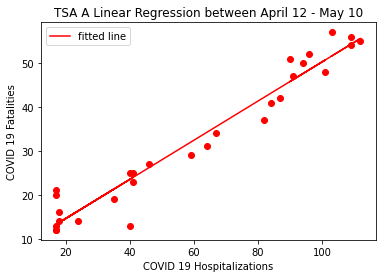

slope: 0.445610    intercept: 5.669692
R-squared: 0.945388 
Pearson corrrelation: 0.972311    Spearman correlation: 0.953290
Pearson p-value: 1.40E-18
Spearman p-value: 1.46E-15
This is a strongly positive relationship
A correlation p-value of 1.4026832272902857e-18 indicates that the correlation between our samples is significant and different from zero.

Linear Regression p-value: 1.40E-18
A linear regression p-value this low strongly suggests that hospitalizations has a statistically significant affect on the value of fatalities


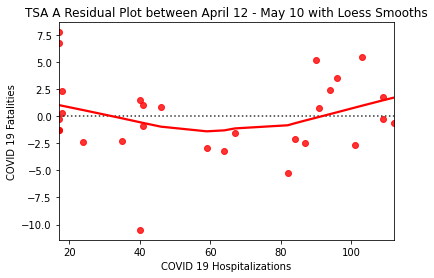

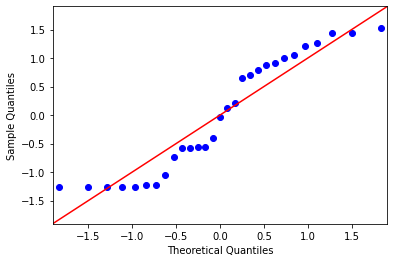

qq-plot of TSA A (April 12 - May 10) for Hospitalizations


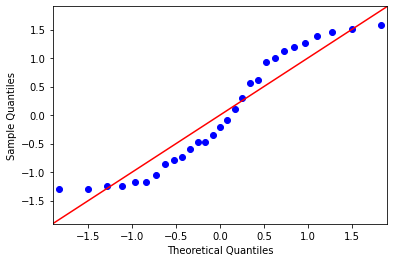

qq-plot of TSA A (April 12 - May 10) for Fatalities

levene p-value: 5.03E-7
There is strong evidence that the two samples do not have equal variances. This means it is strongly suggested to use a non-parametric analysis model to prevent commiting a Type 1 error! We therefore conduct Welch's t-test which does not assume equal population variance.

t-test p_value: 3.80E-4
There is significant evidence that the observed relationship between hospitalizations and fatalities is not due to random chance.


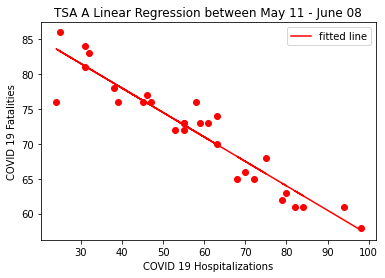

slope: -0.350540    intercept: 92.020957
R-squared: 0.892186 
Pearson corrrelation: -0.944556    Spearman correlation: -0.935386
Pearson p-value: 1.40E-14
Spearman p-value: 1.05E-13
This is a strongly negative relationship
A correlation p-value of 1.4006021852012471e-14 indicates that the correlation between our samples is significant and different from zero.

Linear Regression p-value: 1.40E-14
A linear regression p-value this low strongly suggests that hospitalizations has a statistically significant affect on the value of fatalities


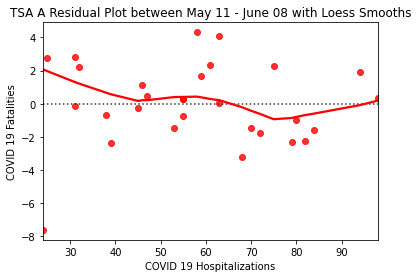

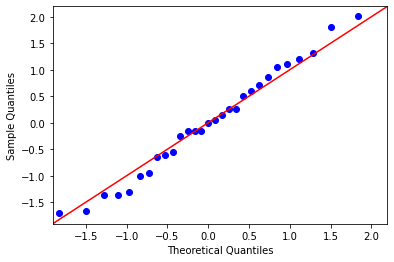

qq-plot of TSA A (May 11 - June 08) for Hospitalizations


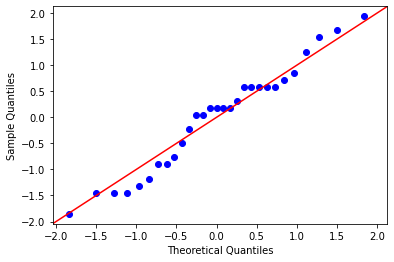

qq-plot of TSA A (May 11 - June 08) for Fatalities

levene p-value: 4.35E-5
There is strong evidence that the two samples do not have equal variances. This means it is strongly suggested to use a non-parametric analysis model to prevent commiting a Type 1 error! We therefore conduct Welch's t-test which does not assume equal population variance.

t-test p_value: 1.62E-3
There is significant evidence that the observed relationship between hospitalizations and fatalities is not due to random chance.


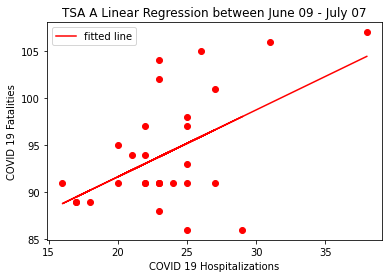

slope: 0.710997    intercept: 77.417240
R-squared: 0.275508 
Pearson corrrelation: 0.524888    Spearman correlation: 0.358534
Pearson p-value: 3.46E-3
Spearman p-value: 5.61E-2
This is a weakly positive relationship
A correlation p-value of 0.003462121304118907 indicates that the correlation between our samples is significant and different from zero.

Linear Regression p-value: 3.46E-3
A linear regression p-value this low strongly suggests that hospitalizations has a statistically significant affect on the value of fatalities


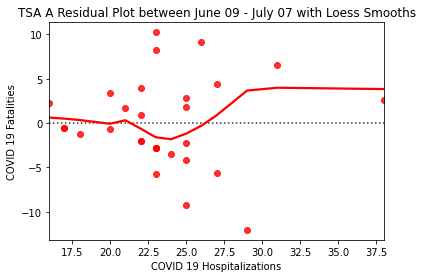

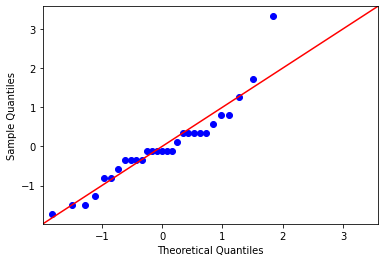

qq-plot of TSA A (June 09 - July 07) for Hospitalizations


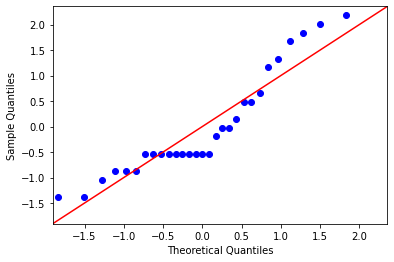

qq-plot of TSA A (June 09 - July 07) for Fatalities

levene p-value: 2.02E-1
There is not enough evidence to reject the assumption of equal variance between the samples. This means there is not enough evidence to prevent using a parametric analysis model. We therefore conduct a two-sided t-test, which assumes equal population variance.

t-test p_value: 1.38E-48
There is significant evidence that the observed relationship between hospitalizations and fatalities is not due to random chance.


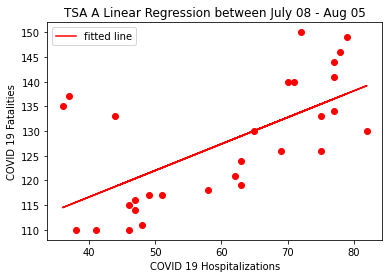

slope: 0.536763    intercept: 95.186954
R-squared: 0.406230 
Pearson corrrelation: 0.637362    Spearman correlation: 0.632852
Pearson p-value: 2.00E-4
Spearman p-value: 2.30E-4
This is a weakly positive relationship
A correlation p-value of 0.0002004130868701946 indicates that the correlation between our samples is significant and different from zero.

Linear Regression p-value: 2.00E-4
A linear regression p-value this low strongly suggests that hospitalizations has a statistically significant affect on the value of fatalities


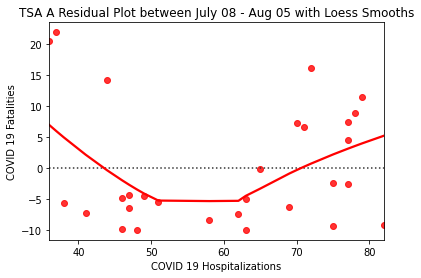

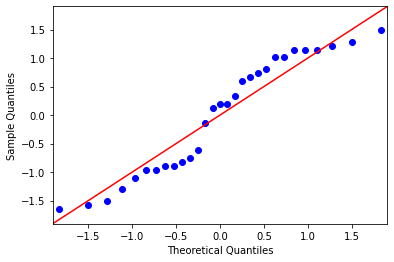

qq-plot of TSA A (July 08 - Aug 05) for Hospitalizations


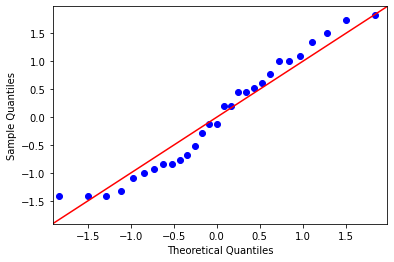

qq-plot of TSA A (July 08 - Aug 05) for Fatalities

levene p-value: 2.12E-1
There is not enough evidence to reject the assumption of equal variance between the samples. This means there is not enough evidence to prevent using a parametric analysis model. We therefore conduct a two-sided t-test, which assumes equal population variance.

t-test p_value: 1.42E-25
There is significant evidence that the observed relationship between hospitalizations and fatalities is not due to random chance.


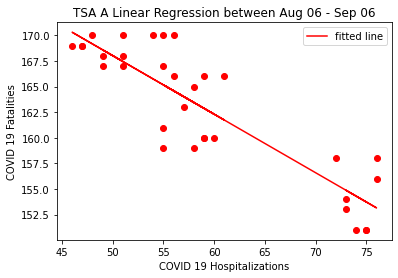

slope: -0.572118    intercept: 196.634495
R-squared: 0.772265 
Pearson corrrelation: -0.878786    Spearman correlation: -0.840281
Pearson p-value: 3.74E-11
Spearman p-value: 1.79E-9
This is a strongly negative relationship
A correlation p-value of 3.74453687646382e-11 indicates that the correlation between our samples is significant and different from zero.

Linear Regression p-value: 3.74E-11
A linear regression p-value this low strongly suggests that hospitalizations has a statistically significant affect on the value of fatalities


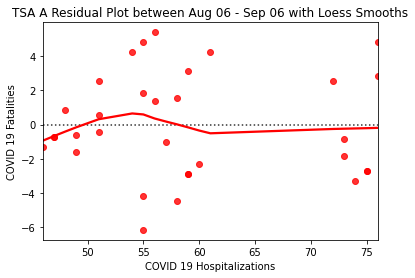

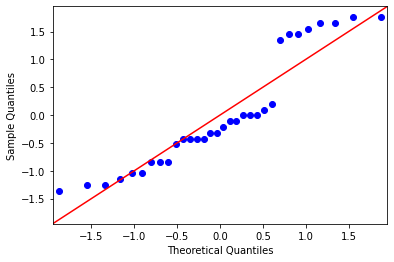

qq-plot of TSA A (Aug 06 - Sep 06) for Hospitalizations


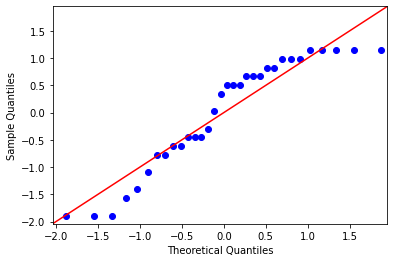

qq-plot of TSA A (Aug 06 - Sep 06) for Fatalities

levene p-value: 1.37E-1
There is not enough evidence to reject the assumption of equal variance between the samples. This means there is not enough evidence to prevent using a parametric analysis model. We therefore conduct a two-sided t-test, which assumes equal population variance.

t-test p_value: 5.51E-52
There is significant evidence that the observed relationship between hospitalizations and fatalities is not due to random chance.


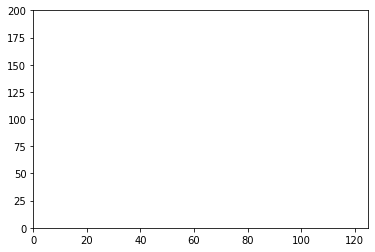

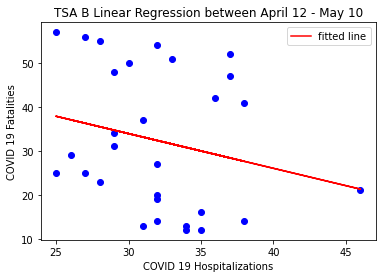

slope: -0.790164    intercept: 57.630073
R-squared: 0.053942 
Pearson corrrelation: -0.232254    Spearman correlation: -0.299482
Pearson p-value: 2.25E-1
Spearman p-value: 1.14E-1
This is a weakly negative relationship
Neither correlation p-value indicates that the correlation between our samples is significantly different from zero.

Linear Regression p-value: 2.25E-1
There is not enough evidence to conclude if hospitalizations has a statistically significant affect on the value of fatalities.


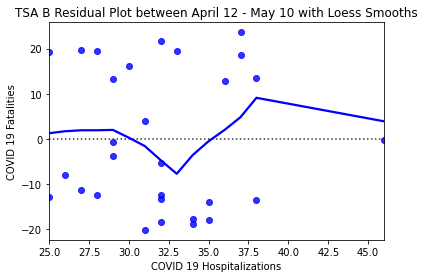

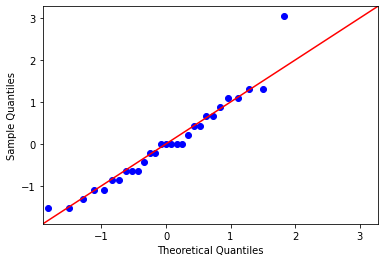

qq-plot of TSA B (April 12 - May 10) for Hospitalizations


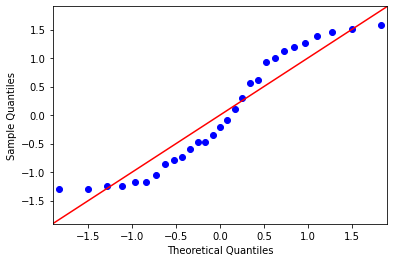

qq-plot of TSA B (April 12 - May 10) for Fatalities

levene p-value: 3.08E-8
There is strong evidence that the two samples do not have equal variances. This means it is strongly suggested to use a non-parametric analysis model to prevent commiting a Type 1 error! We therefore conduct Welch's t-test which does not assume equal population variance.

t-test p_value: 9.11E-1
There is not enough evidence to suggest that the observed relationship between hospitalizations and fatalities is due to anything but random chance.


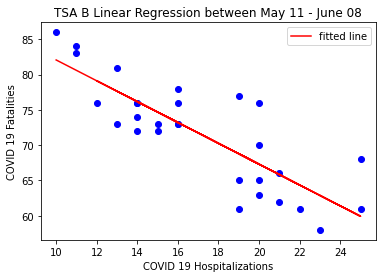

slope: -1.476244    intercept: 96.836701
R-squared: 0.681754 
Pearson corrrelation: -0.825684    Spearman correlation: -0.782474
Pearson p-value: 3.52E-8
Spearman p-value: 5.31E-7
This is a strongly negative relationship
A correlation p-value of 3.515411701200801e-08 indicates that the correlation between our samples is significant and different from zero.

Linear Regression p-value: 3.52E-8
A linear regression p-value this low strongly suggests that hospitalizations has a statistically significant affect on the value of fatalities


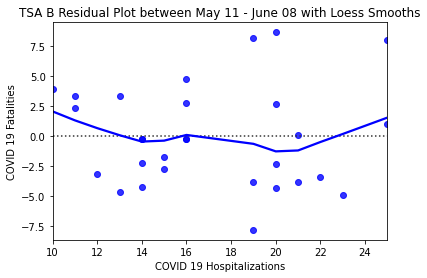

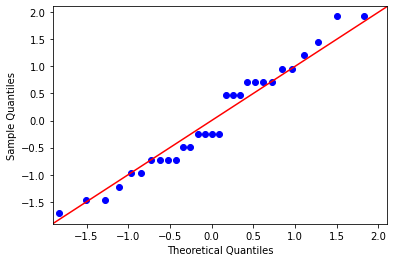

qq-plot of TSA B (May 11 - June 08) for Hospitalizations


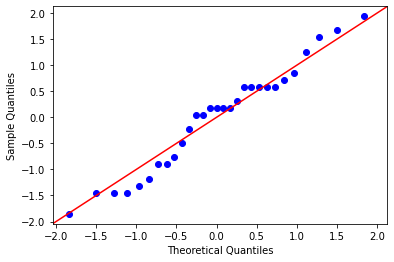

qq-plot of TSA B (May 11 - June 08) for Fatalities

levene p-value: 1.68E-2
There is strong evidence that the two samples do not have equal variances. This means it is strongly suggested to use a non-parametric analysis model to prevent commiting a Type 1 error! We therefore conduct Welch's t-test which does not assume equal population variance.

t-test p_value: 2.68E-33
There is significant evidence that the observed relationship between hospitalizations and fatalities is not due to random chance.


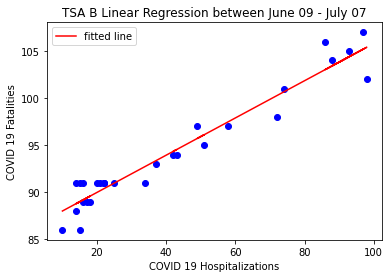

slope: 0.197711    intercept: 86.031783
R-squared: 0.935339 
Pearson corrrelation: 0.967129    Spearman correlation: 0.933837
Pearson p-value: 1.38E-17
Spearman p-value: 1.43E-13
This is a strongly positive relationship
A correlation p-value of 1.3785251429931166e-17 indicates that the correlation between our samples is significant and different from zero.

Linear Regression p-value: 1.38E-17
A linear regression p-value this low strongly suggests that hospitalizations has a statistically significant affect on the value of fatalities


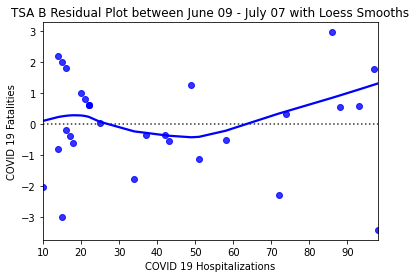

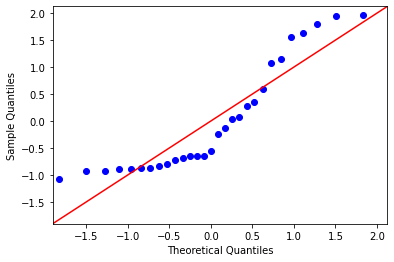

qq-plot of TSA B (June 09 - July 07) for Hospitalizations


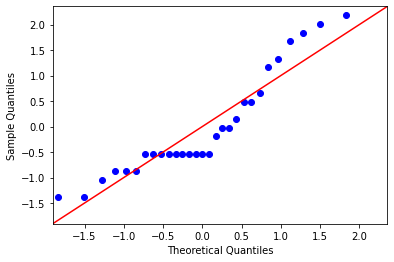

qq-plot of TSA B (June 09 - July 07) for Fatalities

levene p-value: 8.82E-5
There is strong evidence that the two samples do not have equal variances. This means it is strongly suggested to use a non-parametric analysis model to prevent commiting a Type 1 error! We therefore conduct Welch's t-test which does not assume equal population variance.

t-test p_value: 1.22E-10
There is significant evidence that the observed relationship between hospitalizations and fatalities is not due to random chance.


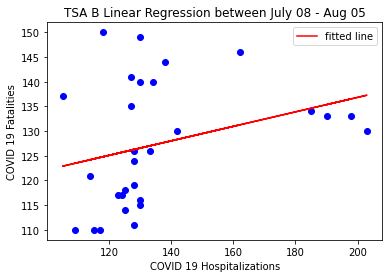

slope: 0.146580    intercept: 107.503244
R-squared: 0.090891 
Pearson corrrelation: 0.301481    Spearman correlation: 0.417357
Pearson p-value: 1.12E-1
Spearman p-value: 2.43E-2
This is a weakly positive relationship
A correlation p-value of 0.024284654609983518 indicates that the correlation between our samples is significant and different from zero.

Linear Regression p-value: 1.12E-1
There is not enough evidence to conclude if hospitalizations has a statistically significant affect on the value of fatalities.


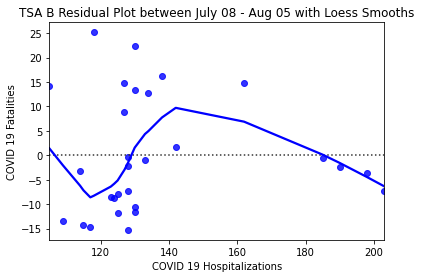

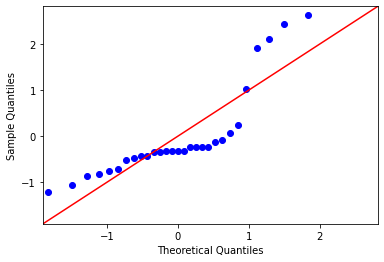

qq-plot of TSA B (July 08 - Aug 05) for Hospitalizations


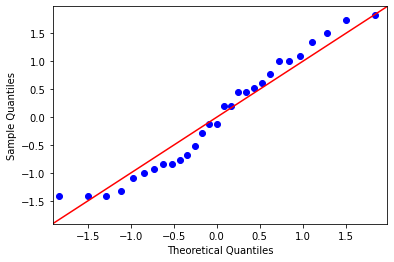

qq-plot of TSA B (July 08 - Aug 05) for Fatalities

levene p-value: 2.85E-1
There is not enough evidence to reject the assumption of equal variance between the samples. This means there is not enough evidence to prevent using a parametric analysis model. We therefore conduct a two-sided t-test, which assumes equal population variance.

t-test p_value: 1.13E-1
There is not enough evidence to suggest that the observed relationship between hospitalizations and fatalities is due to anything but random chance.


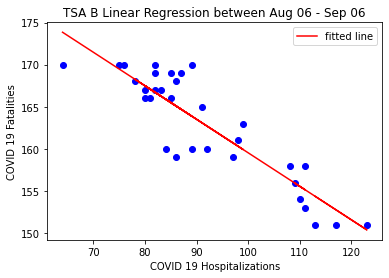

slope: -0.397757    intercept: 199.300676
R-squared: 0.795603 
Pearson corrrelation: -0.891966    Spearman correlation: -0.828641
Pearson p-value: 7.30E-12
Spearman p-value: 4.74E-9
This is a strongly negative relationship
A correlation p-value of 7.296208008452038e-12 indicates that the correlation between our samples is significant and different from zero.

Linear Regression p-value: 7.30E-12
A linear regression p-value this low strongly suggests that hospitalizations has a statistically significant affect on the value of fatalities


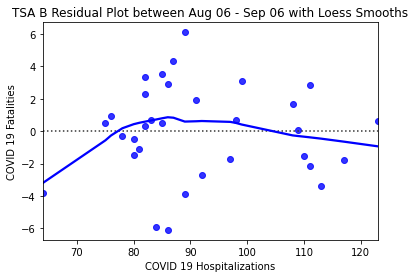

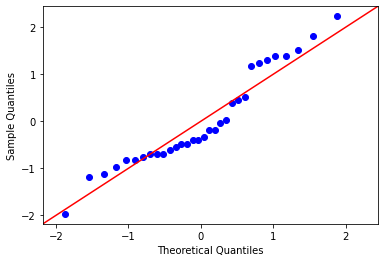

qq-plot of TSA B (Aug 06 - Sep 06) for Hospitalizations


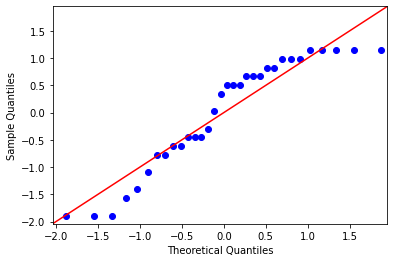

qq-plot of TSA B (Aug 06 - Sep 06) for Fatalities

levene p-value: 4.94E-3
There is strong evidence that the two samples do not have equal variances. This means it is strongly suggested to use a non-parametric analysis model to prevent commiting a Type 1 error! We therefore conduct Welch's t-test which does not assume equal population variance.

t-test p_value: 1.03E-27
There is significant evidence that the observed relationship between hospitalizations and fatalities is not due to random chance.


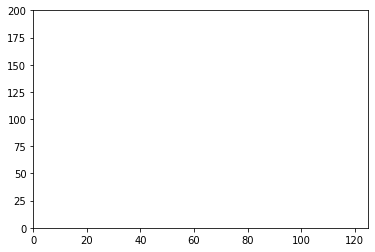

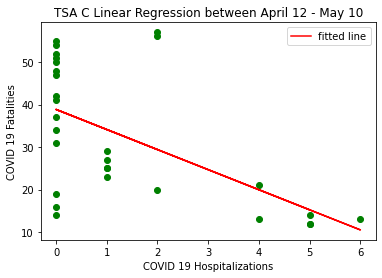

slope: -4.720066    intercept: 38.855263
R-squared: 0.330775 
Pearson corrrelation: -0.575131    Spearman correlation: -0.540095
Pearson p-value: 1.10E-3
Spearman p-value: 2.49E-3
This is a weakly negative relationship
A correlation p-value of 0.0010995594379706103 indicates that the correlation between our samples is significant and different from zero.

Linear Regression p-value: 1.10E-3
A linear regression p-value this low strongly suggests that hospitalizations has a statistically significant affect on the value of fatalities


/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/smoothers_lowess.py:165: RuntimeWarning: invalid value encountered in greater_equal
  res = _lowess(y, x, frac=frac, it=it, delta=delta)


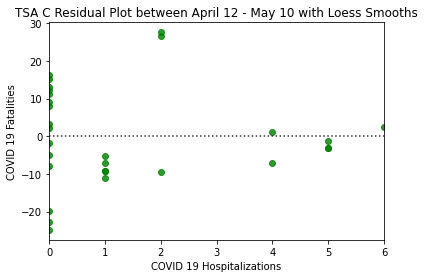

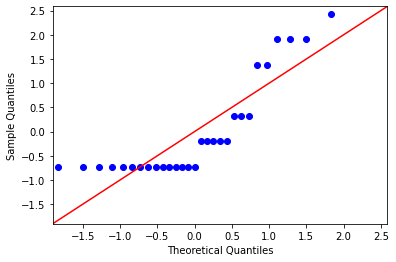

qq-plot of TSA C (April 12 - May 10) for Hospitalizations


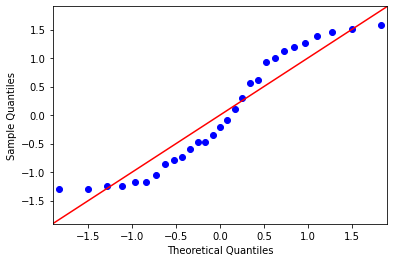

qq-plot of TSA C (April 12 - May 10) for Fatalities

levene p-value: 6.56E-11
There is strong evidence that the two samples do not have equal variances. This means it is strongly suggested to use a non-parametric analysis model to prevent commiting a Type 1 error! We therefore conduct Welch's t-test which does not assume equal population variance.

t-test p_value: 2.73E-11
There is significant evidence that the observed relationship between hospitalizations and fatalities is not due to random chance.


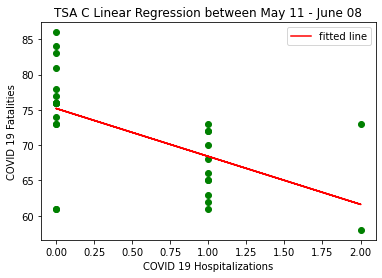

slope: -6.791411    intercept: 75.202454
R-squared: 0.327700 
Pearson corrrelation: -0.572451    Spearman correlation: -0.647480
Pearson p-value: 1.17E-3
Spearman p-value: 1.47E-4
This is a weakly negative relationship
A correlation p-value of 0.00014663619787702012 indicates that the correlation between our samples is significant and different from zero.

Linear Regression p-value: 1.17E-3
A linear regression p-value this low strongly suggests that hospitalizations has a statistically significant affect on the value of fatalities


/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/smoothers_lowess.py:165: RuntimeWarning: invalid value encountered in greater_equal
  res = _lowess(y, x, frac=frac, it=it, delta=delta)


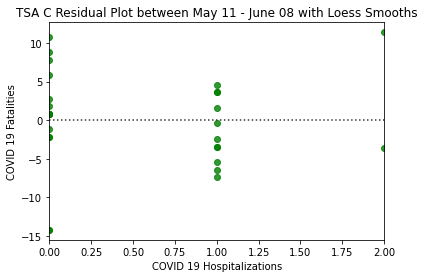

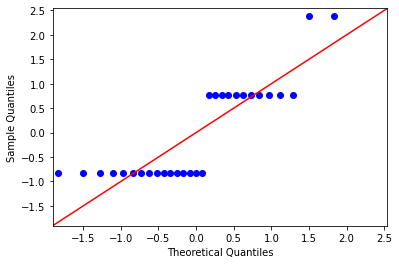

qq-plot of TSA C (May 11 - June 08) for Hospitalizations


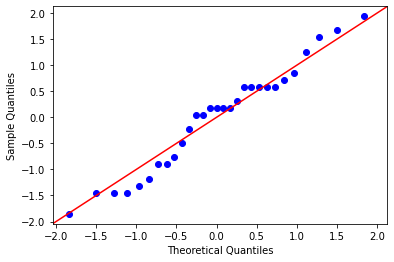

qq-plot of TSA C (May 11 - June 08) for Fatalities

levene p-value: 7.73E-8
There is strong evidence that the two samples do not have equal variances. This means it is strongly suggested to use a non-parametric analysis model to prevent commiting a Type 1 error! We therefore conduct Welch's t-test which does not assume equal population variance.

t-test p_value: 1.98E-29
There is significant evidence that the observed relationship between hospitalizations and fatalities is not due to random chance.


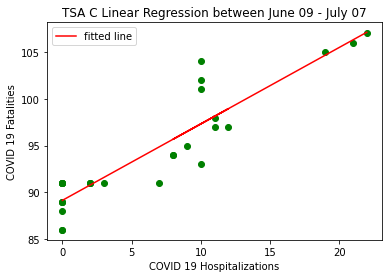

slope: 0.815767    intercept: 89.158942
R-squared: 0.836041 
Pearson corrrelation: 0.914353    Spearman correlation: 0.912765
Pearson p-value: 4.14E-12
Spearman p-value: 5.26E-12
This is a strongly positive relationship
A correlation p-value of 4.14143238773637e-12 indicates that the correlation between our samples is significant and different from zero.

Linear Regression p-value: 4.14E-12
A linear regression p-value this low strongly suggests that hospitalizations has a statistically significant affect on the value of fatalities


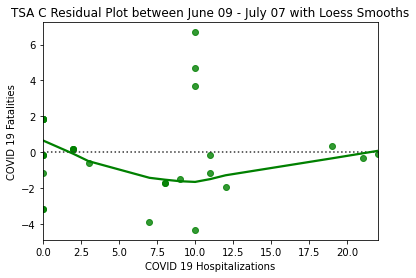

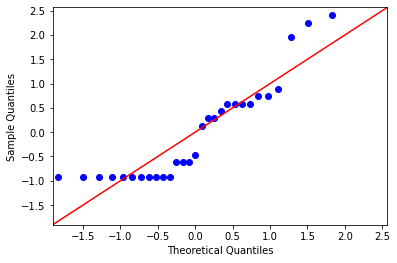

qq-plot of TSA C (June 09 - July 07) for Hospitalizations


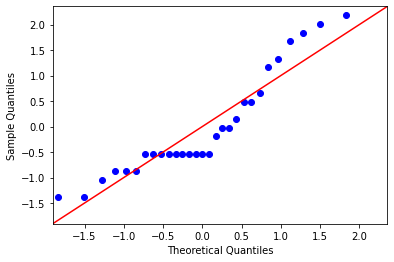

qq-plot of TSA C (June 09 - July 07) for Fatalities

levene p-value: 3.84E-1
There is not enough evidence to reject the assumption of equal variance between the samples. This means there is not enough evidence to prevent using a parametric analysis model. We therefore conduct a two-sided t-test, which assumes equal population variance.

t-test p_value: 2.51E-49
There is significant evidence that the observed relationship between hospitalizations and fatalities is not due to random chance.


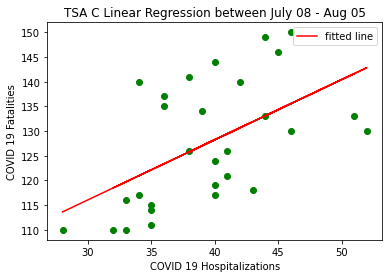

slope: 1.216681    intercept: 79.578177
R-squared: 0.296701 
Pearson corrrelation: 0.544703    Spearman correlation: 0.592955
Pearson p-value: 2.25E-3
Spearman p-value: 6.99E-4
This is a weakly positive relationship
A correlation p-value of 0.0006994475522227507 indicates that the correlation between our samples is significant and different from zero.

Linear Regression p-value: 2.25E-3
A linear regression p-value this low strongly suggests that hospitalizations has a statistically significant affect on the value of fatalities


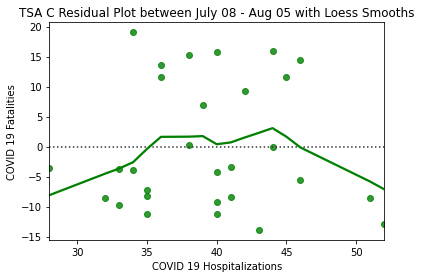

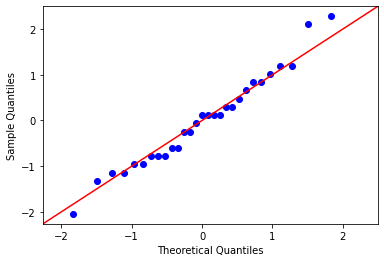

qq-plot of TSA C (July 08 - Aug 05) for Hospitalizations


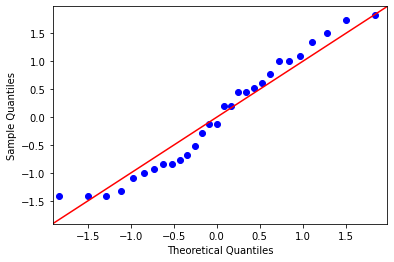

qq-plot of TSA C (July 08 - Aug 05) for Fatalities

levene p-value: 1.21E-5
There is strong evidence that the two samples do not have equal variances. This means it is strongly suggested to use a non-parametric analysis model to prevent commiting a Type 1 error! We therefore conduct Welch's t-test which does not assume equal population variance.

t-test p_value: 1.15E-30
There is significant evidence that the observed relationship between hospitalizations and fatalities is not due to random chance.


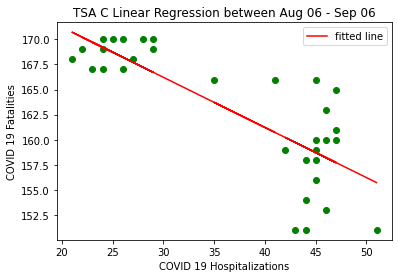

slope: -0.499763    intercept: 181.210039
R-squared: 0.629071 
Pearson corrrelation: -0.793140    Spearman correlation: -0.707783
Pearson p-value: 6.20E-8
Spearman p-value: 5.88E-6
This is a weakly negative relationship
A correlation p-value of 6.195795468273265e-08 indicates that the correlation between our samples is significant and different from zero.

Linear Regression p-value: 6.20E-8
A linear regression p-value this low strongly suggests that hospitalizations has a statistically significant affect on the value of fatalities


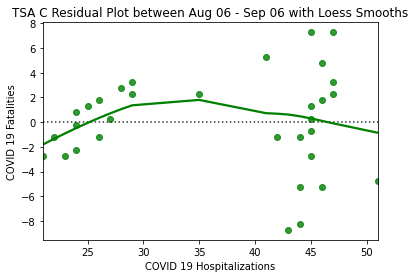

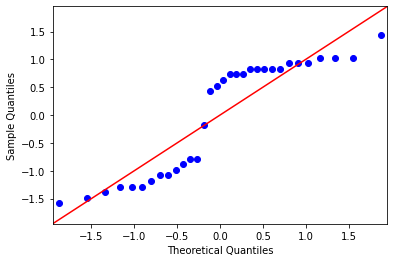

qq-plot of TSA C (Aug 06 - Sep 06) for Hospitalizations


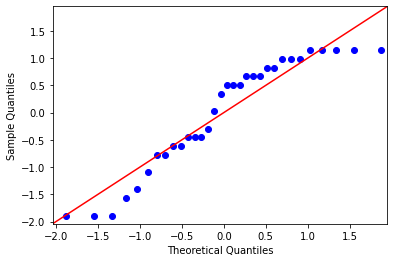

qq-plot of TSA C (Aug 06 - Sep 06) for Fatalities

levene p-value: 2.46E-2
There is strong evidence that the two samples do not have equal variances. This means it is strongly suggested to use a non-parametric analysis model to prevent commiting a Type 1 error! We therefore conduct Welch's t-test which does not assume equal population variance.

t-test p_value: 8.83E-50
There is significant evidence that the observed relationship between hospitalizations and fatalities is not due to random chance.


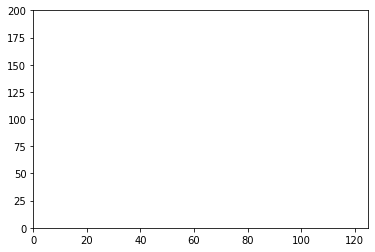

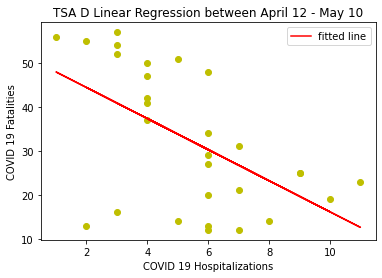

slope: -3.538105    intercept: 51.499395
R-squared: 0.303240 
Pearson corrrelation: -0.550672    Spearman correlation: -0.539732
Pearson p-value: 1.96E-3
Spearman p-value: 2.51E-3
This is a weakly negative relationship
A correlation p-value of 0.001964990180653405 indicates that the correlation between our samples is significant and different from zero.

Linear Regression p-value: 1.96E-3
A linear regression p-value this low strongly suggests that hospitalizations has a statistically significant affect on the value of fatalities


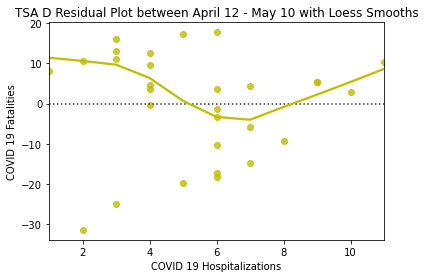

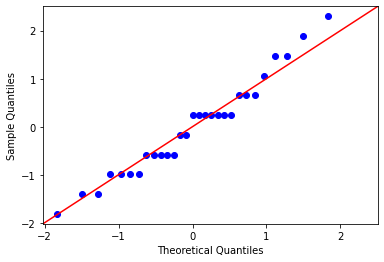

qq-plot of TSA D (April 12 - May 10) for Hospitalizations


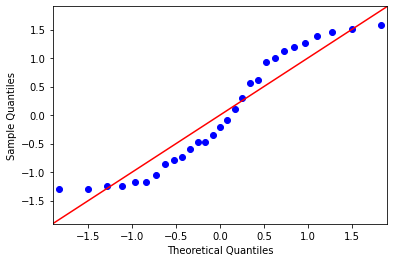

qq-plot of TSA D (April 12 - May 10) for Fatalities

levene p-value: 2.10E-10
There is strong evidence that the two samples do not have equal variances. This means it is strongly suggested to use a non-parametric analysis model to prevent commiting a Type 1 error! We therefore conduct Welch's t-test which does not assume equal population variance.

t-test p_value: 5.75E-10
There is significant evidence that the observed relationship between hospitalizations and fatalities is not due to random chance.


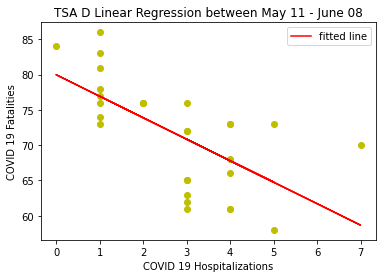

slope: -3.043228    intercept: 79.979827
R-squared: 0.420231 
Pearson corrrelation: -0.648252    Spearman correlation: -0.740400
Pearson p-value: 1.43E-4
Spearman p-value: 4.40E-6
This is a weakly negative relationship
A correlation p-value of 4.395702103256989e-06 indicates that the correlation between our samples is significant and different from zero.

Linear Regression p-value: 1.43E-4
A linear regression p-value this low strongly suggests that hospitalizations has a statistically significant affect on the value of fatalities


/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/smoothers_lowess.py:165: RuntimeWarning: invalid value encountered in greater_equal
  res = _lowess(y, x, frac=frac, it=it, delta=delta)


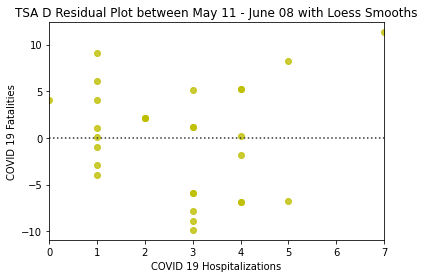

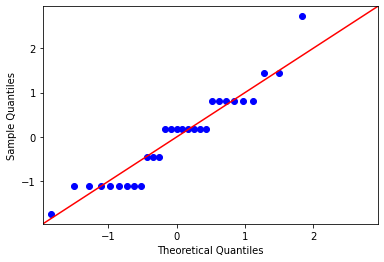

qq-plot of TSA D (May 11 - June 08) for Hospitalizations


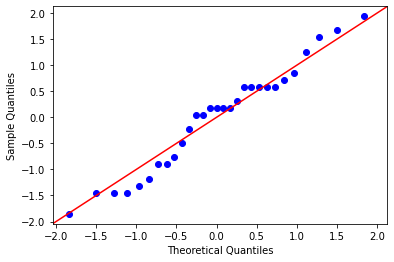

qq-plot of TSA D (May 11 - June 08) for Fatalities

levene p-value: 2.20E-6
There is strong evidence that the two samples do not have equal variances. This means it is strongly suggested to use a non-parametric analysis model to prevent commiting a Type 1 error! We therefore conduct Welch's t-test which does not assume equal population variance.

t-test p_value: 2.07E-30
There is significant evidence that the observed relationship between hospitalizations and fatalities is not due to random chance.


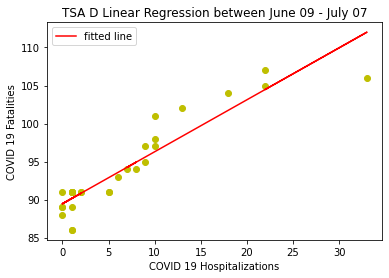

slope: 0.683635    intercept: 89.446779
R-squared: 0.860114 
Pearson corrrelation: 0.927424    Spearman correlation: 0.924202
Pearson p-value: 4.79E-13
Spearman p-value: 8.45E-13
This is a strongly positive relationship
A correlation p-value of 4.791694465922905e-13 indicates that the correlation between our samples is significant and different from zero.

Linear Regression p-value: 4.79E-13
A linear regression p-value this low strongly suggests that hospitalizations has a statistically significant affect on the value of fatalities


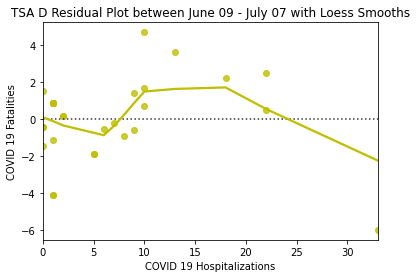

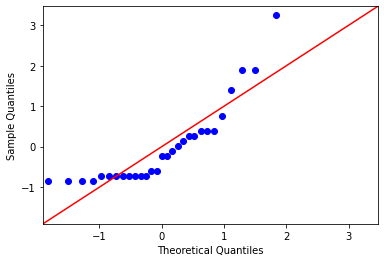

qq-plot of TSA D (June 09 - July 07) for Hospitalizations


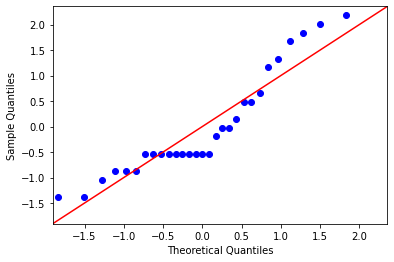

qq-plot of TSA D (June 09 - July 07) for Fatalities

levene p-value: 3.31E-1
There is not enough evidence to reject the assumption of equal variance between the samples. This means there is not enough evidence to prevent using a parametric analysis model. We therefore conduct a two-sided t-test, which assumes equal population variance.

t-test p_value: 2.21E-46
There is significant evidence that the observed relationship between hospitalizations and fatalities is not due to random chance.


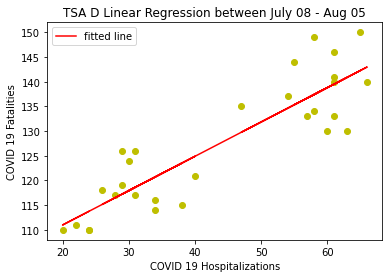

slope: 0.694623    intercept: 97.100431
R-squared: 0.777772 
Pearson corrrelation: 0.881914    Spearman correlation: 0.831151
Pearson p-value: 2.60E-10
Spearman p-value: 2.37E-8
This is a strongly positive relationship
A correlation p-value of 2.5966681099451387e-10 indicates that the correlation between our samples is significant and different from zero.

Linear Regression p-value: 2.60E-10
A linear regression p-value this low strongly suggests that hospitalizations has a statistically significant affect on the value of fatalities


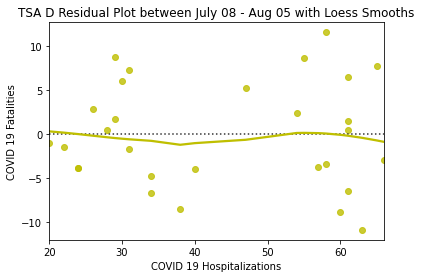

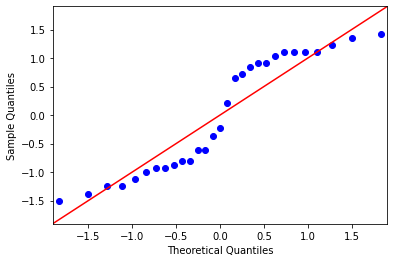

qq-plot of TSA D (July 08 - Aug 05) for Hospitalizations


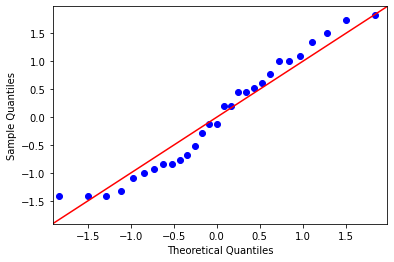

qq-plot of TSA D (July 08 - Aug 05) for Fatalities

levene p-value: 2.65E-2
There is strong evidence that the two samples do not have equal variances. This means it is strongly suggested to use a non-parametric analysis model to prevent commiting a Type 1 error! We therefore conduct Welch's t-test which does not assume equal population variance.

t-test p_value: 1.72E-28
There is significant evidence that the observed relationship between hospitalizations and fatalities is not due to random chance.


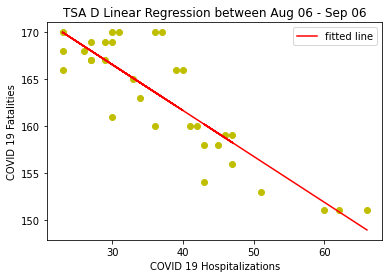

slope: -0.490037    intercept: 181.266089
R-squared: 0.764197 
Pearson corrrelation: -0.874184    Spearman correlation: -0.792779
Pearson p-value: 6.34E-11
Spearman p-value: 6.34E-8
This is a strongly negative relationship
A correlation p-value of 6.343164321154886e-11 indicates that the correlation between our samples is significant and different from zero.

Linear Regression p-value: 6.34E-11
A linear regression p-value this low strongly suggests that hospitalizations has a statistically significant affect on the value of fatalities


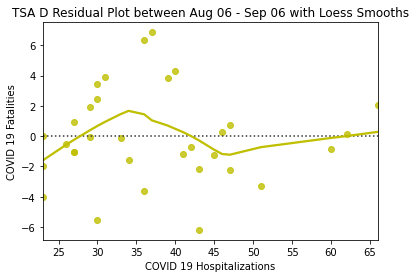

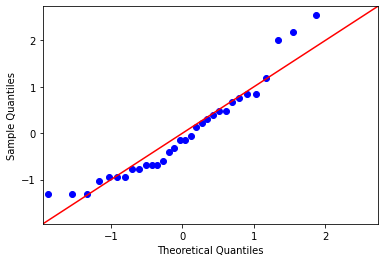

qq-plot of TSA D (Aug 06 - Sep 06) for Hospitalizations


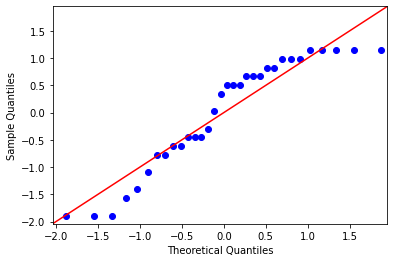

qq-plot of TSA D (Aug 06 - Sep 06) for Fatalities

levene p-value: 1.60E-2
There is strong evidence that the two samples do not have equal variances. This means it is strongly suggested to use a non-parametric analysis model to prevent commiting a Type 1 error! We therefore conduct Welch's t-test which does not assume equal population variance.

t-test p_value: 2.65E-45
There is significant evidence that the observed relationship between hospitalizations and fatalities is not due to random chance.


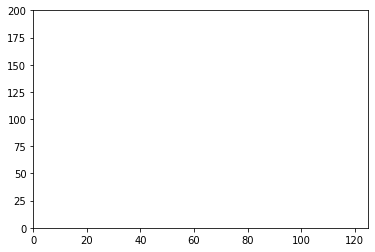

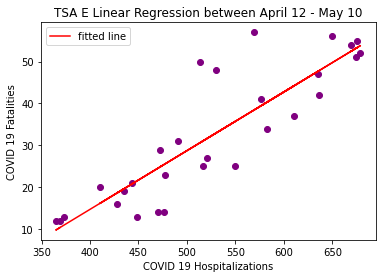

slope: 0.140074    intercept: -41.300098
R-squared: 0.760374 
Pearson corrrelation: 0.871994    Spearman correlation: 0.882947
Pearson p-value: 7.26E-10
Spearman p-value: 2.32E-10
This is a strongly positive relationship
A correlation p-value of 2.3207152601422355e-10 indicates that the correlation between our samples is significant and different from zero.

Linear Regression p-value: 7.26E-10
A linear regression p-value this low strongly suggests that hospitalizations has a statistically significant affect on the value of fatalities


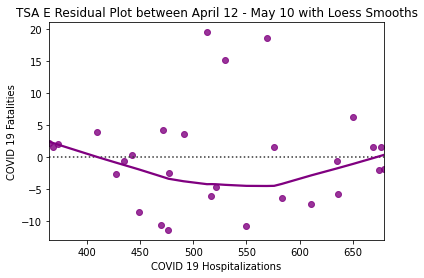

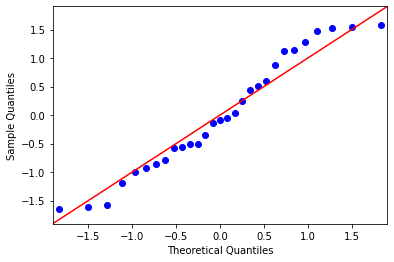

qq-plot of TSA E (April 12 - May 10) for Hospitalizations


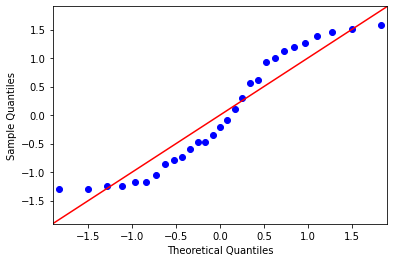

qq-plot of TSA E (April 12 - May 10) for Fatalities

levene p-value: 5.94E-9
There is strong evidence that the two samples do not have equal variances. This means it is strongly suggested to use a non-parametric analysis model to prevent commiting a Type 1 error! We therefore conduct Welch's t-test which does not assume equal population variance.

t-test p_value: 4.09E-22
There is significant evidence that the observed relationship between hospitalizations and fatalities is not due to random chance.


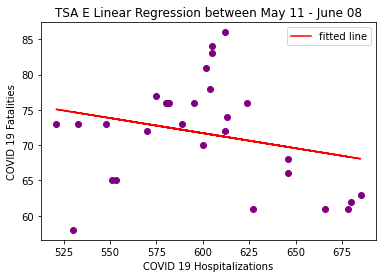

slope: -0.042724    intercept: 97.342952
R-squared: 0.064400 
Pearson corrrelation: -0.253772    Spearman correlation: -0.190448
Pearson p-value: 1.84E-1
Spearman p-value: 3.22E-1
This is a weakly negative relationship
Neither correlation p-value indicates that the correlation between our samples is significantly different from zero.

Linear Regression p-value: 1.84E-1
There is not enough evidence to conclude if hospitalizations has a statistically significant affect on the value of fatalities.


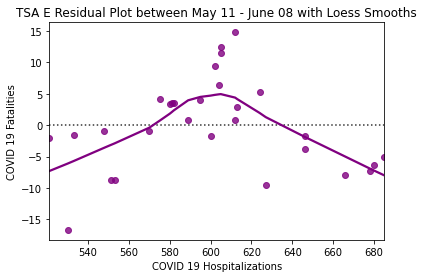

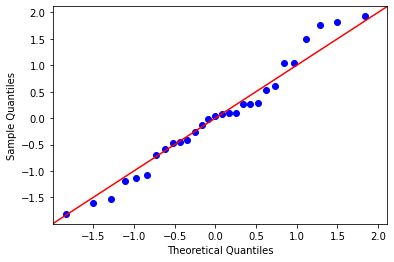

qq-plot of TSA E (May 11 - June 08) for Hospitalizations


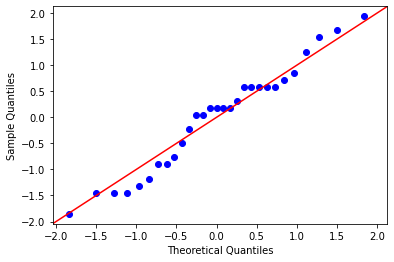

qq-plot of TSA E (May 11 - June 08) for Fatalities

levene p-value: 1.37E-6
There is strong evidence that the two samples do not have equal variances. This means it is strongly suggested to use a non-parametric analysis model to prevent commiting a Type 1 error! We therefore conduct Welch's t-test which does not assume equal population variance.

t-test p_value: 4.63E-33
There is significant evidence that the observed relationship between hospitalizations and fatalities is not due to random chance.


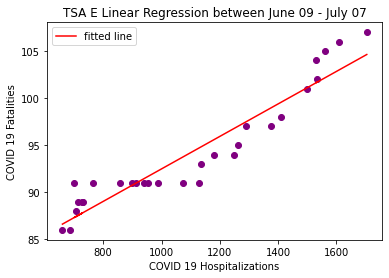

slope: 0.017261    intercept: 75.223018
R-squared: 0.896837 
Pearson corrrelation: 0.947015    Spearman correlation: 0.963990
Pearson p-value: 7.70E-15
Spearman p-value: 4.64E-17
This is a strongly positive relationship
A correlation p-value of 4.635419535415157e-17 indicates that the correlation between our samples is significant and different from zero.

Linear Regression p-value: 7.70E-15
A linear regression p-value this low strongly suggests that hospitalizations has a statistically significant affect on the value of fatalities


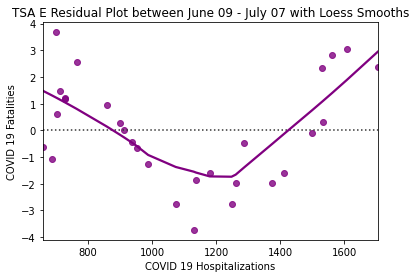

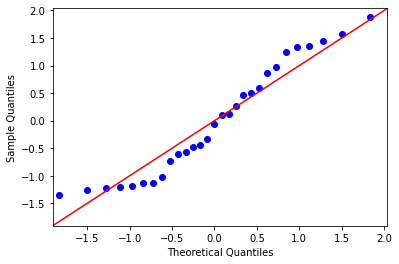

qq-plot of TSA E (June 09 - July 07) for Hospitalizations


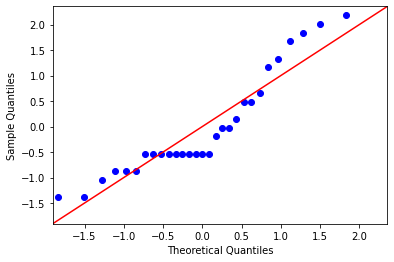

qq-plot of TSA E (June 09 - July 07) for Fatalities

levene p-value: 4.87E-13
There is strong evidence that the two samples do not have equal variances. This means it is strongly suggested to use a non-parametric analysis model to prevent commiting a Type 1 error! We therefore conduct Welch's t-test which does not assume equal population variance.

t-test p_value: 7.26E-16
There is significant evidence that the observed relationship between hospitalizations and fatalities is not due to random chance.


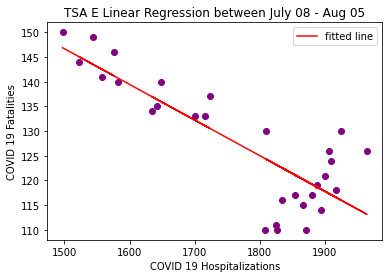

slope: -0.072032    intercept: 254.699796
R-squared: 0.683700 
Pearson corrrelation: -0.826862    Spearman correlation: -0.670941
Pearson p-value: 3.23E-8
Spearman p-value: 6.79E-5
This is a strongly negative relationship
A correlation p-value of 3.231880850649102e-08 indicates that the correlation between our samples is significant and different from zero.

Linear Regression p-value: 3.23E-8
A linear regression p-value this low strongly suggests that hospitalizations has a statistically significant affect on the value of fatalities


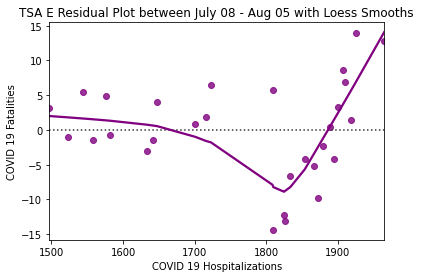

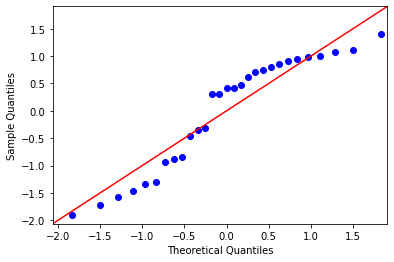

qq-plot of TSA E (July 08 - Aug 05) for Hospitalizations


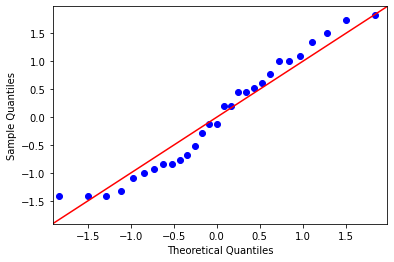

qq-plot of TSA E (July 08 - Aug 05) for Fatalities

levene p-value: 1.46E-7
There is strong evidence that the two samples do not have equal variances. This means it is strongly suggested to use a non-parametric analysis model to prevent commiting a Type 1 error! We therefore conduct Welch's t-test which does not assume equal population variance.

t-test p_value: 1.19E-31
There is significant evidence that the observed relationship between hospitalizations and fatalities is not due to random chance.


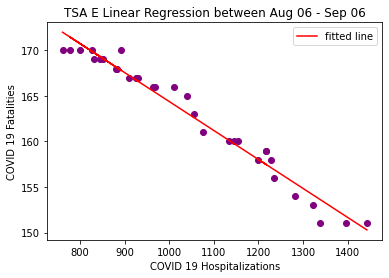

slope: -0.031800    intercept: 196.177580
R-squared: 0.968292 
Pearson corrrelation: -0.984018    Spearman correlation: -0.985469
Pearson p-value: 4.83E-24
Spearman p-value: 1.17E-24
This is a strongly negative relationship
A correlation p-value of 1.169436537290692e-24 indicates that the correlation between our samples is significant and different from zero.

Linear Regression p-value: 4.83E-24
A linear regression p-value this low strongly suggests that hospitalizations has a statistically significant affect on the value of fatalities


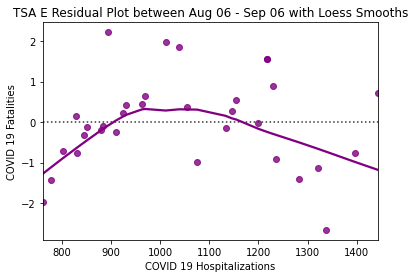

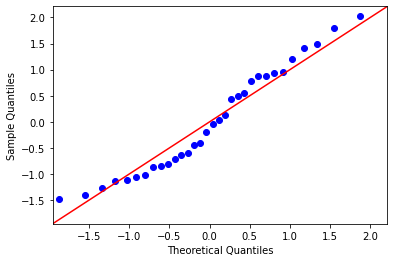

qq-plot of TSA E (Aug 06 - Sep 06) for Hospitalizations


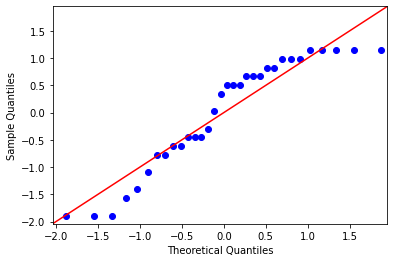

qq-plot of TSA E (Aug 06 - Sep 06) for Fatalities

levene p-value: 1.46E-13
There is strong evidence that the two samples do not have equal variances. This means it is strongly suggested to use a non-parametric analysis model to prevent commiting a Type 1 error! We therefore conduct Welch's t-test which does not assume equal population variance.

t-test p_value: 2.38E-22
There is significant evidence that the observed relationship between hospitalizations and fatalities is not due to random chance.


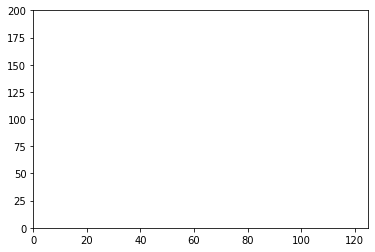

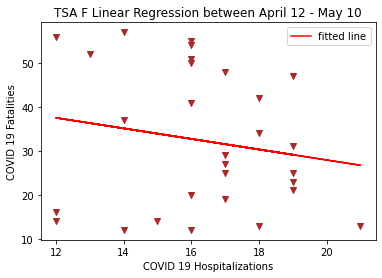

slope: -1.200358    intercept: 51.923077
R-squared: 0.031469 
Pearson corrrelation: -0.177396    Spearman correlation: -0.171093
Pearson p-value: 3.57E-1
Spearman p-value: 3.75E-1
This is a weakly negative relationship
Neither correlation p-value indicates that the correlation between our samples is significantly different from zero.

Linear Regression p-value: 3.57E-1
There is not enough evidence to conclude if hospitalizations has a statistically significant affect on the value of fatalities.


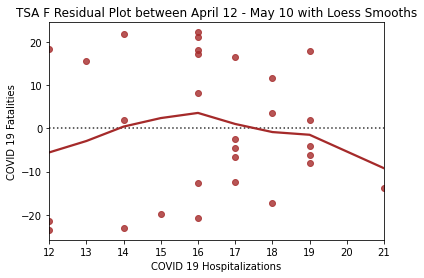

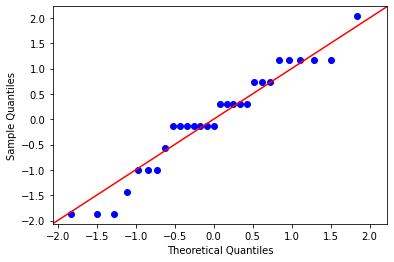

qq-plot of TSA F (April 12 - May 10) for Hospitalizations


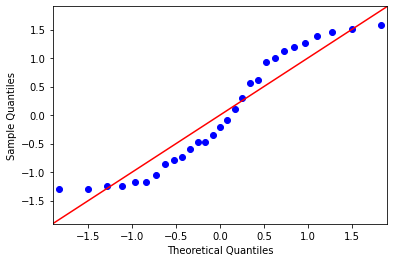

qq-plot of TSA F (April 12 - May 10) for Fatalities

levene p-value: 1.40E-10
There is strong evidence that the two samples do not have equal variances. This means it is strongly suggested to use a non-parametric analysis model to prevent commiting a Type 1 error! We therefore conduct Welch's t-test which does not assume equal population variance.

t-test p_value: 8.64E-6
There is significant evidence that the observed relationship between hospitalizations and fatalities is not due to random chance.


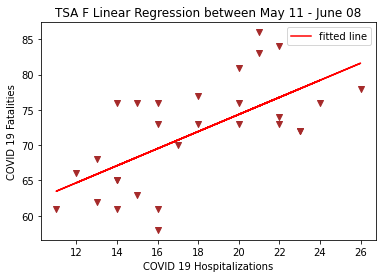

slope: 1.209175    intercept: 50.174674
R-squared: 0.425783 
Pearson corrrelation: 0.652521    Spearman correlation: 0.608372
Pearson p-value: 1.25E-4
Spearman p-value: 4.63E-4
This is a weakly positive relationship
A correlation p-value of 0.0001249667024085706 indicates that the correlation between our samples is significant and different from zero.

Linear Regression p-value: 1.25E-4
A linear regression p-value this low strongly suggests that hospitalizations has a statistically significant affect on the value of fatalities


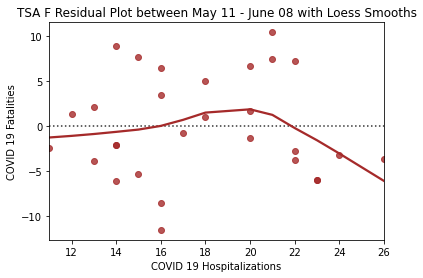

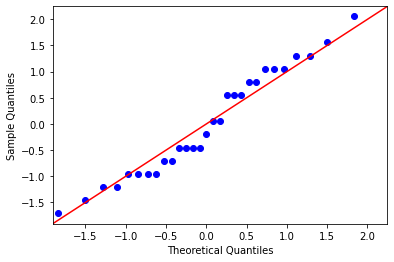

qq-plot of TSA F (May 11 - June 08) for Hospitalizations


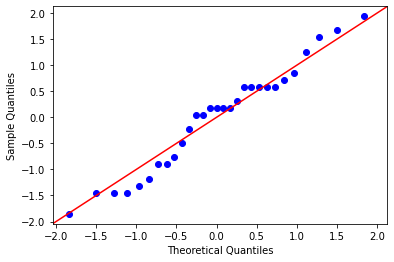

qq-plot of TSA F (May 11 - June 08) for Fatalities

levene p-value: 1.30E-2
There is strong evidence that the two samples do not have equal variances. This means it is strongly suggested to use a non-parametric analysis model to prevent commiting a Type 1 error! We therefore conduct Welch's t-test which does not assume equal population variance.

t-test p_value: 1.02E-32
There is significant evidence that the observed relationship between hospitalizations and fatalities is not due to random chance.


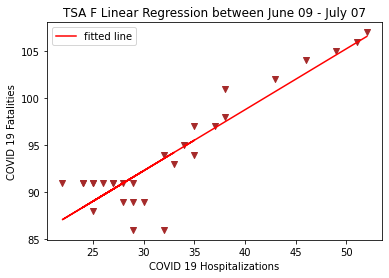

slope: 0.648698    intercept: 72.820363
R-squared: 0.827703 
Pearson corrrelation: 0.909782    Spearman correlation: 0.756767
Pearson p-value: 8.13E-12
Spearman p-value: 2.03E-6
This is a strongly positive relationship
A correlation p-value of 8.128012742349853e-12 indicates that the correlation between our samples is significant and different from zero.

Linear Regression p-value: 8.13E-12
A linear regression p-value this low strongly suggests that hospitalizations has a statistically significant affect on the value of fatalities


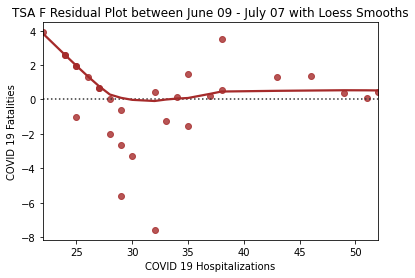

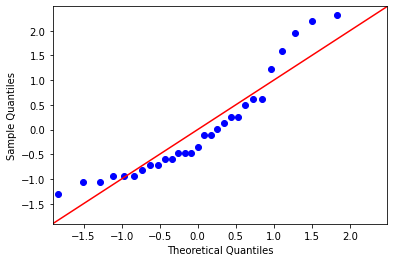

qq-plot of TSA F (June 09 - July 07) for Hospitalizations


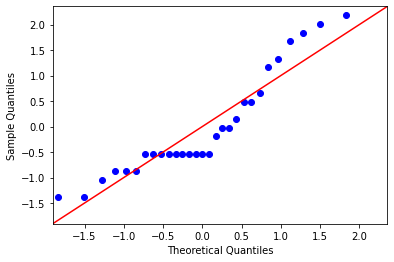

qq-plot of TSA F (June 09 - July 07) for Fatalities

levene p-value: 1.78E-1
There is not enough evidence to reject the assumption of equal variance between the samples. This means there is not enough evidence to prevent using a parametric analysis model. We therefore conduct a two-sided t-test, which assumes equal population variance.

t-test p_value: 1.38E-37
There is significant evidence that the observed relationship between hospitalizations and fatalities is not due to random chance.


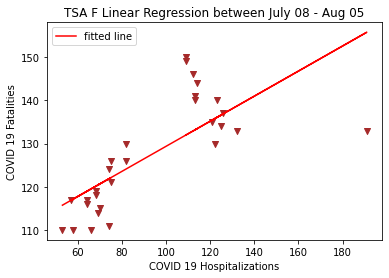

slope: 0.290106    intercept: 100.348330
R-squared: 0.537399 
Pearson corrrelation: 0.733075    Spearman correlation: 0.784674
Pearson p-value: 6.10E-6
Spearman p-value: 4.69E-7
This is a weakly positive relationship
A correlation p-value of 4.693198364842774e-07 indicates that the correlation between our samples is significant and different from zero.

Linear Regression p-value: 6.10E-6
A linear regression p-value this low strongly suggests that hospitalizations has a statistically significant affect on the value of fatalities


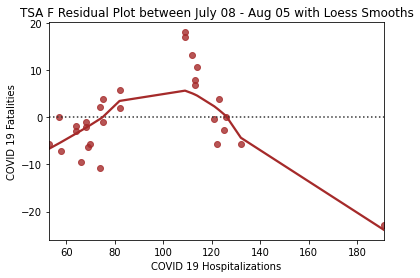

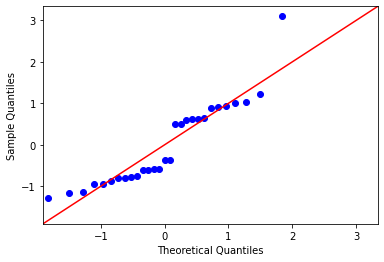

qq-plot of TSA F (July 08 - Aug 05) for Hospitalizations


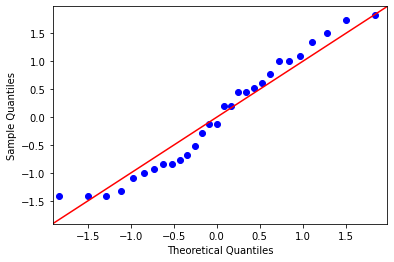

qq-plot of TSA F (July 08 - Aug 05) for Fatalities

levene p-value: 4.24E-4
There is strong evidence that the two samples do not have equal variances. This means it is strongly suggested to use a non-parametric analysis model to prevent commiting a Type 1 error! We therefore conduct Welch's t-test which does not assume equal population variance.

t-test p_value: 4.86E-6
There is significant evidence that the observed relationship between hospitalizations and fatalities is not due to random chance.


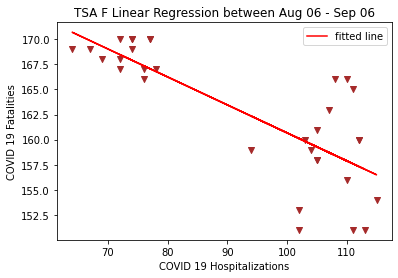

slope: -0.278594    intercept: 188.535369
R-squared: 0.609409 
Pearson corrrelation: -0.780647    Spearman correlation: -0.733022
Pearson p-value: 1.36E-7
Spearman p-value: 1.83E-6
This is a weakly negative relationship
A correlation p-value of 1.36400031981123e-07 indicates that the correlation between our samples is significant and different from zero.

Linear Regression p-value: 1.36E-7
A linear regression p-value this low strongly suggests that hospitalizations has a statistically significant affect on the value of fatalities


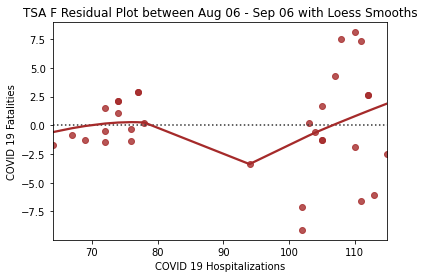

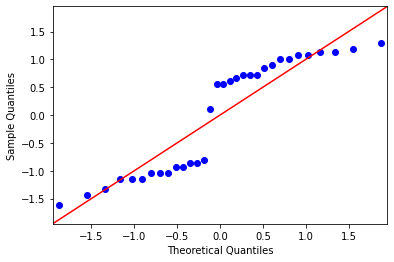

qq-plot of TSA F (Aug 06 - Sep 06) for Hospitalizations


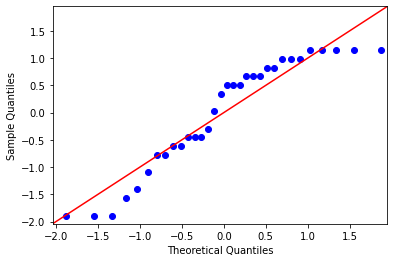

qq-plot of TSA F (Aug 06 - Sep 06) for Fatalities

levene p-value: 1.63E-5
There is strong evidence that the two samples do not have equal variances. This means it is strongly suggested to use a non-parametric analysis model to prevent commiting a Type 1 error! We therefore conduct Welch's t-test which does not assume equal population variance.

t-test p_value: 7.48E-23
There is significant evidence that the observed relationship between hospitalizations and fatalities is not due to random chance.


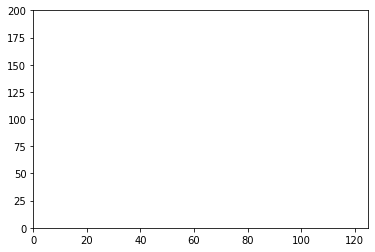

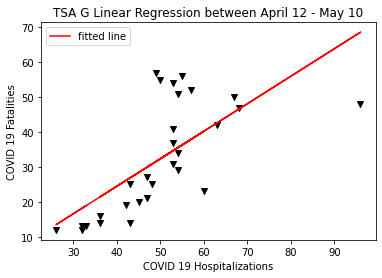

slope: 0.786639    intercept: -6.959976
R-squared: 0.461957 
Pearson corrrelation: 0.679675    Spearman correlation: 0.772908
Pearson p-value: 5.01E-5
Spearman p-value: 8.92E-7
This is a weakly positive relationship
A correlation p-value of 8.922736371220842e-07 indicates that the correlation between our samples is significant and different from zero.

Linear Regression p-value: 5.01E-5
A linear regression p-value this low strongly suggests that hospitalizations has a statistically significant affect on the value of fatalities


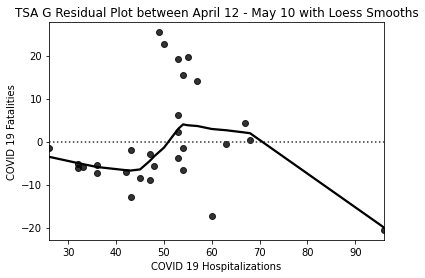

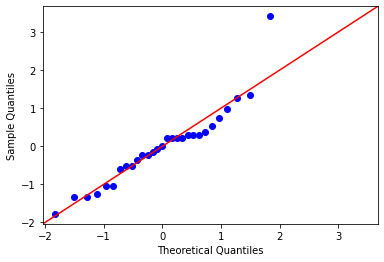

qq-plot of TSA G (April 12 - May 10) for Hospitalizations


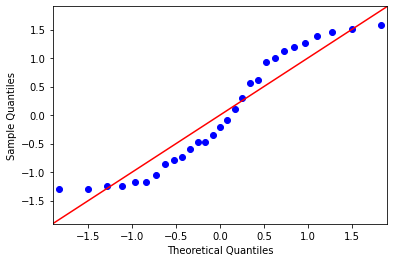

qq-plot of TSA G (April 12 - May 10) for Fatalities

levene p-value: 8.05E-2
There is not enough evidence to reject the assumption of equal variance between the samples. This means there is not enough evidence to prevent using a parametric analysis model. We therefore conduct a two-sided t-test, which assumes equal population variance.

t-test p_value: 3.23E-5
There is significant evidence that the observed relationship between hospitalizations and fatalities is not due to random chance.


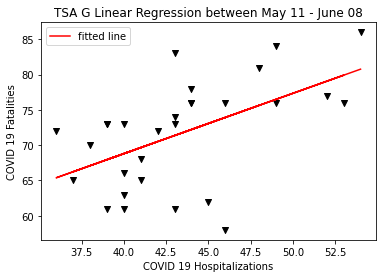

slope: 0.854833    intercept: 34.607574
R-squared: 0.287652 
Pearson corrrelation: 0.536332    Spearman correlation: 0.577052
Pearson p-value: 2.71E-3
Spearman p-value: 1.05E-3
This is a weakly positive relationship
A correlation p-value of 0.0010485168526263463 indicates that the correlation between our samples is significant and different from zero.

Linear Regression p-value: 2.71E-3
A linear regression p-value this low strongly suggests that hospitalizations has a statistically significant affect on the value of fatalities


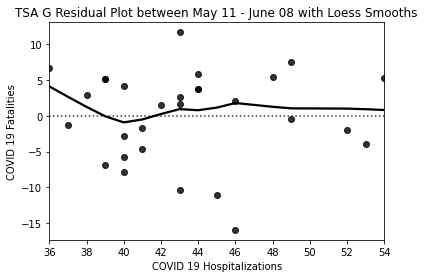

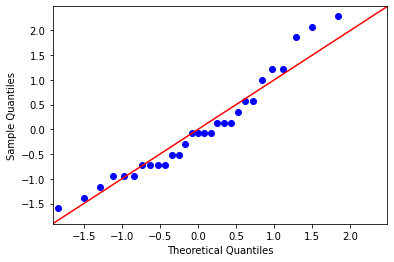

qq-plot of TSA G (May 11 - June 08) for Hospitalizations


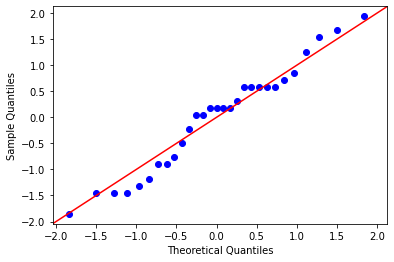

qq-plot of TSA G (May 11 - June 08) for Fatalities

levene p-value: 2.86E-2
There is strong evidence that the two samples do not have equal variances. This means it is strongly suggested to use a non-parametric analysis model to prevent commiting a Type 1 error! We therefore conduct Welch's t-test which does not assume equal population variance.

t-test p_value: 6.51E-22
There is significant evidence that the observed relationship between hospitalizations and fatalities is not due to random chance.


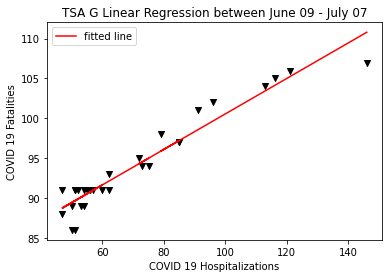

slope: 0.222673    intercept: 78.289776
R-squared: 0.925149 
Pearson corrrelation: 0.961846    Spearman correlation: 0.922729
Pearson p-value: 9.99E-17
Spearman p-value: 1.09E-12
This is a strongly positive relationship
A correlation p-value of 9.991541555966635e-17 indicates that the correlation between our samples is significant and different from zero.

Linear Regression p-value: 9.99E-17
A linear regression p-value this low strongly suggests that hospitalizations has a statistically significant affect on the value of fatalities


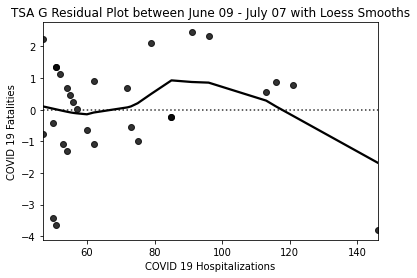

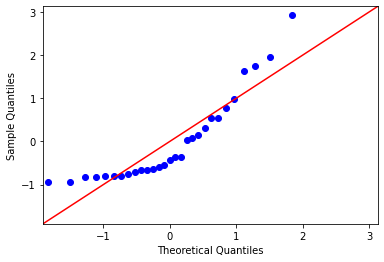

qq-plot of TSA G (June 09 - July 07) for Hospitalizations


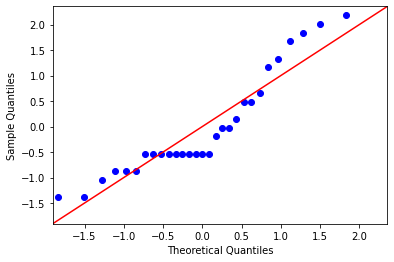

qq-plot of TSA G (June 09 - July 07) for Fatalities

levene p-value: 6.14E-4
There is strong evidence that the two samples do not have equal variances. This means it is strongly suggested to use a non-parametric analysis model to prevent commiting a Type 1 error! We therefore conduct Welch's t-test which does not assume equal population variance.

t-test p_value: 6.00E-5
There is significant evidence that the observed relationship between hospitalizations and fatalities is not due to random chance.


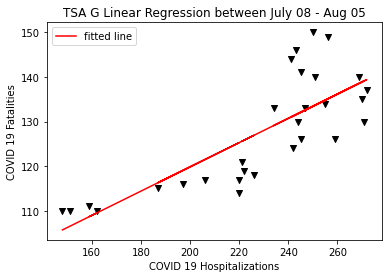

slope: 0.271641    intercept: 65.504654
R-squared: 0.619900 
Pearson corrrelation: 0.787337    Spearman correlation: 0.798866
Pearson p-value: 4.04E-7
Spearman p-value: 2.05E-7
This is a weakly positive relationship
A correlation p-value of 2.0472563612263937e-07 indicates that the correlation between our samples is significant and different from zero.

Linear Regression p-value: 4.04E-7
A linear regression p-value this low strongly suggests that hospitalizations has a statistically significant affect on the value of fatalities


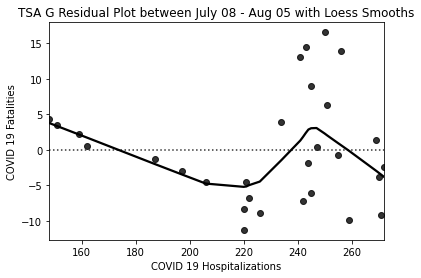

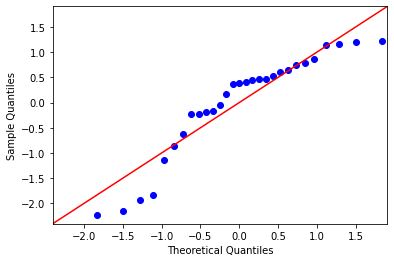

qq-plot of TSA G (July 08 - Aug 05) for Hospitalizations


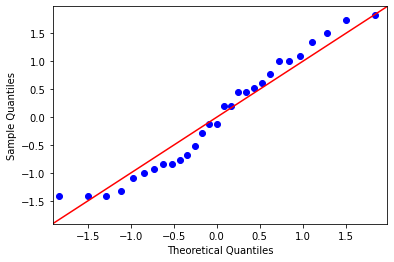

qq-plot of TSA G (July 08 - Aug 05) for Fatalities

levene p-value: 3.57E-3
There is strong evidence that the two samples do not have equal variances. This means it is strongly suggested to use a non-parametric analysis model to prevent commiting a Type 1 error! We therefore conduct Welch's t-test which does not assume equal population variance.

t-test p_value: 7.85E-16
There is significant evidence that the observed relationship between hospitalizations and fatalities is not due to random chance.


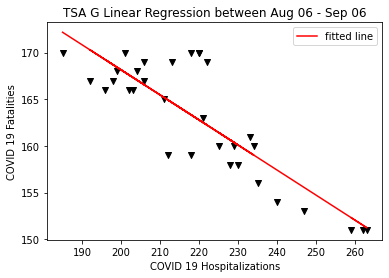

slope: -0.268559    intercept: 221.859676
R-squared: 0.715374 
Pearson corrrelation: -0.845798    Spearman correlation: -0.715540
Pearson p-value: 1.10E-9
Spearman p-value: 4.16E-6
This is a strongly negative relationship
A correlation p-value of 1.0998913426362155e-09 indicates that the correlation between our samples is significant and different from zero.

Linear Regression p-value: 1.10E-9
A linear regression p-value this low strongly suggests that hospitalizations has a statistically significant affect on the value of fatalities


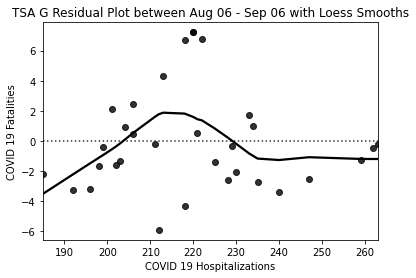

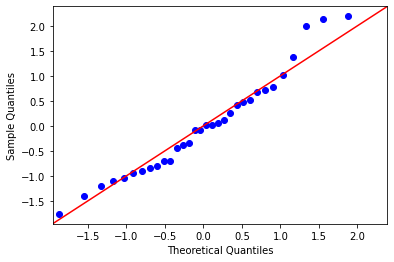

qq-plot of TSA G (Aug 06 - Sep 06) for Hospitalizations


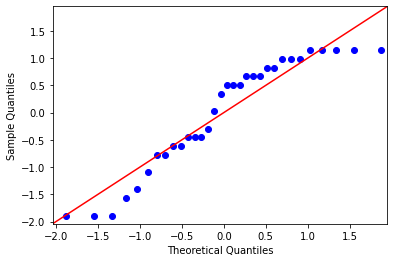

qq-plot of TSA G (Aug 06 - Sep 06) for Fatalities

levene p-value: 2.40E-5
There is strong evidence that the two samples do not have equal variances. This means it is strongly suggested to use a non-parametric analysis model to prevent commiting a Type 1 error! We therefore conduct Welch's t-test which does not assume equal population variance.

t-test p_value: 1.24E-17
There is significant evidence that the observed relationship between hospitalizations and fatalities is not due to random chance.


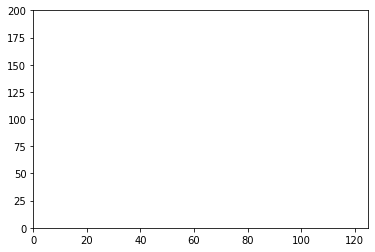

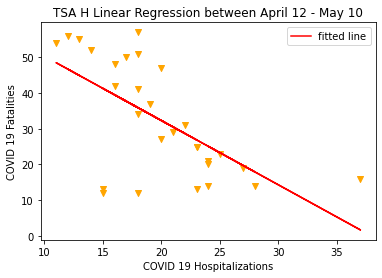

slope: -1.800609    intercept: 68.294923
R-squared: 0.389844 
Pearson corrrelation: -0.624375    Spearman correlation: -0.573658
Pearson p-value: 2.95E-4
Spearman p-value: 1.14E-3
This is a weakly negative relationship
A correlation p-value of 0.00029458445897119755 indicates that the correlation between our samples is significant and different from zero.

Linear Regression p-value: 2.95E-4
A linear regression p-value this low strongly suggests that hospitalizations has a statistically significant affect on the value of fatalities


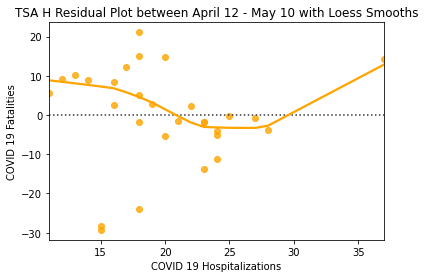

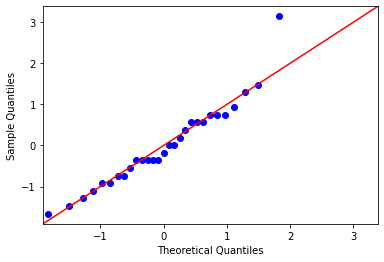

qq-plot of TSA H (April 12 - May 10) for Hospitalizations


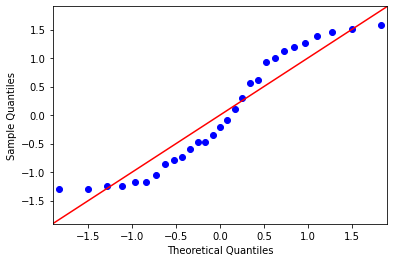

qq-plot of TSA H (April 12 - May 10) for Fatalities

levene p-value: 2.75E-7
There is strong evidence that the two samples do not have equal variances. This means it is strongly suggested to use a non-parametric analysis model to prevent commiting a Type 1 error! We therefore conduct Welch's t-test which does not assume equal population variance.

t-test p_value: 3.48E-4
There is significant evidence that the observed relationship between hospitalizations and fatalities is not due to random chance.


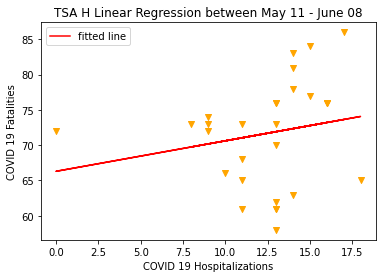

slope: 0.431388    intercept: 66.304737
R-squared: 0.039901 
Pearson corrrelation: 0.199752    Spearman correlation: 0.422175
Pearson p-value: 2.99E-1
Spearman p-value: 2.25E-2
This is a weakly positive relationship
A correlation p-value of 0.022529855247250707 indicates that the correlation between our samples is significant and different from zero.

Linear Regression p-value: 2.99E-1
There is not enough evidence to conclude if hospitalizations has a statistically significant affect on the value of fatalities.


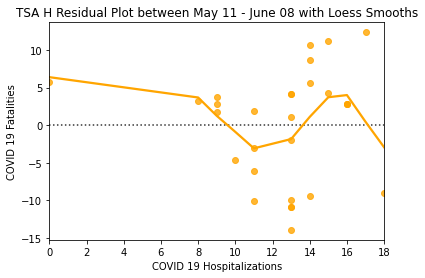

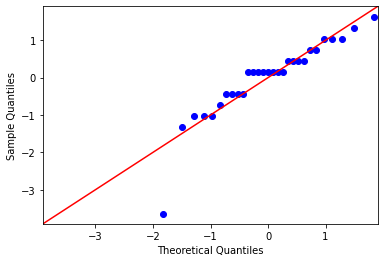

qq-plot of TSA H (May 11 - June 08) for Hospitalizations


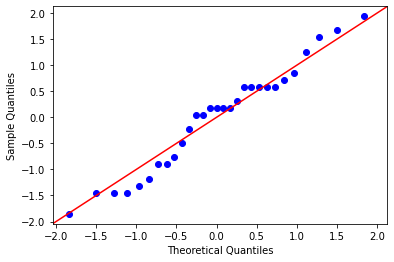

qq-plot of TSA H (May 11 - June 08) for Fatalities

levene p-value: 5.99E-4
There is strong evidence that the two samples do not have equal variances. This means it is strongly suggested to use a non-parametric analysis model to prevent commiting a Type 1 error! We therefore conduct Welch's t-test which does not assume equal population variance.

t-test p_value: 6.38E-33
There is significant evidence that the observed relationship between hospitalizations and fatalities is not due to random chance.


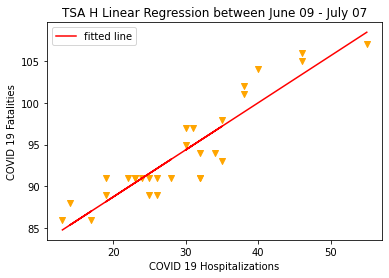

slope: 0.562387    intercept: 77.499022
R-squared: 0.837733 
Pearson corrrelation: 0.915278    Spearman correlation: 0.888537
Pearson p-value: 3.60E-12
Spearman p-value: 1.24E-10
This is a strongly positive relationship
A correlation p-value of 3.5968849307707847e-12 indicates that the correlation between our samples is significant and different from zero.

Linear Regression p-value: 3.60E-12
A linear regression p-value this low strongly suggests that hospitalizations has a statistically significant affect on the value of fatalities


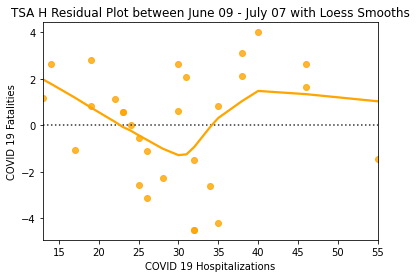

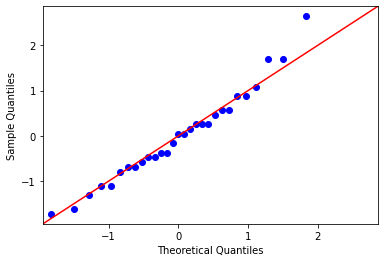

qq-plot of TSA H (June 09 - July 07) for Hospitalizations


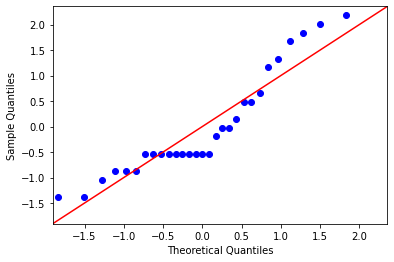

qq-plot of TSA H (June 09 - July 07) for Fatalities

levene p-value: 3.63E-2
There is strong evidence that the two samples do not have equal variances. This means it is strongly suggested to use a non-parametric analysis model to prevent commiting a Type 1 error! We therefore conduct Welch's t-test which does not assume equal population variance.

t-test p_value: 2.95E-32
There is significant evidence that the observed relationship between hospitalizations and fatalities is not due to random chance.


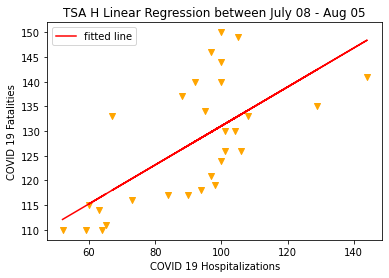

slope: 0.394113    intercept: 91.624752
R-squared: 0.435463 
Pearson corrrelation: 0.659896    Spearman correlation: 0.681195
Pearson p-value: 9.84E-5
Spearman p-value: 4.75E-5
This is a weakly positive relationship
A correlation p-value of 4.7475134730658124e-05 indicates that the correlation between our samples is significant and different from zero.

Linear Regression p-value: 9.84E-5
A linear regression p-value this low strongly suggests that hospitalizations has a statistically significant affect on the value of fatalities


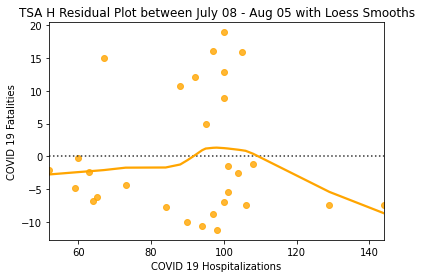

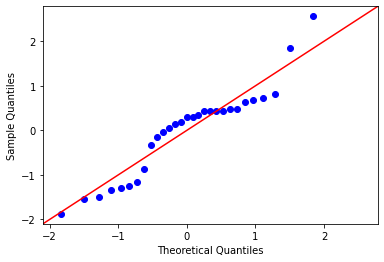

qq-plot of TSA H (July 08 - Aug 05) for Hospitalizations


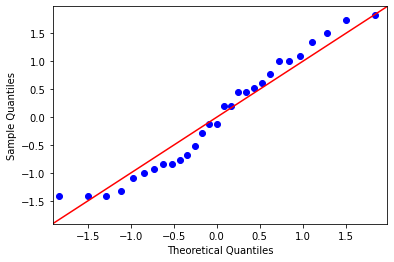

qq-plot of TSA H (July 08 - Aug 05) for Fatalities

levene p-value: 1.43E-1
There is not enough evidence to reject the assumption of equal variance between the samples. This means there is not enough evidence to prevent using a parametric analysis model. We therefore conduct a two-sided t-test, which assumes equal population variance.

t-test p_value: 7.39E-11
There is significant evidence that the observed relationship between hospitalizations and fatalities is not due to random chance.


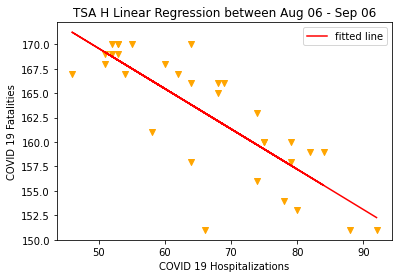

slope: -0.412336    intercept: 190.199681
R-squared: 0.658206 
Pearson corrrelation: -0.811299    Spearman correlation: -0.812163
Pearson p-value: 1.78E-8
Spearman p-value: 1.67E-8
This is a strongly negative relationship
A correlation p-value of 1.6712050034027018e-08 indicates that the correlation between our samples is significant and different from zero.

Linear Regression p-value: 1.78E-8
A linear regression p-value this low strongly suggests that hospitalizations has a statistically significant affect on the value of fatalities


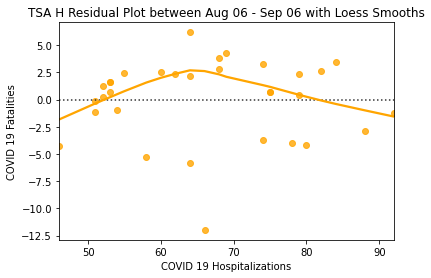

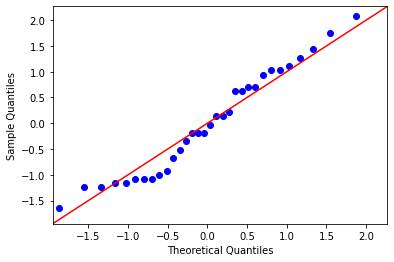

qq-plot of TSA H (Aug 06 - Sep 06) for Hospitalizations


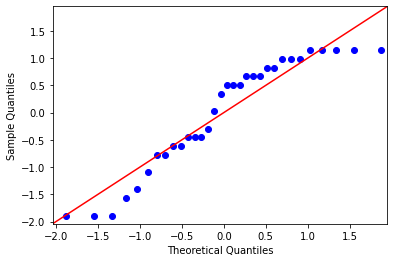

qq-plot of TSA H (Aug 06 - Sep 06) for Fatalities

levene p-value: 3.64E-4
There is strong evidence that the two samples do not have equal variances. This means it is strongly suggested to use a non-parametric analysis model to prevent commiting a Type 1 error! We therefore conduct Welch's t-test which does not assume equal population variance.

t-test p_value: 7.89E-37
There is significant evidence that the observed relationship between hospitalizations and fatalities is not due to random chance.


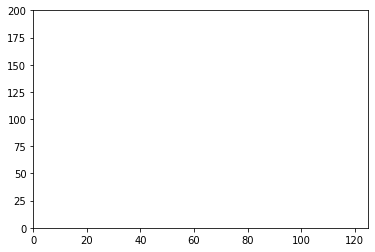

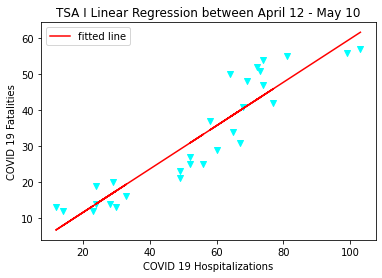

slope: 0.604163    intercept: -0.550788
R-squared: 0.854619 
Pearson corrrelation: 0.924456    Spearman correlation: 0.957101
Pearson p-value: 8.08E-13
Spearman p-value: 4.73E-16
This is a strongly positive relationship
A correlation p-value of 4.729199600551236e-16 indicates that the correlation between our samples is significant and different from zero.

Linear Regression p-value: 8.08E-13
A linear regression p-value this low strongly suggests that hospitalizations has a statistically significant affect on the value of fatalities


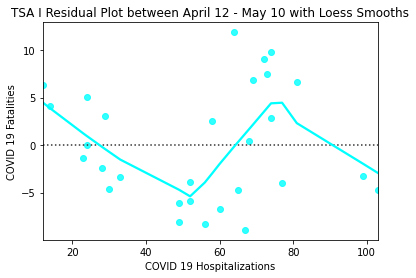

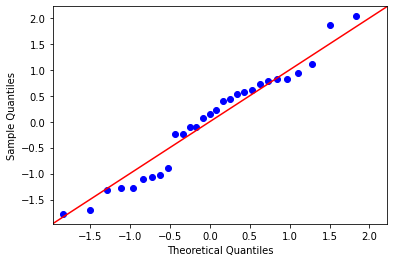

qq-plot of TSA I (April 12 - May 10) for Hospitalizations


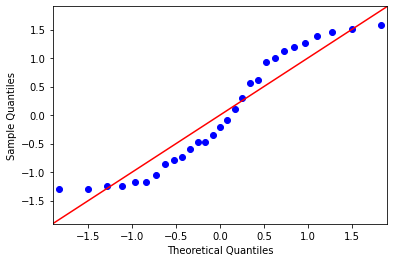

qq-plot of TSA I (April 12 - May 10) for Fatalities

levene p-value: 5.87E-2
There is not enough evidence to reject the assumption of equal variance between the samples. This means there is not enough evidence to prevent using a parametric analysis model. We therefore conduct a two-sided t-test, which assumes equal population variance.

t-test p_value: 1.35E-4
There is significant evidence that the observed relationship between hospitalizations and fatalities is not due to random chance.


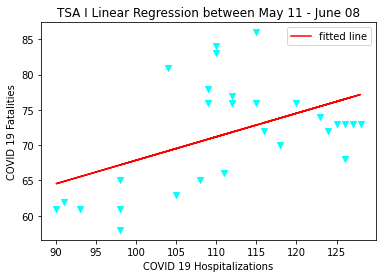

slope: 0.332447    intercept: 34.627527
R-squared: 0.241916 
Pearson corrrelation: 0.491850    Spearman correlation: 0.363356
Pearson p-value: 6.73E-3
Spearman p-value: 5.27E-2
This is a weakly positive relationship
A correlation p-value of 0.006728814375396178 indicates that the correlation between our samples is significant and different from zero.

Linear Regression p-value: 6.73E-3
A linear regression p-value this low strongly suggests that hospitalizations has a statistically significant affect on the value of fatalities


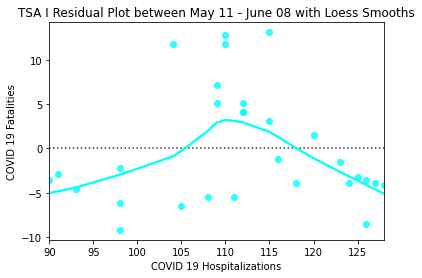

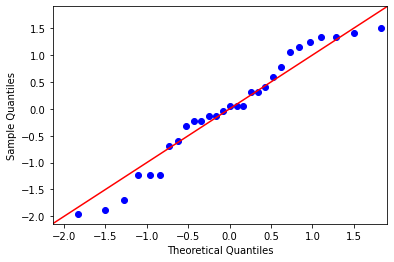

qq-plot of TSA I (May 11 - June 08) for Hospitalizations


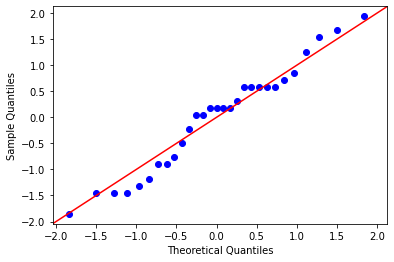

qq-plot of TSA I (May 11 - June 08) for Fatalities

levene p-value: 7.14E-2
There is not enough evidence to reject the assumption of equal variance between the samples. This means there is not enough evidence to prevent using a parametric analysis model. We therefore conduct a two-sided t-test, which assumes equal population variance.

t-test p_value: 1.68E-22
There is significant evidence that the observed relationship between hospitalizations and fatalities is not due to random chance.


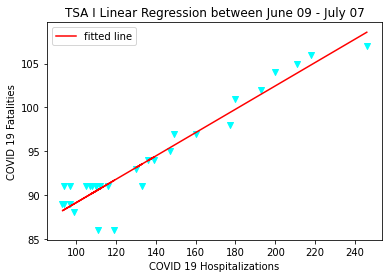

slope: 0.133226    intercept: 75.803345
R-squared: 0.910237 
Pearson corrrelation: 0.954063    Spearman correlation: 0.865394
Pearson p-value: 1.17E-15
Spearman p-value: 1.37E-9
This is a strongly positive relationship
A correlation p-value of 1.1696105070997454e-15 indicates that the correlation between our samples is significant and different from zero.

Linear Regression p-value: 1.17E-15
A linear regression p-value this low strongly suggests that hospitalizations has a statistically significant affect on the value of fatalities


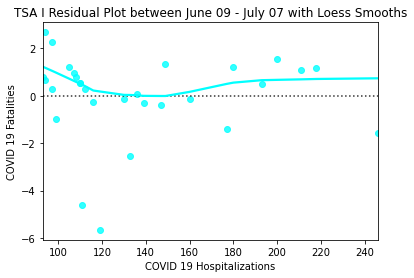

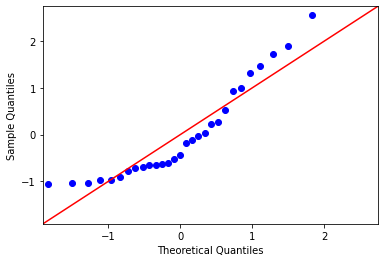

qq-plot of TSA I (June 09 - July 07) for Hospitalizations


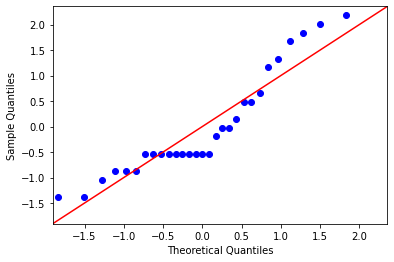

qq-plot of TSA I (June 09 - July 07) for Fatalities

levene p-value: 1.67E-5
There is strong evidence that the two samples do not have equal variances. This means it is strongly suggested to use a non-parametric analysis model to prevent commiting a Type 1 error! We therefore conduct Welch's t-test which does not assume equal population variance.

t-test p_value: 8.55E-6
There is significant evidence that the observed relationship between hospitalizations and fatalities is not due to random chance.


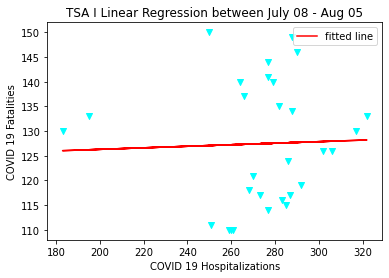

slope: 0.015569    intercept: 123.186714
R-squared: 0.001309 
Pearson corrrelation: 0.036181    Spearman correlation: 0.174192
Pearson p-value: 8.52E-1
Spearman p-value: 3.66E-1
This is a weakly positive relationship
Neither correlation p-value indicates that the correlation between our samples is significantly different from zero.

Linear Regression p-value: 8.52E-1
There is not enough evidence to conclude if hospitalizations has a statistically significant affect on the value of fatalities.


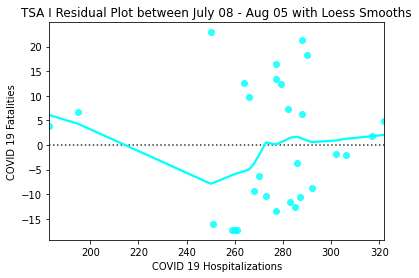

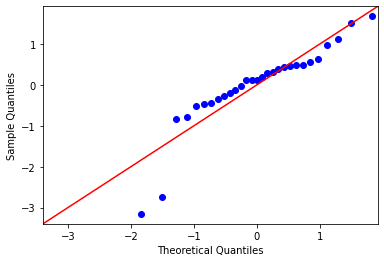

qq-plot of TSA I (July 08 - Aug 05) for Hospitalizations


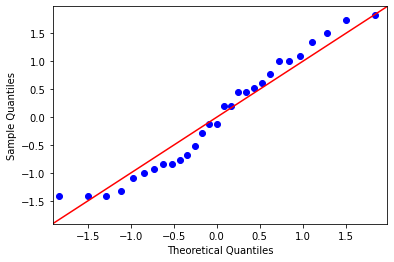

qq-plot of TSA I (July 08 - Aug 05) for Fatalities

levene p-value: 5.92E-2
There is not enough evidence to reject the assumption of equal variance between the samples. This means there is not enough evidence to prevent using a parametric analysis model. We therefore conduct a two-sided t-test, which assumes equal population variance.

t-test p_value: 8.31E-32
There is significant evidence that the observed relationship between hospitalizations and fatalities is not due to random chance.


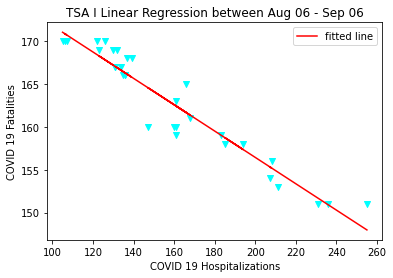

slope: -0.153709    intercept: 187.168205
R-squared: 0.920595 
Pearson corrrelation: -0.959476    Spearman correlation: -0.958120
Pearson p-value: 4.72E-18
Spearman p-value: 7.67E-18
This is a strongly negative relationship
A correlation p-value of 4.723917412461357e-18 indicates that the correlation between our samples is significant and different from zero.

Linear Regression p-value: 4.72E-18
A linear regression p-value this low strongly suggests that hospitalizations has a statistically significant affect on the value of fatalities


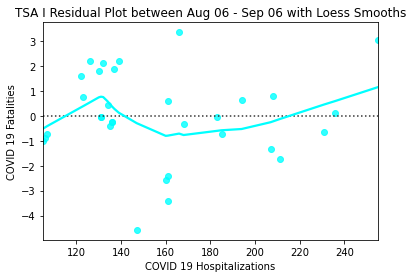

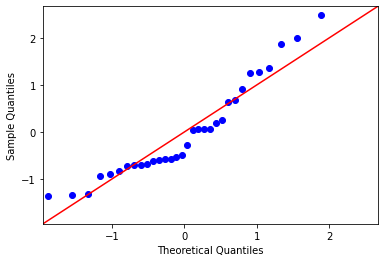

qq-plot of TSA I (Aug 06 - Sep 06) for Hospitalizations


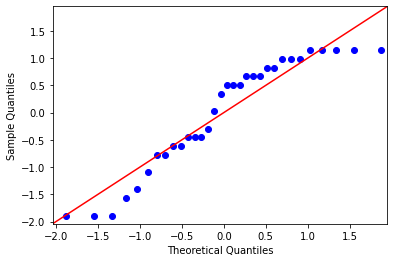

qq-plot of TSA I (Aug 06 - Sep 06) for Fatalities

levene p-value: 3.10E-6
There is strong evidence that the two samples do not have equal variances. This means it is strongly suggested to use a non-parametric analysis model to prevent commiting a Type 1 error! We therefore conduct Welch's t-test which does not assume equal population variance.

t-test p_value: 5.23E-1
There is not enough evidence to suggest that the observed relationship between hospitalizations and fatalities is due to anything but random chance.


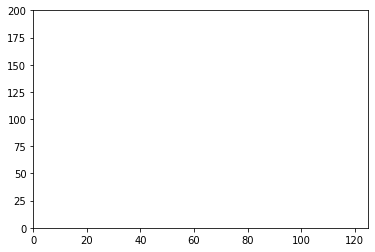

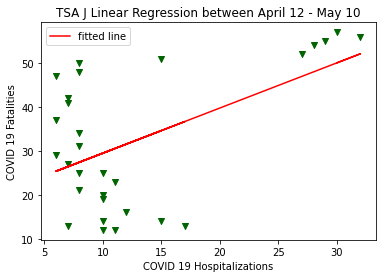

slope: 1.028356    intercept: 19.188960
R-squared: 0.276305 
Pearson corrrelation: 0.525647    Spearman correlation: 0.161845
Pearson p-value: 3.41E-3
Spearman p-value: 4.02E-1
This is a weakly positive relationship
A correlation p-value of 0.0034070423639303354 indicates that the correlation between our samples is significant and different from zero.

Linear Regression p-value: 3.41E-3
A linear regression p-value this low strongly suggests that hospitalizations has a statistically significant affect on the value of fatalities


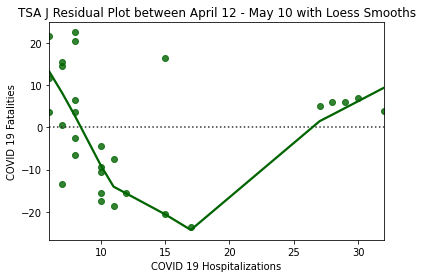

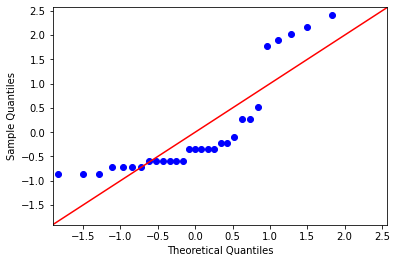

qq-plot of TSA J (April 12 - May 10) for Hospitalizations


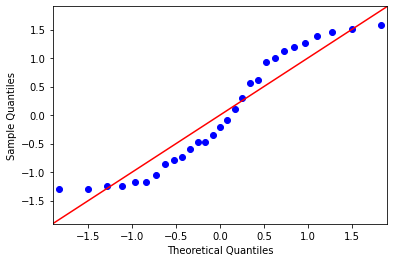

qq-plot of TSA J (April 12 - May 10) for Fatalities

levene p-value: 5.36E-5
There is strong evidence that the two samples do not have equal variances. This means it is strongly suggested to use a non-parametric analysis model to prevent commiting a Type 1 error! We therefore conduct Welch's t-test which does not assume equal population variance.

t-test p_value: 5.60E-7
There is significant evidence that the observed relationship between hospitalizations and fatalities is not due to random chance.


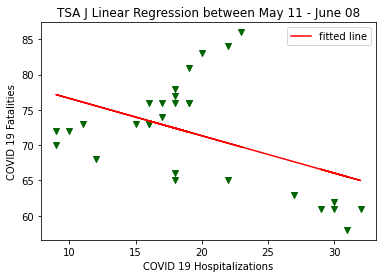

slope: -0.528837    intercept: 81.919922
R-squared: 0.212208 
Pearson corrrelation: -0.460660    Spearman correlation: -0.233731
Pearson p-value: 1.19E-2
Spearman p-value: 2.22E-1
This is a weakly negative relationship
A correlation p-value of 0.011909429860133897 indicates that the correlation between our samples is significant and different from zero.

Linear Regression p-value: 1.19E-2
A linear regression p-value this low strongly suggests that hospitalizations has a statistically significant affect on the value of fatalities


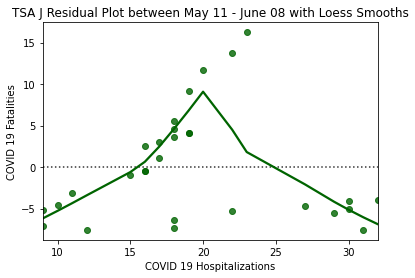

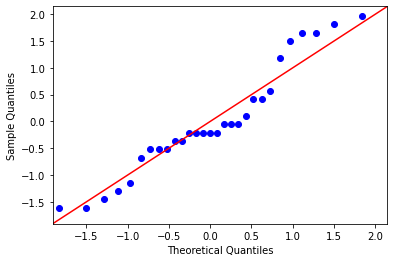

qq-plot of TSA J (May 11 - June 08) for Hospitalizations


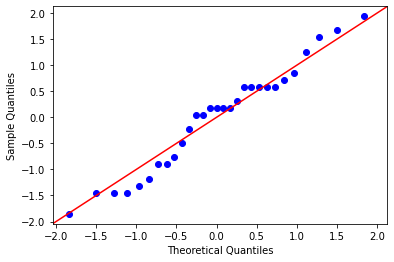

qq-plot of TSA J (May 11 - June 08) for Fatalities

levene p-value: 3.53E-1
There is not enough evidence to reject the assumption of equal variance between the samples. This means there is not enough evidence to prevent using a parametric analysis model. We therefore conduct a two-sided t-test, which assumes equal population variance.

t-test p_value: 7.71E-35
There is significant evidence that the observed relationship between hospitalizations and fatalities is not due to random chance.


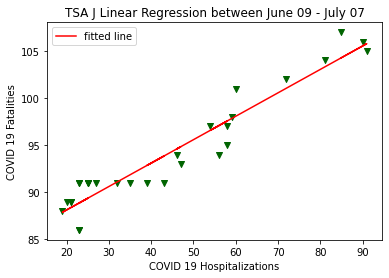

slope: 0.248780    intercept: 83.148731
R-squared: 0.913832 
Pearson corrrelation: 0.955946    Spearman correlation: 0.952907
Pearson p-value: 6.72E-16
Spearman p-value: 1.62E-15
This is a strongly positive relationship
A correlation p-value of 6.723182118465481e-16 indicates that the correlation between our samples is significant and different from zero.

Linear Regression p-value: 6.72E-16
A linear regression p-value this low strongly suggests that hospitalizations has a statistically significant affect on the value of fatalities


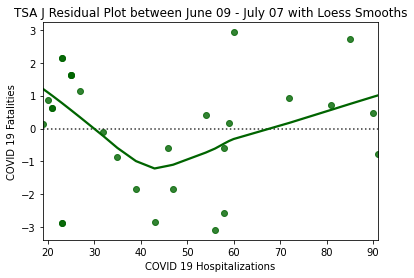

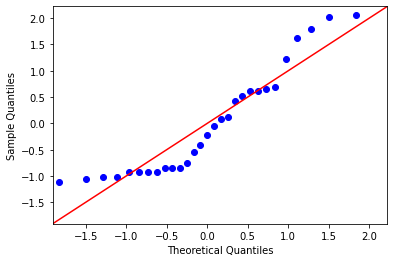

qq-plot of TSA J (June 09 - July 07) for Hospitalizations


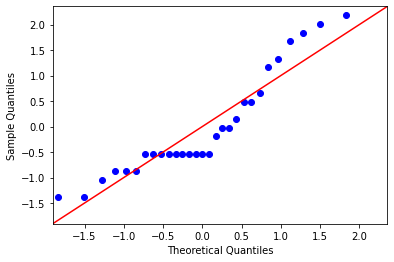

qq-plot of TSA J (June 09 - July 07) for Fatalities

levene p-value: 7.12E-7
There is strong evidence that the two samples do not have equal variances. This means it is strongly suggested to use a non-parametric analysis model to prevent commiting a Type 1 error! We therefore conduct Welch's t-test which does not assume equal population variance.

t-test p_value: 1.22E-12
There is significant evidence that the observed relationship between hospitalizations and fatalities is not due to random chance.


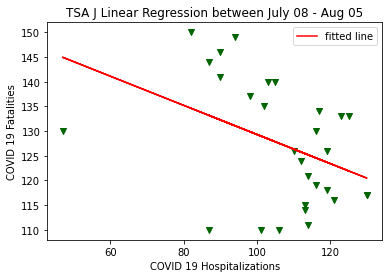

slope: -0.294867    intercept: 158.805880
R-squared: 0.166540 
Pearson corrrelation: -0.408093    Spearman correlation: -0.397335
Pearson p-value: 2.80E-2
Spearman p-value: 3.28E-2
This is a weakly negative relationship
A correlation p-value of 0.02797316035763271 indicates that the correlation between our samples is significant and different from zero.

Linear Regression p-value: 2.80E-2
A linear regression p-value this low strongly suggests that hospitalizations has a statistically significant affect on the value of fatalities


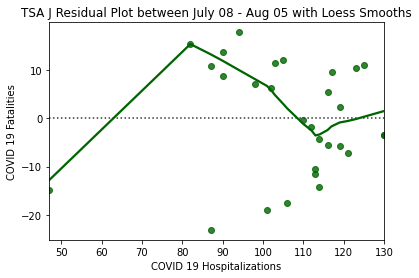

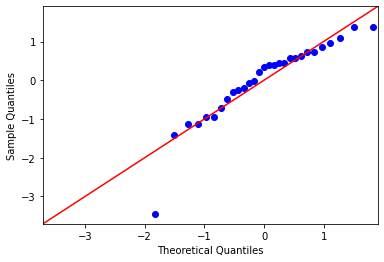

qq-plot of TSA J (July 08 - Aug 05) for Hospitalizations


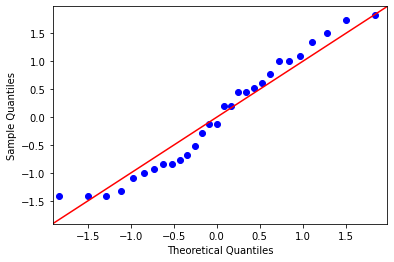

qq-plot of TSA J (July 08 - Aug 05) for Fatalities

levene p-value: 4.92E-1
There is not enough evidence to reject the assumption of equal variance between the samples. This means there is not enough evidence to prevent using a parametric analysis model. We therefore conduct a two-sided t-test, which assumes equal population variance.

t-test p_value: 2.15E-6
There is significant evidence that the observed relationship between hospitalizations and fatalities is not due to random chance.


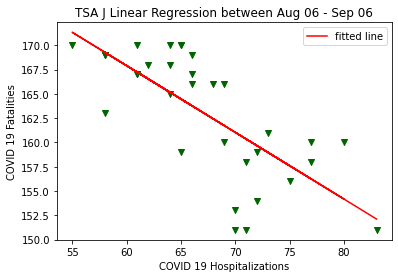

slope: -0.686400    intercept: 209.089921
R-squared: 0.521882 
Pearson corrrelation: -0.722414    Spearman correlation: -0.750370
Pearson p-value: 3.04E-6
Spearman p-value: 7.60E-7
This is a weakly negative relationship
A correlation p-value of 7.601410634075929e-07 indicates that the correlation between our samples is significant and different from zero.

Linear Regression p-value: 3.04E-6
A linear regression p-value this low strongly suggests that hospitalizations has a statistically significant affect on the value of fatalities


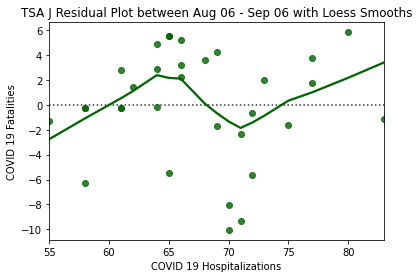

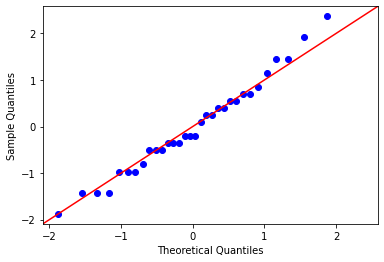

qq-plot of TSA J (Aug 06 - Sep 06) for Hospitalizations


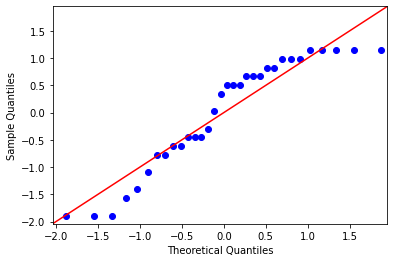

qq-plot of TSA J (Aug 06 - Sep 06) for Fatalities

levene p-value: 9.29E-1
There is not enough evidence to reject the assumption of equal variance between the samples. This means there is not enough evidence to prevent using a parametric analysis model. We therefore conduct a two-sided t-test, which assumes equal population variance.

t-test p_value: 6.24E-56
There is significant evidence that the observed relationship between hospitalizations and fatalities is not due to random chance.


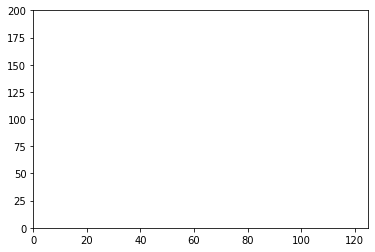

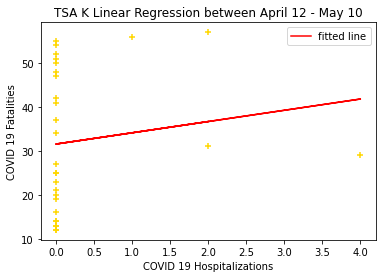

slope: 2.562112    intercept: 31.549689
R-squared: 0.020646 
Pearson corrrelation: 0.143689    Spearman correlation: 0.317763
Pearson p-value: 4.57E-1
Spearman p-value: 9.30E-2
This is a weakly positive relationship
Neither correlation p-value indicates that the correlation between our samples is significantly different from zero.

Linear Regression p-value: 4.57E-1
There is not enough evidence to conclude if hospitalizations has a statistically significant affect on the value of fatalities.


/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/smoothers_lowess.py:165: RuntimeWarning: invalid value encountered in true_divide
  res = _lowess(y, x, frac=frac, it=it, delta=delta)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/smoothers_lowess.py:165: RuntimeWarning: invalid value encountered in greater_equal
  res = _lowess(y, x, frac=frac, it=it, delta=delta)


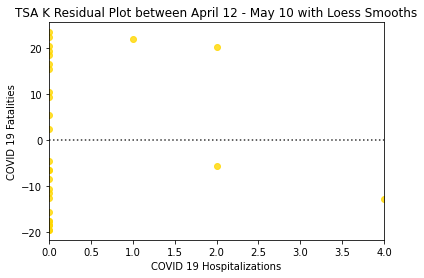

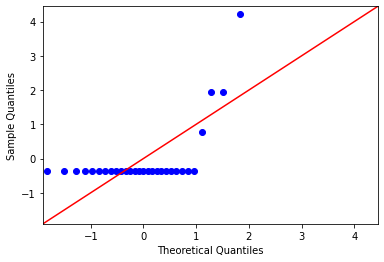

qq-plot of TSA K (April 12 - May 10) for Hospitalizations


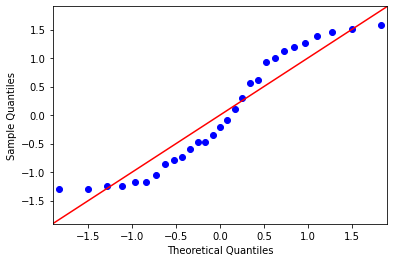

qq-plot of TSA K (April 12 - May 10) for Fatalities

levene p-value: 2.38E-12
There is strong evidence that the two samples do not have equal variances. This means it is strongly suggested to use a non-parametric analysis model to prevent commiting a Type 1 error! We therefore conduct Welch's t-test which does not assume equal population variance.

t-test p_value: 1.44E-11
There is significant evidence that the observed relationship between hospitalizations and fatalities is not due to random chance.


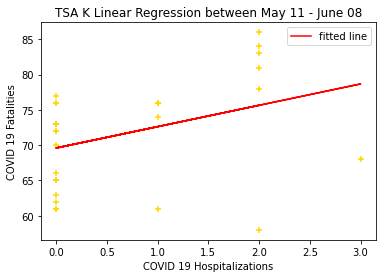

slope: 3.024217    intercept: 69.603989
R-squared: 0.139927 
Pearson corrrelation: 0.374068    Spearman correlation: 0.423197
Pearson p-value: 4.56E-2
Spearman p-value: 2.22E-2
This is a weakly positive relationship
A correlation p-value of 0.02217116573739996 indicates that the correlation between our samples is significant and different from zero.

Linear Regression p-value: 4.56E-2
A linear regression p-value this low strongly suggests that hospitalizations has a statistically significant affect on the value of fatalities


/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/smoothers_lowess.py:165: RuntimeWarning: invalid value encountered in greater_equal
  res = _lowess(y, x, frac=frac, it=it, delta=delta)


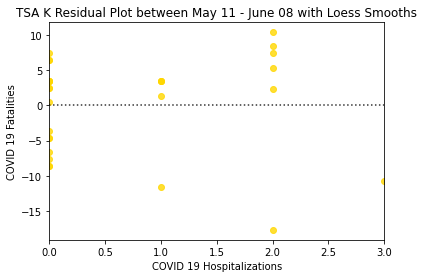

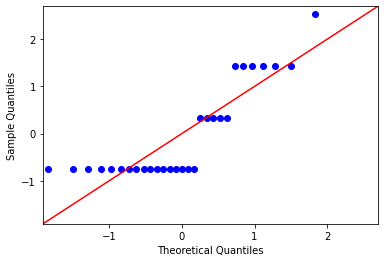

qq-plot of TSA K (May 11 - June 08) for Hospitalizations


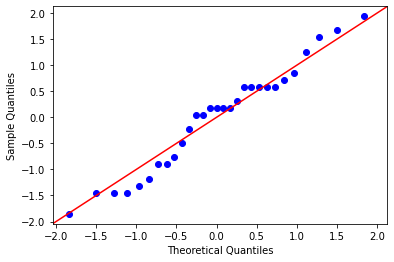

qq-plot of TSA K (May 11 - June 08) for Fatalities

levene p-value: 2.03E-7
There is strong evidence that the two samples do not have equal variances. This means it is strongly suggested to use a non-parametric analysis model to prevent commiting a Type 1 error! We therefore conduct Welch's t-test which does not assume equal population variance.

t-test p_value: 1.05E-29
There is significant evidence that the observed relationship between hospitalizations and fatalities is not due to random chance.


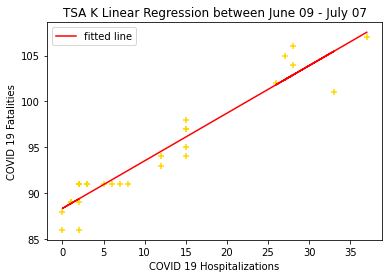

slope: 0.518663    intercept: 88.343211
R-squared: 0.915494 
Pearson corrrelation: 0.956814    Spearman correlation: 0.951795
Pearson p-value: 5.16E-16
Spearman p-value: 2.21E-15
This is a strongly positive relationship
A correlation p-value of 5.16440913356554e-16 indicates that the correlation between our samples is significant and different from zero.

Linear Regression p-value: 5.16E-16
A linear regression p-value this low strongly suggests that hospitalizations has a statistically significant affect on the value of fatalities


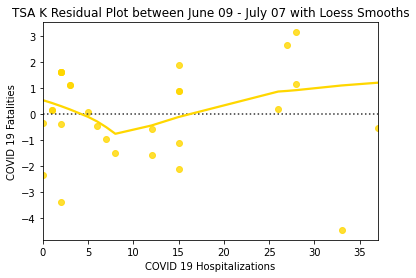

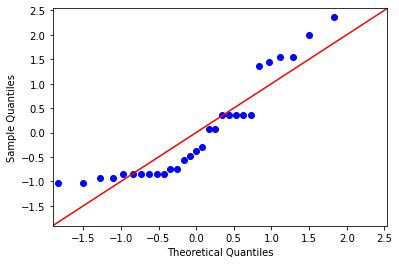

qq-plot of TSA K (June 09 - July 07) for Hospitalizations


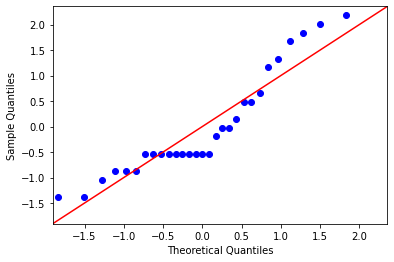

qq-plot of TSA K (June 09 - July 07) for Fatalities

levene p-value: 1.49E-2
There is strong evidence that the two samples do not have equal variances. This means it is strongly suggested to use a non-parametric analysis model to prevent commiting a Type 1 error! We therefore conduct Welch's t-test which does not assume equal population variance.

t-test p_value: 1.57E-33
There is significant evidence that the observed relationship between hospitalizations and fatalities is not due to random chance.


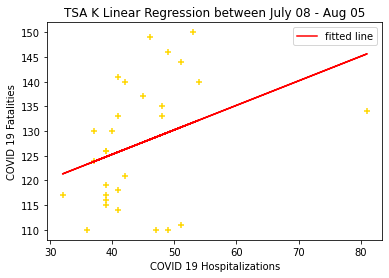

slope: 0.495675    intercept: 105.467634
R-squared: 0.124781 
Pearson corrrelation: 0.353243    Spearman correlation: 0.443499
Pearson p-value: 6.01E-2
Spearman p-value: 1.60E-2
This is a weakly positive relationship
A correlation p-value of 0.015962843789017 indicates that the correlation between our samples is significant and different from zero.

Linear Regression p-value: 6.01E-2
There is not enough evidence to conclude if hospitalizations has a statistically significant affect on the value of fatalities.


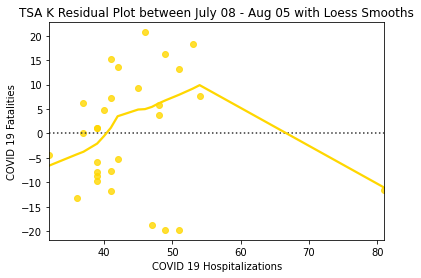

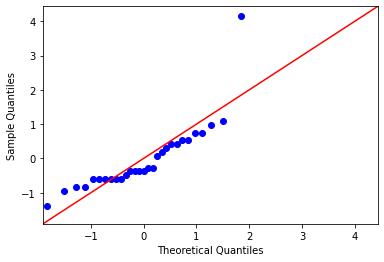

qq-plot of TSA K (July 08 - Aug 05) for Hospitalizations


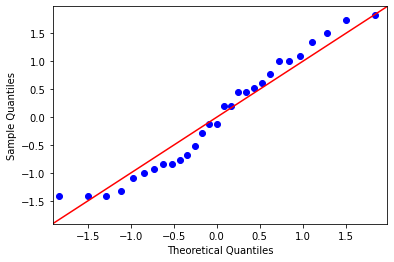

qq-plot of TSA K (July 08 - Aug 05) for Fatalities

levene p-value: 7.64E-3
There is strong evidence that the two samples do not have equal variances. This means it is strongly suggested to use a non-parametric analysis model to prevent commiting a Type 1 error! We therefore conduct Welch's t-test which does not assume equal population variance.

t-test p_value: 3.81E-33
There is significant evidence that the observed relationship between hospitalizations and fatalities is not due to random chance.


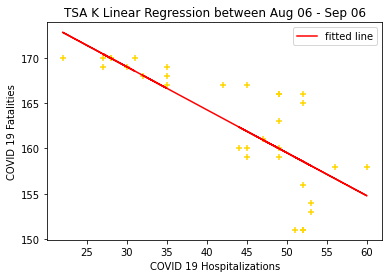

slope: -0.475045    intercept: 183.270666
R-squared: 0.604669 
Pearson corrrelation: -0.777605    Spearman correlation: -0.869477
Pearson p-value: 1.64E-7
Spearman p-value: 1.06E-10
This is a weakly negative relationship
A correlation p-value of 1.0649439053292614e-10 indicates that the correlation between our samples is significant and different from zero.

Linear Regression p-value: 1.64E-7
A linear regression p-value this low strongly suggests that hospitalizations has a statistically significant affect on the value of fatalities


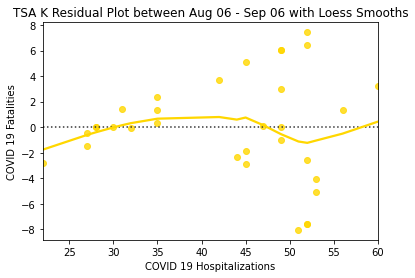

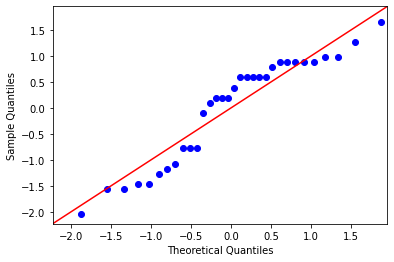

qq-plot of TSA K (Aug 06 - Sep 06) for Hospitalizations


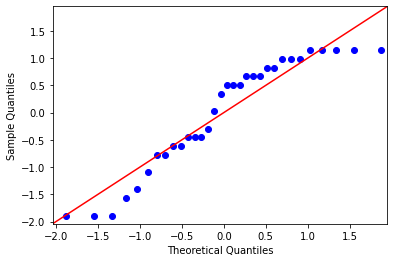

qq-plot of TSA K (Aug 06 - Sep 06) for Fatalities

levene p-value: 2.43E-2
There is strong evidence that the two samples do not have equal variances. This means it is strongly suggested to use a non-parametric analysis model to prevent commiting a Type 1 error! We therefore conduct Welch's t-test which does not assume equal population variance.

t-test p_value: 1.71E-47
There is significant evidence that the observed relationship between hospitalizations and fatalities is not due to random chance.


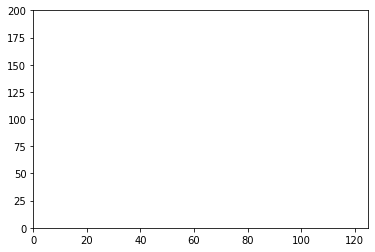

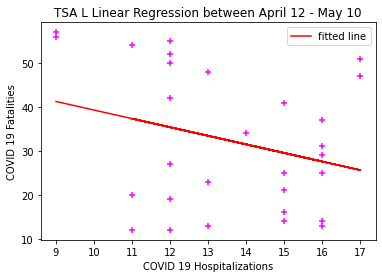

slope: -1.954230    intercept: 58.828017
R-squared: 0.080687 
Pearson corrrelation: -0.284054    Spearman correlation: -0.204275
Pearson p-value: 1.35E-1
Spearman p-value: 2.88E-1
This is a weakly negative relationship
Neither correlation p-value indicates that the correlation between our samples is significantly different from zero.

Linear Regression p-value: 1.35E-1
There is not enough evidence to conclude if hospitalizations has a statistically significant affect on the value of fatalities.


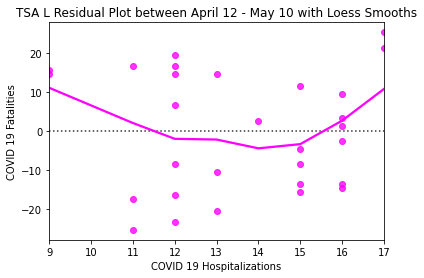

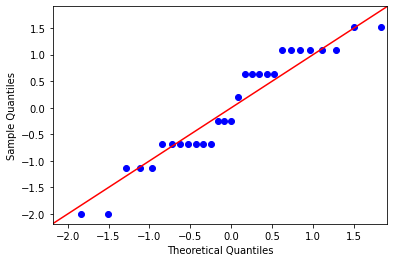

qq-plot of TSA L (April 12 - May 10) for Hospitalizations


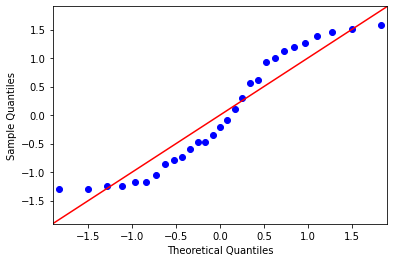

qq-plot of TSA L (April 12 - May 10) for Fatalities

levene p-value: 1.86E-10
There is strong evidence that the two samples do not have equal variances. This means it is strongly suggested to use a non-parametric analysis model to prevent commiting a Type 1 error! We therefore conduct Welch's t-test which does not assume equal population variance.

t-test p_value: 6.70E-7
There is significant evidence that the observed relationship between hospitalizations and fatalities is not due to random chance.


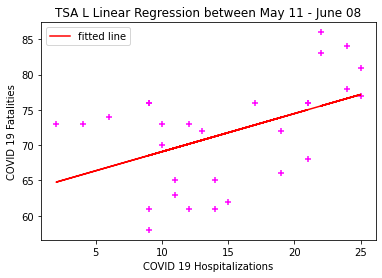

slope: 0.539521    intercept: 63.689859
R-squared: 0.225208 
Pearson corrrelation: 0.474561    Spearman correlation: 0.492310
Pearson p-value: 9.29E-3
Spearman p-value: 6.67E-3
This is a weakly positive relationship
A correlation p-value of 0.006669682103913535 indicates that the correlation between our samples is significant and different from zero.

Linear Regression p-value: 9.29E-3
A linear regression p-value this low strongly suggests that hospitalizations has a statistically significant affect on the value of fatalities


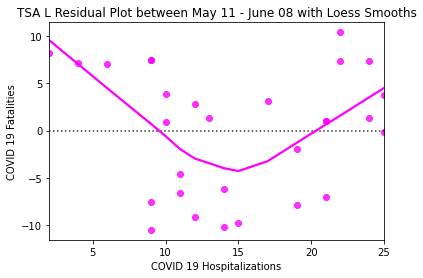

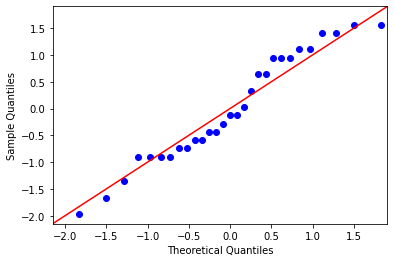

qq-plot of TSA L (May 11 - June 08) for Hospitalizations


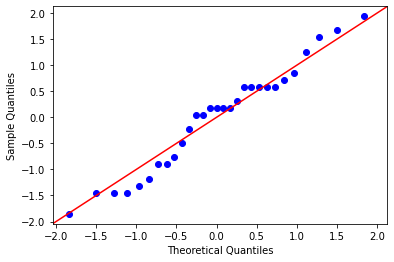

qq-plot of TSA L (May 11 - June 08) for Fatalities

levene p-value: 7.51E-1
There is not enough evidence to reject the assumption of equal variance between the samples. This means there is not enough evidence to prevent using a parametric analysis model. We therefore conduct a two-sided t-test, which assumes equal population variance.

t-test p_value: 1.23E-36
There is significant evidence that the observed relationship between hospitalizations and fatalities is not due to random chance.


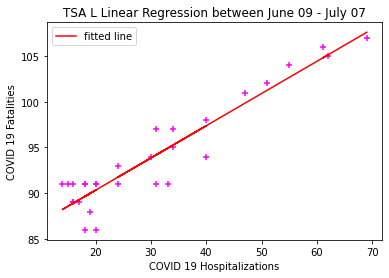

slope: 0.351761    intercept: 83.306131
R-squared: 0.886777 
Pearson corrrelation: 0.941688    Spearman correlation: 0.839925
Pearson p-value: 2.72E-14
Spearman p-value: 1.22E-8
This is a strongly positive relationship
A correlation p-value of 2.7199868113758866e-14 indicates that the correlation between our samples is significant and different from zero.

Linear Regression p-value: 2.72E-14
A linear regression p-value this low strongly suggests that hospitalizations has a statistically significant affect on the value of fatalities


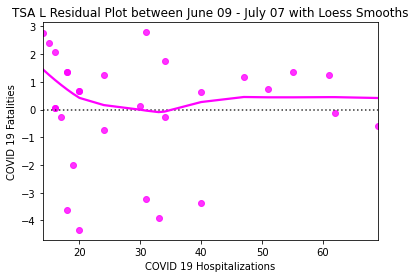

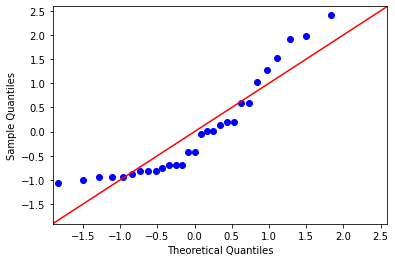

qq-plot of TSA L (June 09 - July 07) for Hospitalizations


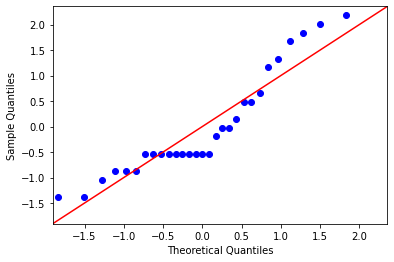

qq-plot of TSA L (June 09 - July 07) for Fatalities

levene p-value: 1.16E-3
There is strong evidence that the two samples do not have equal variances. This means it is strongly suggested to use a non-parametric analysis model to prevent commiting a Type 1 error! We therefore conduct Welch's t-test which does not assume equal population variance.

t-test p_value: 7.21E-21
There is significant evidence that the observed relationship between hospitalizations and fatalities is not due to random chance.


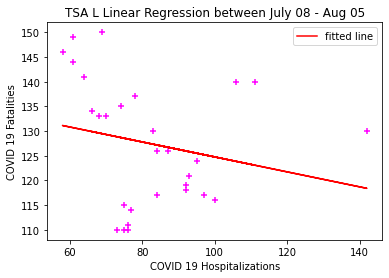

slope: -0.151391    intercept: 139.909304
R-squared: 0.046374 
Pearson corrrelation: -0.215346    Spearman correlation: -0.331606
Pearson p-value: 2.62E-1
Spearman p-value: 7.89E-2
This is a weakly negative relationship
Neither correlation p-value indicates that the correlation between our samples is significantly different from zero.

Linear Regression p-value: 2.62E-1
There is not enough evidence to conclude if hospitalizations has a statistically significant affect on the value of fatalities.


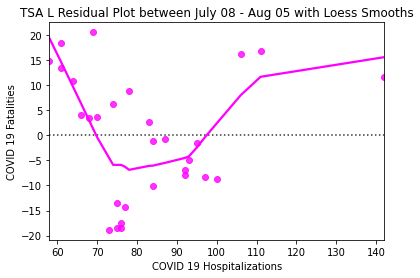

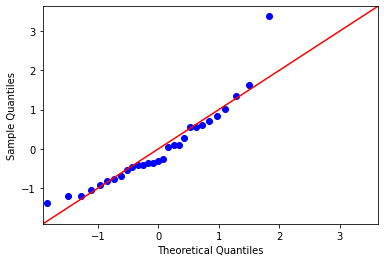

qq-plot of TSA L (July 08 - Aug 05) for Hospitalizations


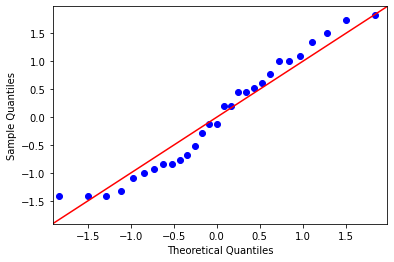

qq-plot of TSA L (July 08 - Aug 05) for Fatalities

levene p-value: 4.20E-1
There is not enough evidence to reject the assumption of equal variance between the samples. This means there is not enough evidence to prevent using a parametric analysis model. We therefore conduct a two-sided t-test, which assumes equal population variance.

t-test p_value: 9.18E-16
There is significant evidence that the observed relationship between hospitalizations and fatalities is not due to random chance.


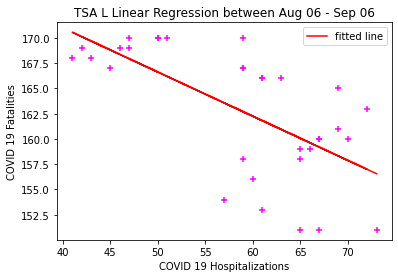

slope: -0.437444    intercept: 188.488929
R-squared: 0.428271 
Pearson corrrelation: -0.654424    Spearman correlation: -0.666821
Pearson p-value: 4.84E-5
Spearman p-value: 3.08E-5
This is a weakly negative relationship
A correlation p-value of 3.08049329135954e-05 indicates that the correlation between our samples is significant and different from zero.

Linear Regression p-value: 4.84E-5
A linear regression p-value this low strongly suggests that hospitalizations has a statistically significant affect on the value of fatalities


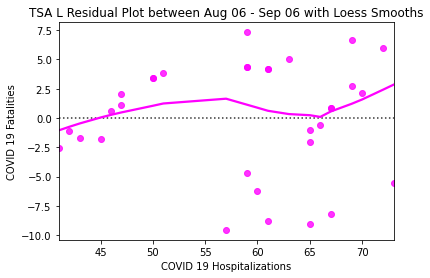

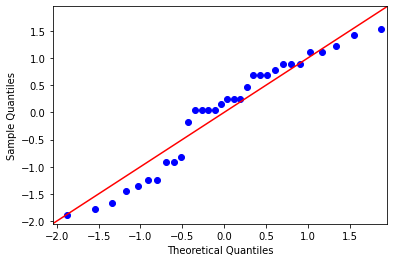

qq-plot of TSA L (Aug 06 - Sep 06) for Hospitalizations


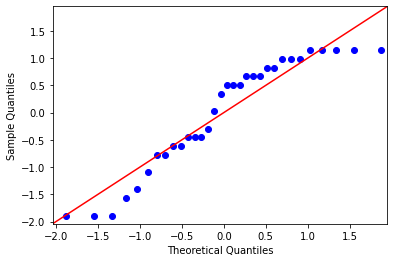

qq-plot of TSA L (Aug 06 - Sep 06) for Fatalities

levene p-value: 7.55E-2
There is not enough evidence to reject the assumption of equal variance between the samples. This means there is not enough evidence to prevent using a parametric analysis model. We therefore conduct a two-sided t-test, which assumes equal population variance.

t-test p_value: 1.40E-52
There is significant evidence that the observed relationship between hospitalizations and fatalities is not due to random chance.


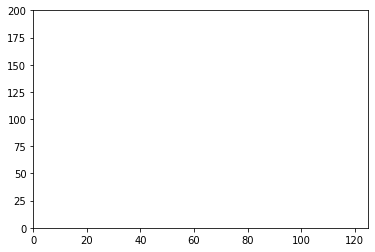

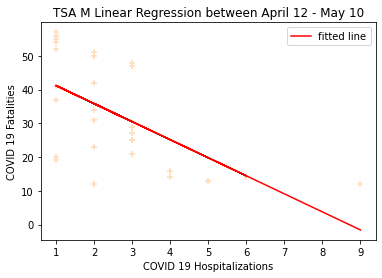

slope: -5.346827    intercept: 46.541575
R-squared: 0.382845 
Pearson corrrelation: -0.618745    Spearman correlation: -0.654047
Pearson p-value: 3.46E-4
Spearman p-value: 1.19E-4
This is a weakly negative relationship
A correlation p-value of 0.00011899427902598264 indicates that the correlation between our samples is significant and different from zero.

Linear Regression p-value: 3.46E-4
A linear regression p-value this low strongly suggests that hospitalizations has a statistically significant affect on the value of fatalities


/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/smoothers_lowess.py:165: RuntimeWarning: invalid value encountered in greater_equal
  res = _lowess(y, x, frac=frac, it=it, delta=delta)


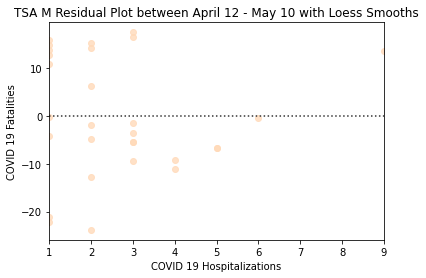

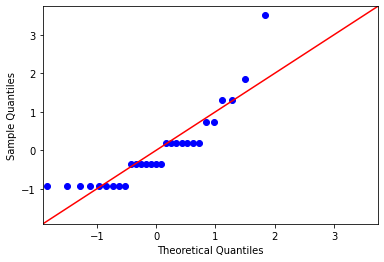

qq-plot of TSA M (April 12 - May 10) for Hospitalizations


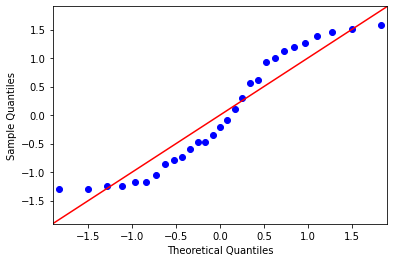

qq-plot of TSA M (April 12 - May 10) for Fatalities

levene p-value: 3.55E-11
There is strong evidence that the two samples do not have equal variances. This means it is strongly suggested to use a non-parametric analysis model to prevent commiting a Type 1 error! We therefore conduct Welch's t-test which does not assume equal population variance.

t-test p_value: 7.22E-11
There is significant evidence that the observed relationship between hospitalizations and fatalities is not due to random chance.


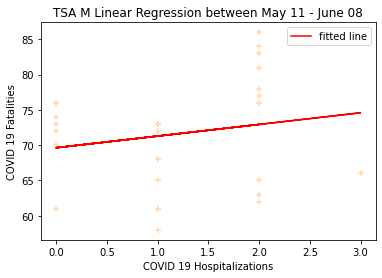

slope: 1.650485    intercept: 69.640777
R-squared: 0.036690 
Pearson corrrelation: 0.191547    Spearman correlation: 0.292901
Pearson p-value: 3.20E-1
Spearman p-value: 1.23E-1
This is a weakly positive relationship
Neither correlation p-value indicates that the correlation between our samples is significantly different from zero.

Linear Regression p-value: 3.20E-1
There is not enough evidence to conclude if hospitalizations has a statistically significant affect on the value of fatalities.


/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/smoothers_lowess.py:165: RuntimeWarning: invalid value encountered in greater_equal
  res = _lowess(y, x, frac=frac, it=it, delta=delta)


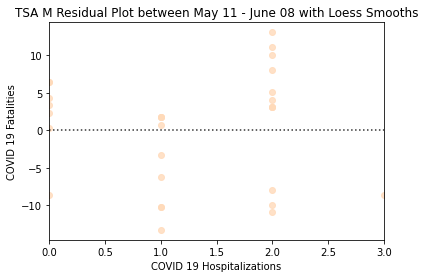

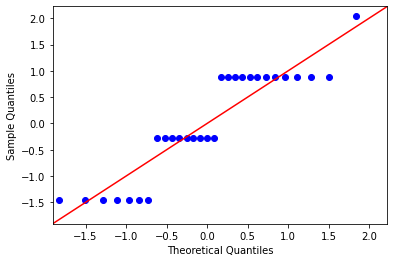

qq-plot of TSA M (May 11 - June 08) for Hospitalizations


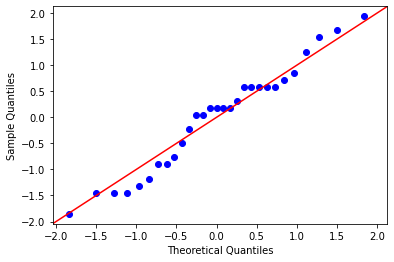

qq-plot of TSA M (May 11 - June 08) for Fatalities

levene p-value: 1.76E-7
There is strong evidence that the two samples do not have equal variances. This means it is strongly suggested to use a non-parametric analysis model to prevent commiting a Type 1 error! We therefore conduct Welch's t-test which does not assume equal population variance.

t-test p_value: 1.54E-29
There is significant evidence that the observed relationship between hospitalizations and fatalities is not due to random chance.


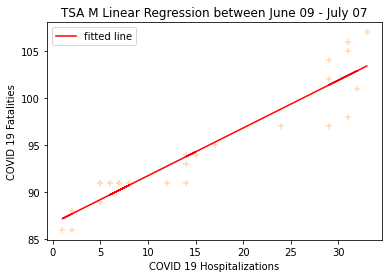

slope: 0.506610    intercept: 86.695998
R-squared: 0.888175 
Pearson corrrelation: 0.942430    Spearman correlation: 0.957027
Pearson p-value: 2.30E-14
Spearman p-value: 4.84E-16
This is a strongly positive relationship
A correlation p-value of 4.837272292971373e-16 indicates that the correlation between our samples is significant and different from zero.

Linear Regression p-value: 2.30E-14
A linear regression p-value this low strongly suggests that hospitalizations has a statistically significant affect on the value of fatalities


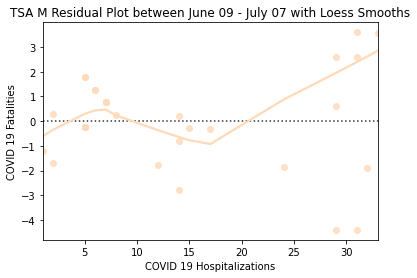

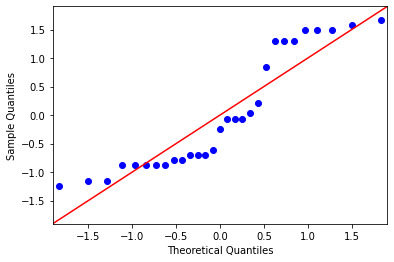

qq-plot of TSA M (June 09 - July 07) for Hospitalizations


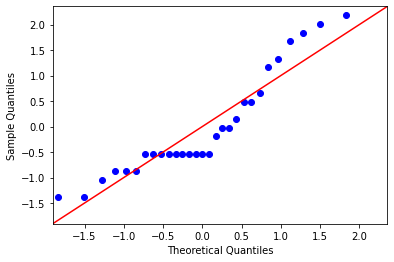

qq-plot of TSA M (June 09 - July 07) for Fatalities

levene p-value: 2.02E-3
There is strong evidence that the two samples do not have equal variances. This means it is strongly suggested to use a non-parametric analysis model to prevent commiting a Type 1 error! We therefore conduct Welch's t-test which does not assume equal population variance.

t-test p_value: 1.61E-32
There is significant evidence that the observed relationship between hospitalizations and fatalities is not due to random chance.


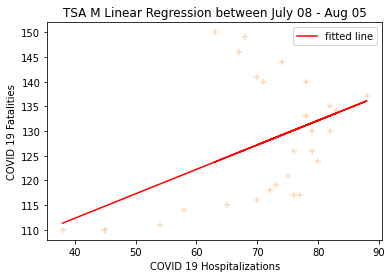

slope: 0.494983    intercept: 92.560501
R-squared: 0.229682 
Pearson corrrelation: 0.479252    Spearman correlation: 0.382992
Pearson p-value: 8.53E-3
Spearman p-value: 4.03E-2
This is a weakly positive relationship
A correlation p-value of 0.008527028316413877 indicates that the correlation between our samples is significant and different from zero.

Linear Regression p-value: 8.53E-3
A linear regression p-value this low strongly suggests that hospitalizations has a statistically significant affect on the value of fatalities


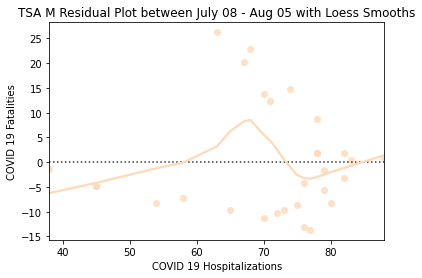

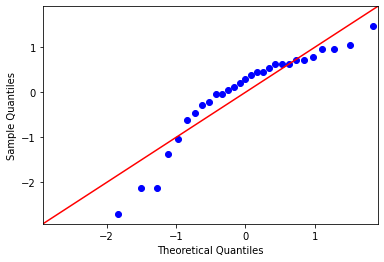

qq-plot of TSA M (July 08 - Aug 05) for Hospitalizations


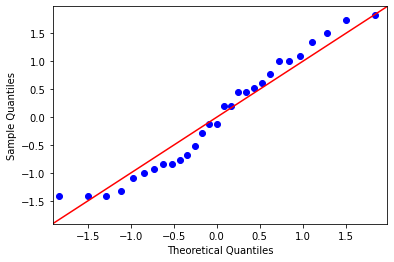

qq-plot of TSA M (July 08 - Aug 05) for Fatalities

levene p-value: 3.03E-1
There is not enough evidence to reject the assumption of equal variance between the samples. This means there is not enough evidence to prevent using a parametric analysis model. We therefore conduct a two-sided t-test, which assumes equal population variance.

t-test p_value: 2.31E-24
There is significant evidence that the observed relationship between hospitalizations and fatalities is not due to random chance.


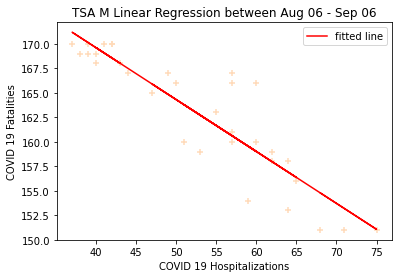

slope: -0.529594    intercept: 190.779853
R-squared: 0.809114 
Pearson corrrelation: -0.899508    Spearman correlation: -0.913852
Pearson p-value: 2.60E-12
Spearman p-value: 2.84E-13
This is a strongly negative relationship
A correlation p-value of 2.841713507261792e-13 indicates that the correlation between our samples is significant and different from zero.

Linear Regression p-value: 2.60E-12
A linear regression p-value this low strongly suggests that hospitalizations has a statistically significant affect on the value of fatalities


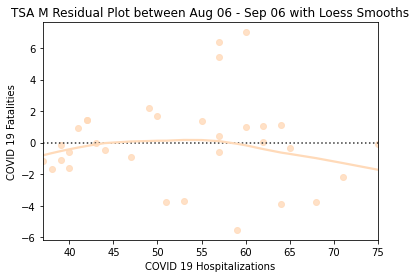

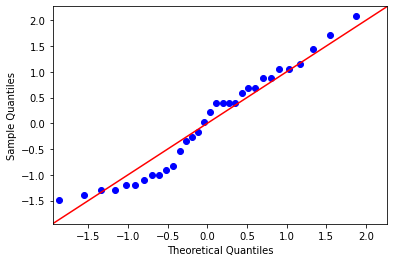

qq-plot of TSA M (Aug 06 - Sep 06) for Hospitalizations


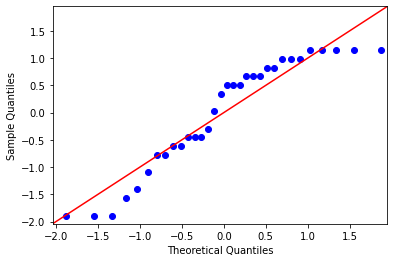

qq-plot of TSA M (Aug 06 - Sep 06) for Fatalities

levene p-value: 1.95E-3
There is strong evidence that the two samples do not have equal variances. This means it is strongly suggested to use a non-parametric analysis model to prevent commiting a Type 1 error! We therefore conduct Welch's t-test which does not assume equal population variance.

t-test p_value: 2.52E-44
There is significant evidence that the observed relationship between hospitalizations and fatalities is not due to random chance.


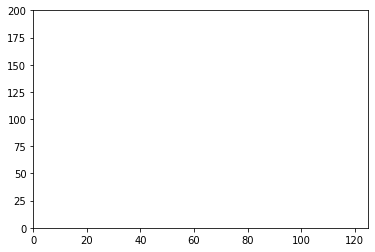

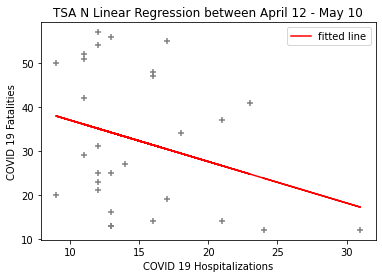

slope: -0.943808    intercept: 46.436851
R-squared: 0.088801 
Pearson corrrelation: -0.297994    Spearman correlation: -0.334920
Pearson p-value: 1.16E-1
Spearman p-value: 7.57E-2
This is a weakly negative relationship
Neither correlation p-value indicates that the correlation between our samples is significantly different from zero.

Linear Regression p-value: 1.16E-1
There is not enough evidence to conclude if hospitalizations has a statistically significant affect on the value of fatalities.


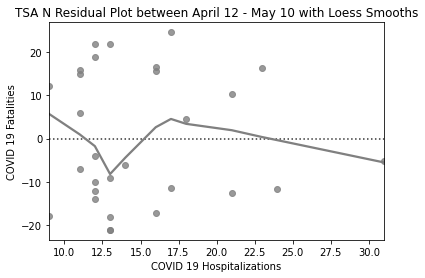

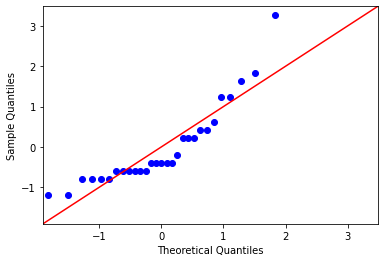

qq-plot of TSA N (April 12 - May 10) for Hospitalizations


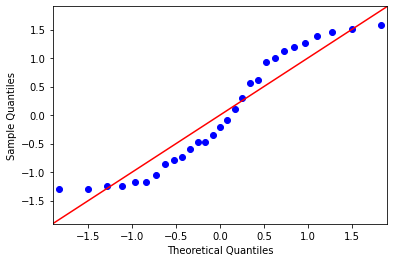

qq-plot of TSA N (April 12 - May 10) for Fatalities

levene p-value: 8.42E-8
There is strong evidence that the two samples do not have equal variances. This means it is strongly suggested to use a non-parametric analysis model to prevent commiting a Type 1 error! We therefore conduct Welch's t-test which does not assume equal population variance.

t-test p_value: 2.72E-6
There is significant evidence that the observed relationship between hospitalizations and fatalities is not due to random chance.


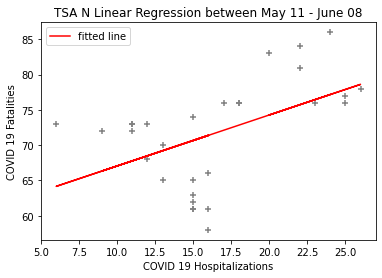

slope: 0.722489    intercept: 59.830871
R-squared: 0.246456 
Pearson corrrelation: 0.496444    Spearman correlation: 0.562096
Pearson p-value: 6.16E-3
Spearman p-value: 1.51E-3
This is a weakly positive relationship
A correlation p-value of 0.0015065743287953075 indicates that the correlation between our samples is significant and different from zero.

Linear Regression p-value: 6.16E-3
A linear regression p-value this low strongly suggests that hospitalizations has a statistically significant affect on the value of fatalities


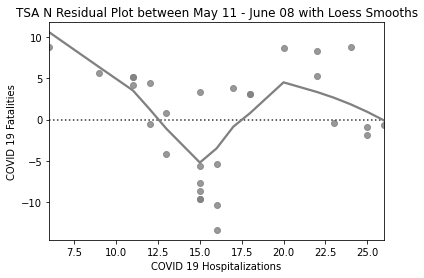

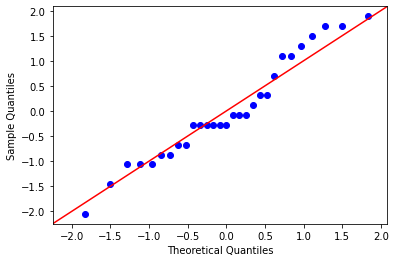

qq-plot of TSA N (May 11 - June 08) for Hospitalizations


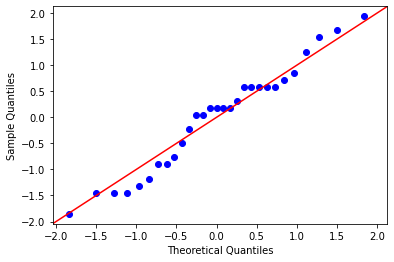

qq-plot of TSA N (May 11 - June 08) for Fatalities

levene p-value: 7.62E-2
There is not enough evidence to reject the assumption of equal variance between the samples. This means there is not enough evidence to prevent using a parametric analysis model. We therefore conduct a two-sided t-test, which assumes equal population variance.

t-test p_value: 3.94E-38
There is significant evidence that the observed relationship between hospitalizations and fatalities is not due to random chance.


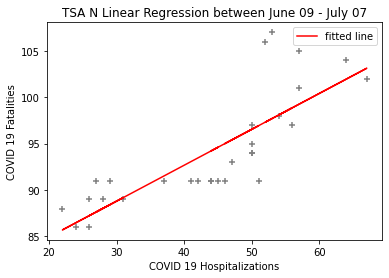

slope: 0.387240    intercept: 77.179477
R-squared: 0.651557 
Pearson corrrelation: 0.807191    Spearman correlation: 0.917891
Pearson p-value: 1.22E-7
Spearman p-value: 2.39E-12
This is a strongly positive relationship
A correlation p-value of 2.3939224110311273e-12 indicates that the correlation between our samples is significant and different from zero.

Linear Regression p-value: 1.22E-7
A linear regression p-value this low strongly suggests that hospitalizations has a statistically significant affect on the value of fatalities


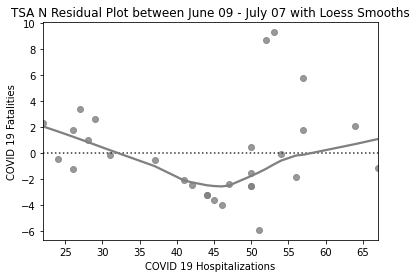

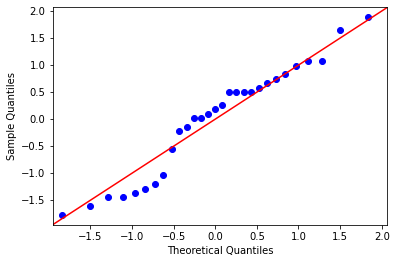

qq-plot of TSA N (June 09 - July 07) for Hospitalizations


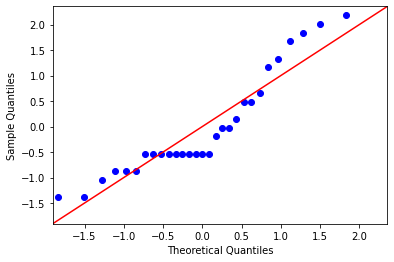

qq-plot of TSA N (June 09 - July 07) for Fatalities

levene p-value: 1.56E-3
There is strong evidence that the two samples do not have equal variances. This means it is strongly suggested to use a non-parametric analysis model to prevent commiting a Type 1 error! We therefore conduct Welch's t-test which does not assume equal population variance.

t-test p_value: 4.02E-22
There is significant evidence that the observed relationship between hospitalizations and fatalities is not due to random chance.


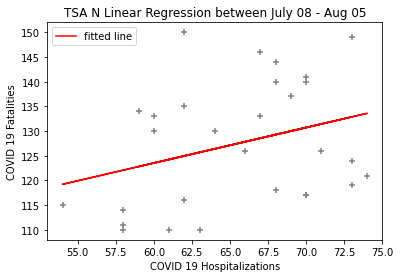

slope: 0.717676    intercept: 80.477593
R-squared: 0.099365 
Pearson corrrelation: 0.315222    Spearman correlation: 0.333293
Pearson p-value: 9.58E-2
Spearman p-value: 7.73E-2
This is a weakly positive relationship
Neither correlation p-value indicates that the correlation between our samples is significantly different from zero.

Linear Regression p-value: 9.58E-2
There is not enough evidence to conclude if hospitalizations has a statistically significant affect on the value of fatalities.


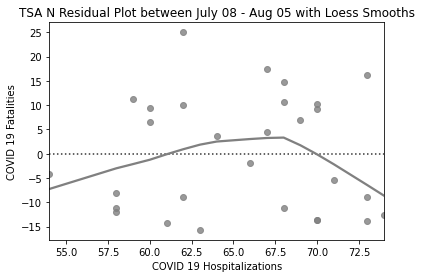

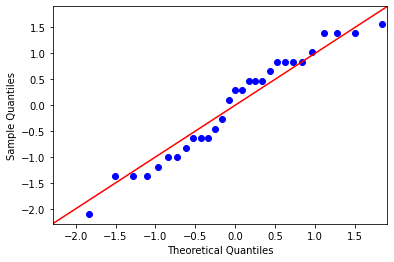

qq-plot of TSA N (July 08 - Aug 05) for Hospitalizations


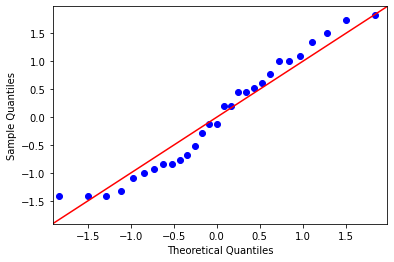

qq-plot of TSA N (July 08 - Aug 05) for Fatalities

levene p-value: 1.89E-5
There is strong evidence that the two samples do not have equal variances. This means it is strongly suggested to use a non-parametric analysis model to prevent commiting a Type 1 error! We therefore conduct Welch's t-test which does not assume equal population variance.

t-test p_value: 6.63E-25
There is significant evidence that the observed relationship between hospitalizations and fatalities is not due to random chance.


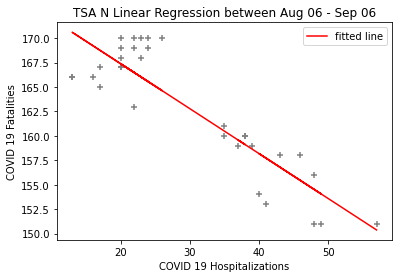

slope: -0.459815    intercept: 176.580730
R-squared: 0.787928 
Pearson corrrelation: -0.887653    Spearman correlation: -0.699668
Pearson p-value: 1.27E-11
Spearman p-value: 8.34E-6
This is a strongly negative relationship
A correlation p-value of 1.2740541687164151e-11 indicates that the correlation between our samples is significant and different from zero.

Linear Regression p-value: 1.27E-11
A linear regression p-value this low strongly suggests that hospitalizations has a statistically significant affect on the value of fatalities


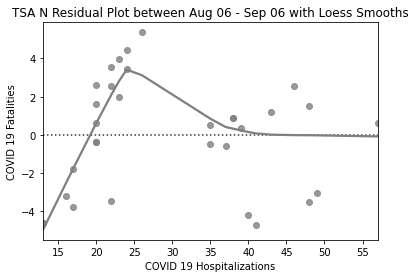

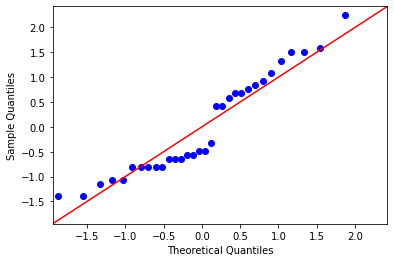

qq-plot of TSA N (Aug 06 - Sep 06) for Hospitalizations


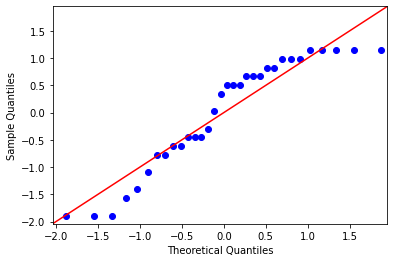

qq-plot of TSA N (Aug 06 - Sep 06) for Fatalities

levene p-value: 4.99E-3
There is strong evidence that the two samples do not have equal variances. This means it is strongly suggested to use a non-parametric analysis model to prevent commiting a Type 1 error! We therefore conduct Welch's t-test which does not assume equal population variance.

t-test p_value: 9.54E-44
There is significant evidence that the observed relationship between hospitalizations and fatalities is not due to random chance.


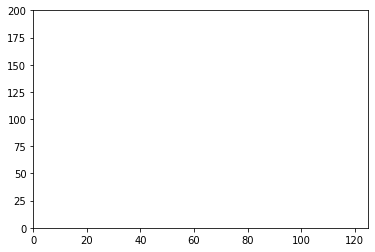

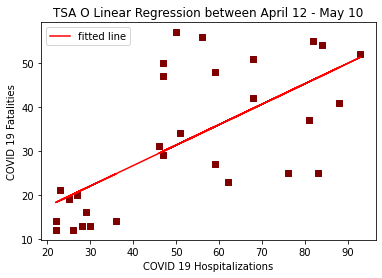

slope: 0.465080    intercept: 8.048421
R-squared: 0.448351 
Pearson corrrelation: 0.669590    Spearman correlation: 0.696757
Pearson p-value: 7.11E-5
Spearman p-value: 2.68E-5
This is a weakly positive relationship
A correlation p-value of 2.6822188756646786e-05 indicates that the correlation between our samples is significant and different from zero.

Linear Regression p-value: 7.11E-5
A linear regression p-value this low strongly suggests that hospitalizations has a statistically significant affect on the value of fatalities


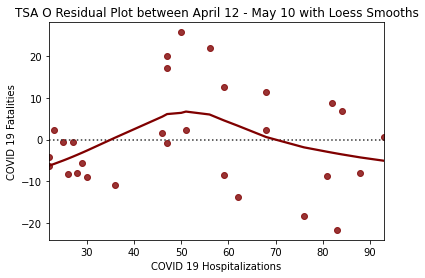

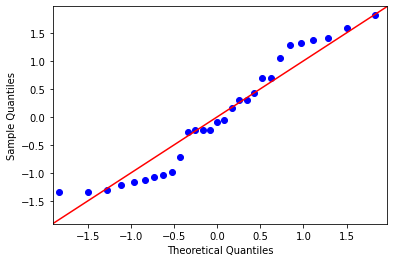

qq-plot of TSA O (April 12 - May 10) for Hospitalizations


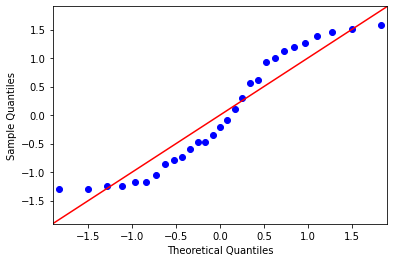

qq-plot of TSA O (April 12 - May 10) for Fatalities

levene p-value: 5.57E-2
There is not enough evidence to reject the assumption of equal variance between the samples. This means there is not enough evidence to prevent using a parametric analysis model. We therefore conduct a two-sided t-test, which assumes equal population variance.

t-test p_value: 3.06E-4
There is significant evidence that the observed relationship between hospitalizations and fatalities is not due to random chance.


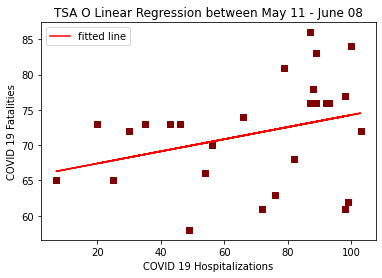

slope: 0.085869    intercept: 65.696613
R-squared: 0.098782 
Pearson corrrelation: 0.314295    Spearman correlation: 0.360037
Pearson p-value: 9.68E-2
Spearman p-value: 5.51E-2
This is a weakly positive relationship
Neither correlation p-value indicates that the correlation between our samples is significantly different from zero.

Linear Regression p-value: 9.68E-2
There is not enough evidence to conclude if hospitalizations has a statistically significant affect on the value of fatalities.


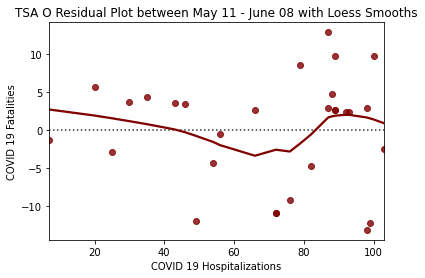

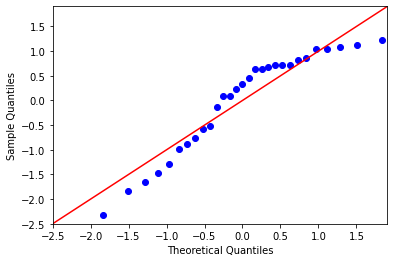

qq-plot of TSA O (May 11 - June 08) for Hospitalizations


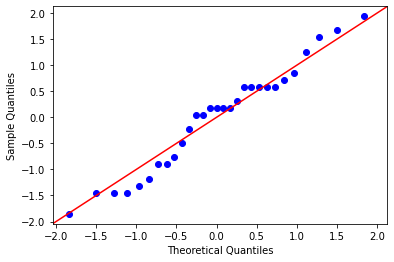

qq-plot of TSA O (May 11 - June 08) for Fatalities

levene p-value: 2.25E-5
There is strong evidence that the two samples do not have equal variances. This means it is strongly suggested to use a non-parametric analysis model to prevent commiting a Type 1 error! We therefore conduct Welch's t-test which does not assume equal population variance.

t-test p_value: 7.23E-1
There is not enough evidence to suggest that the observed relationship between hospitalizations and fatalities is due to anything but random chance.


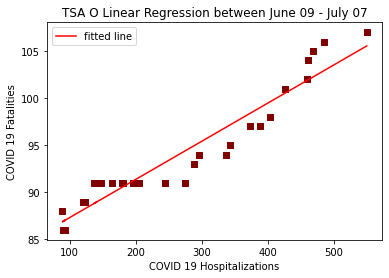

slope: 0.040520    intercept: 83.260299
R-squared: 0.915219 
Pearson corrrelation: 0.956671    Spearman correlation: 0.977078
Pearson p-value: 5.40E-16
Spearman p-value: 1.13E-19
This is a strongly positive relationship
A correlation p-value of 1.1252379273794165e-19 indicates that the correlation between our samples is significant and different from zero.

Linear Regression p-value: 5.40E-16
A linear regression p-value this low strongly suggests that hospitalizations has a statistically significant affect on the value of fatalities


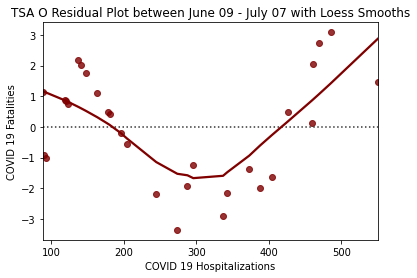

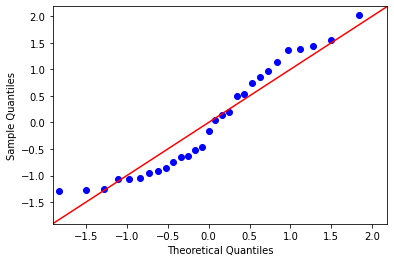

qq-plot of TSA O (June 09 - July 07) for Hospitalizations


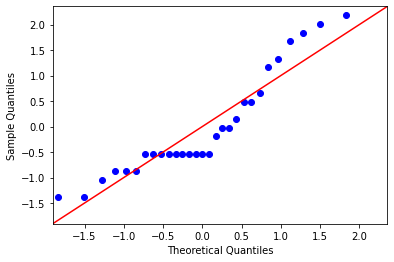

qq-plot of TSA O (June 09 - July 07) for Fatalities

levene p-value: 2.07E-12
There is strong evidence that the two samples do not have equal variances. This means it is strongly suggested to use a non-parametric analysis model to prevent commiting a Type 1 error! We therefore conduct Welch's t-test which does not assume equal population variance.

t-test p_value: 3.55E-7
There is significant evidence that the observed relationship between hospitalizations and fatalities is not due to random chance.


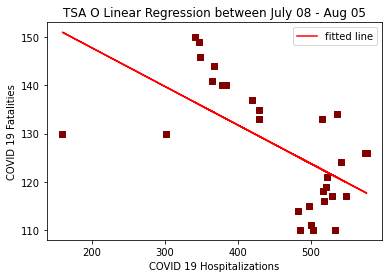

slope: -0.080161    intercept: 163.874459
R-squared: 0.387192 
Pearson corrrelation: -0.622248    Spearman correlation: -0.571764
Pearson p-value: 3.13E-4
Spearman p-value: 1.19E-3
This is a weakly negative relationship
A correlation p-value of 0.0003132562299455815 indicates that the correlation between our samples is significant and different from zero.

Linear Regression p-value: 3.13E-4
A linear regression p-value this low strongly suggests that hospitalizations has a statistically significant affect on the value of fatalities


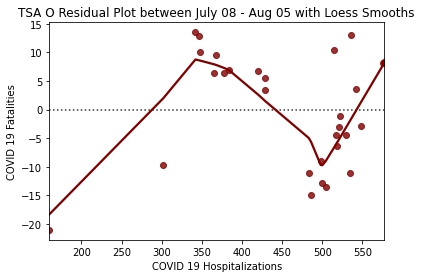

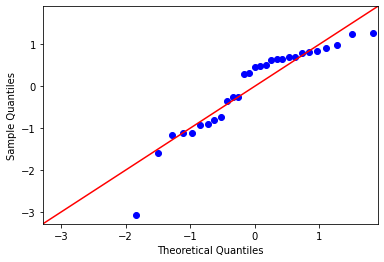

qq-plot of TSA O (July 08 - Aug 05) for Hospitalizations


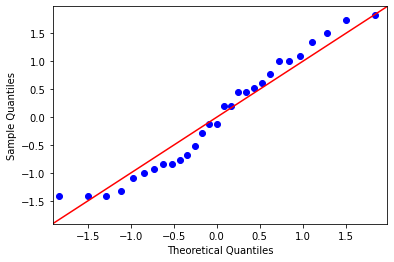

qq-plot of TSA O (July 08 - Aug 05) for Fatalities

levene p-value: 1.95E-5
There is strong evidence that the two samples do not have equal variances. This means it is strongly suggested to use a non-parametric analysis model to prevent commiting a Type 1 error! We therefore conduct Welch's t-test which does not assume equal population variance.

t-test p_value: 3.65E-17
There is significant evidence that the observed relationship between hospitalizations and fatalities is not due to random chance.


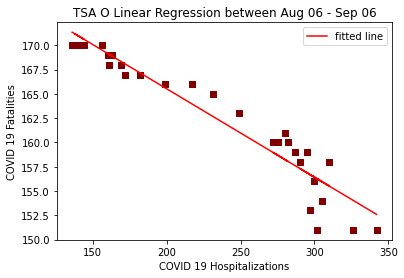

slope: -0.091021    intercept: 183.730339
R-squared: 0.913437 
Pearson corrrelation: -0.955739    Spearman correlation: -0.985282
Pearson p-value: 1.73E-17
Spearman p-value: 1.42E-24
This is a strongly negative relationship
A correlation p-value of 1.4155509896338445e-24 indicates that the correlation between our samples is significant and different from zero.

Linear Regression p-value: 1.73E-17
A linear regression p-value this low strongly suggests that hospitalizations has a statistically significant affect on the value of fatalities


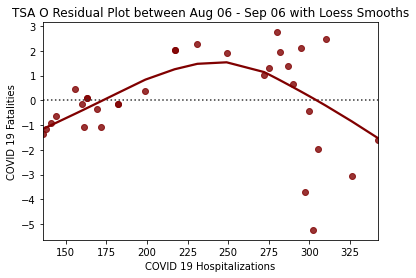

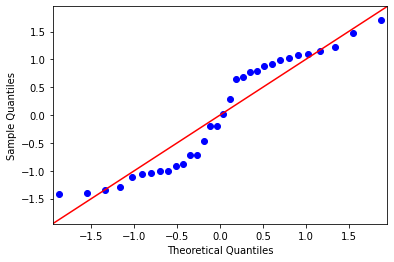

qq-plot of TSA O (Aug 06 - Sep 06) for Hospitalizations


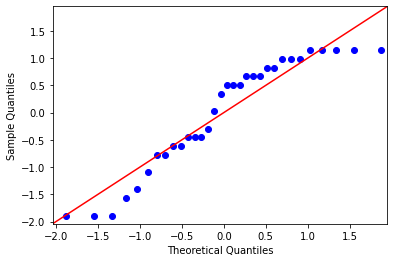

qq-plot of TSA O (Aug 06 - Sep 06) for Fatalities

levene p-value: 2.13E-17
There is strong evidence that the two samples do not have equal variances. This means it is strongly suggested to use a non-parametric analysis model to prevent commiting a Type 1 error! We therefore conduct Welch's t-test which does not assume equal population variance.

t-test p_value: 3.49E-6
There is significant evidence that the observed relationship between hospitalizations and fatalities is not due to random chance.


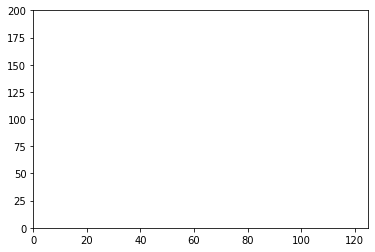

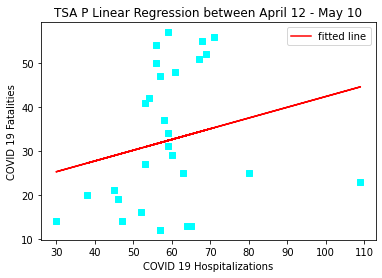

slope: 0.244860    intercept: 17.881230
R-squared: 0.045684 
Pearson corrrelation: 0.213739    Spearman correlation: 0.335061
Pearson p-value: 2.66E-1
Spearman p-value: 7.56E-2
This is a weakly positive relationship
Neither correlation p-value indicates that the correlation between our samples is significantly different from zero.

Linear Regression p-value: 2.66E-1
There is not enough evidence to conclude if hospitalizations has a statistically significant affect on the value of fatalities.


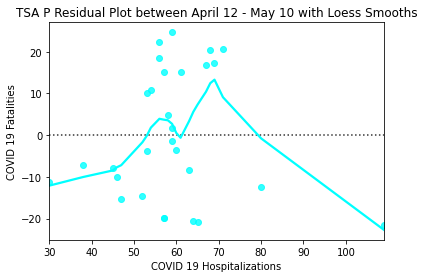

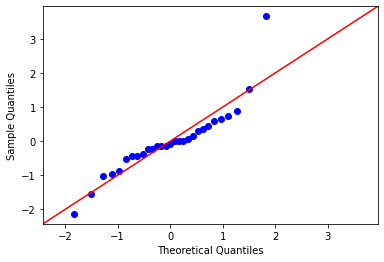

qq-plot of TSA P (April 12 - May 10) for Hospitalizations


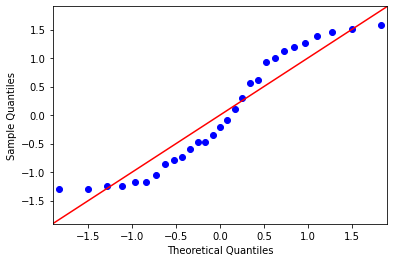

qq-plot of TSA P (April 12 - May 10) for Fatalities

levene p-value: 4.53E-2
There is strong evidence that the two samples do not have equal variances. This means it is strongly suggested to use a non-parametric analysis model to prevent commiting a Type 1 error! We therefore conduct Welch's t-test which does not assume equal population variance.

t-test p_value: 7.23E-9
There is significant evidence that the observed relationship between hospitalizations and fatalities is not due to random chance.


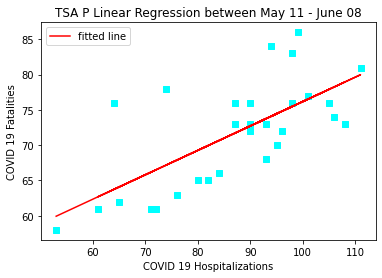

slope: 0.345602    intercept: 41.622256
R-squared: 0.473776 
Pearson corrrelation: 0.688314    Spearman correlation: 0.649008
Pearson p-value: 3.67E-5
Spearman p-value: 1.40E-4
This is a weakly positive relationship
A correlation p-value of 3.6719361261392754e-05 indicates that the correlation between our samples is significant and different from zero.

Linear Regression p-value: 3.67E-5
A linear regression p-value this low strongly suggests that hospitalizations has a statistically significant affect on the value of fatalities


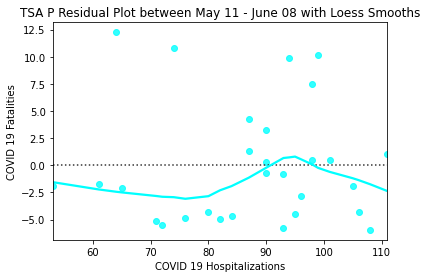

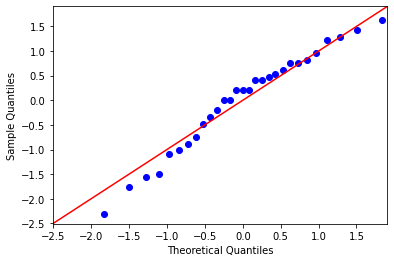

qq-plot of TSA P (May 11 - June 08) for Hospitalizations


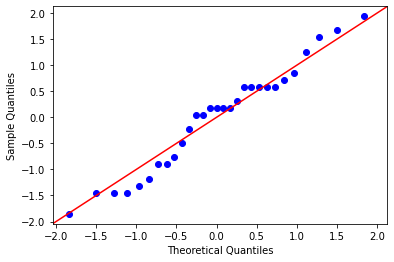

qq-plot of TSA P (May 11 - June 08) for Fatalities

levene p-value: 4.45E-3
There is strong evidence that the two samples do not have equal variances. This means it is strongly suggested to use a non-parametric analysis model to prevent commiting a Type 1 error! We therefore conduct Welch's t-test which does not assume equal population variance.

t-test p_value: 1.42E-5
There is significant evidence that the observed relationship between hospitalizations and fatalities is not due to random chance.


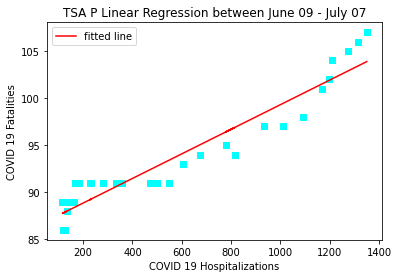

slope: 0.013067    intercept: 86.240895
R-squared: 0.908396 
Pearson corrrelation: 0.953098    Spearman correlation: 0.973303
Pearson p-value: 1.54E-15
Spearman p-value: 8.62E-19
This is a strongly positive relationship
A correlation p-value of 8.620585998761394e-19 indicates that the correlation between our samples is significant and different from zero.

Linear Regression p-value: 1.54E-15
A linear regression p-value this low strongly suggests that hospitalizations has a statistically significant affect on the value of fatalities


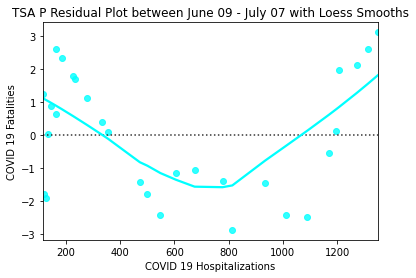

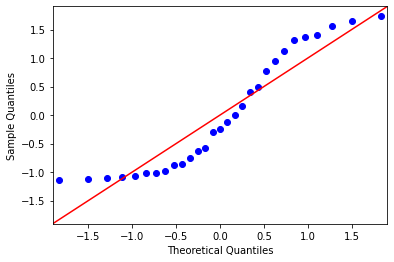

qq-plot of TSA P (June 09 - July 07) for Hospitalizations


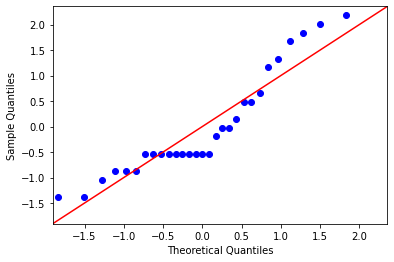

qq-plot of TSA P (June 09 - July 07) for Fatalities

levene p-value: 1.60E-11
There is strong evidence that the two samples do not have equal variances. This means it is strongly suggested to use a non-parametric analysis model to prevent commiting a Type 1 error! We therefore conduct Welch's t-test which does not assume equal population variance.

t-test p_value: 8.94E-7
There is significant evidence that the observed relationship between hospitalizations and fatalities is not due to random chance.


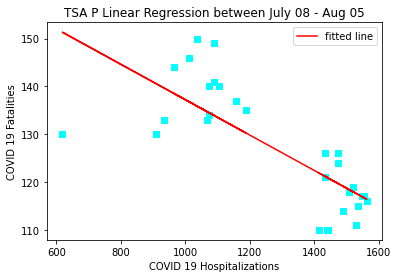

slope: -0.036995    intercept: 174.228753
R-squared: 0.578369 
Pearson corrrelation: -0.760506    Spearman correlation: -0.715872
Pearson p-value: 1.69E-6
Spearman p-value: 1.27E-5
This is a weakly negative relationship
A correlation p-value of 1.6880481649179552e-06 indicates that the correlation between our samples is significant and different from zero.

Linear Regression p-value: 1.69E-6
A linear regression p-value this low strongly suggests that hospitalizations has a statistically significant affect on the value of fatalities


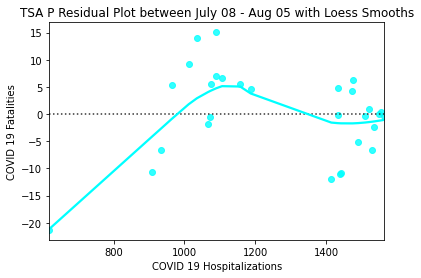

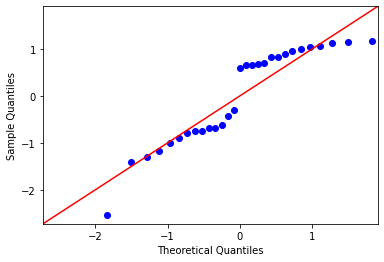

qq-plot of TSA P (July 08 - Aug 05) for Hospitalizations


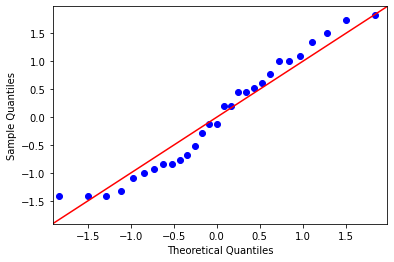

qq-plot of TSA P (July 08 - Aug 05) for Fatalities

levene p-value: 8.03E-8
There is strong evidence that the two samples do not have equal variances. This means it is strongly suggested to use a non-parametric analysis model to prevent commiting a Type 1 error! We therefore conduct Welch's t-test which does not assume equal population variance.

t-test p_value: 4.32E-20
There is significant evidence that the observed relationship between hospitalizations and fatalities is not due to random chance.


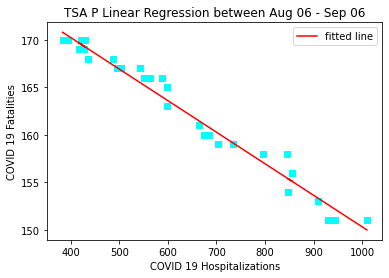

slope: -0.033202    intercept: 183.512217
R-squared: 0.972176 
Pearson corrrelation: -0.985990    Spearman correlation: -0.989702
Pearson p-value: 6.79E-25
Spearman p-value: 6.87E-27
This is a strongly negative relationship
A correlation p-value of 6.872991079395735e-27 indicates that the correlation between our samples is significant and different from zero.

Linear Regression p-value: 6.79E-25
A linear regression p-value this low strongly suggests that hospitalizations has a statistically significant affect on the value of fatalities


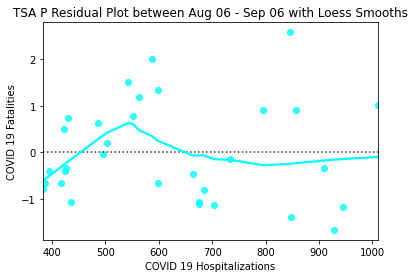

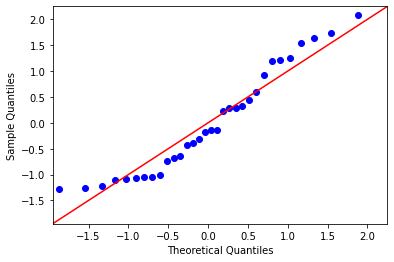

qq-plot of TSA P (Aug 06 - Sep 06) for Hospitalizations


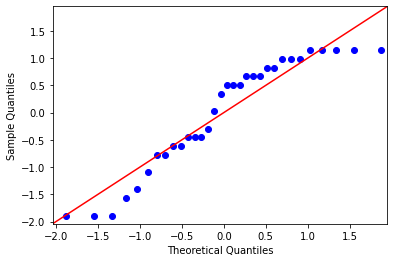

qq-plot of TSA P (Aug 06 - Sep 06) for Fatalities

levene p-value: 2.89E-11
There is strong evidence that the two samples do not have equal variances. This means it is strongly suggested to use a non-parametric analysis model to prevent commiting a Type 1 error! We therefore conduct Welch's t-test which does not assume equal population variance.

t-test p_value: 9.45E-15
There is significant evidence that the observed relationship between hospitalizations and fatalities is not due to random chance.


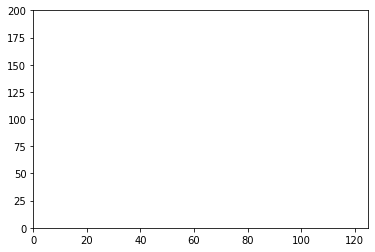

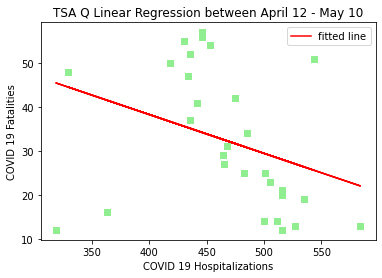

slope: -0.088460    intercept: 73.667919
R-squared: 0.112576 
Pearson corrrelation: -0.335523    Spearman correlation: -0.470037
Pearson p-value: 7.52E-2
Spearman p-value: 1.01E-2
This is a weakly negative relationship
A correlation p-value of 0.010085267178503115 indicates that the correlation between our samples is significant and different from zero.

Linear Regression p-value: 7.52E-2
There is not enough evidence to conclude if hospitalizations has a statistically significant affect on the value of fatalities.


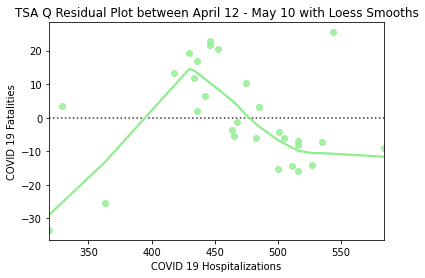

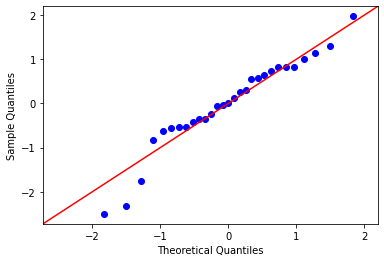

qq-plot of TSA Q (April 12 - May 10) for Hospitalizations


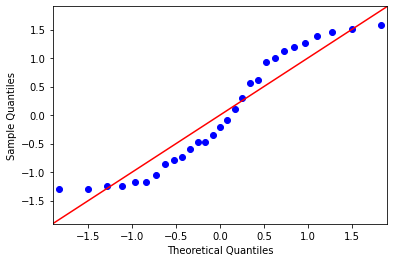

qq-plot of TSA Q (April 12 - May 10) for Fatalities

levene p-value: 6.69E-5
There is strong evidence that the two samples do not have equal variances. This means it is strongly suggested to use a non-parametric analysis model to prevent commiting a Type 1 error! We therefore conduct Welch's t-test which does not assume equal population variance.

t-test p_value: 5.67E-28
There is significant evidence that the observed relationship between hospitalizations and fatalities is not due to random chance.


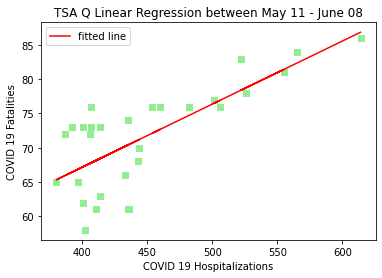

slope: 0.092014    intercept: 30.346726
R-squared: 0.545197 
Pearson corrrelation: 0.738374    Spearman correlation: 0.680575
Pearson p-value: 4.82E-6
Spearman p-value: 4.85E-5
This is a weakly positive relationship
A correlation p-value of 4.817570656929633e-06 indicates that the correlation between our samples is significant and different from zero.

Linear Regression p-value: 4.82E-6
A linear regression p-value this low strongly suggests that hospitalizations has a statistically significant affect on the value of fatalities


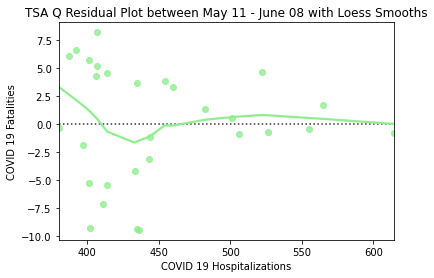

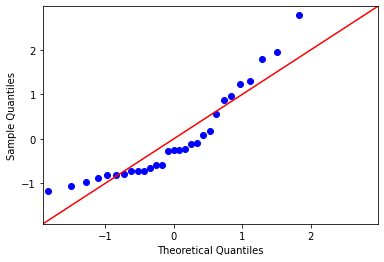

qq-plot of TSA Q (May 11 - June 08) for Hospitalizations


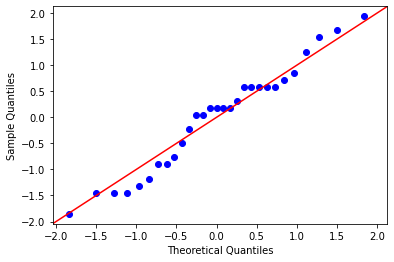

qq-plot of TSA Q (May 11 - June 08) for Fatalities

levene p-value: 9.50E-6
There is strong evidence that the two samples do not have equal variances. This means it is strongly suggested to use a non-parametric analysis model to prevent commiting a Type 1 error! We therefore conduct Welch's t-test which does not assume equal population variance.

t-test p_value: 1.22E-24
There is significant evidence that the observed relationship between hospitalizations and fatalities is not due to random chance.


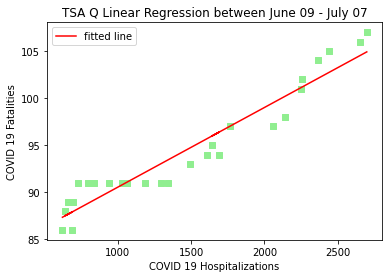

slope: 0.008459    intercept: 82.084121
R-squared: 0.923910 
Pearson corrrelation: 0.961203    Spearman correlation: 0.973555
Pearson p-value: 1.25E-16
Spearman p-value: 7.60E-19
This is a strongly positive relationship
A correlation p-value of 7.597019331284106e-19 indicates that the correlation between our samples is significant and different from zero.

Linear Regression p-value: 1.25E-16
A linear regression p-value this low strongly suggests that hospitalizations has a statistically significant affect on the value of fatalities


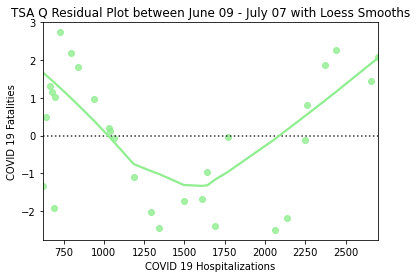

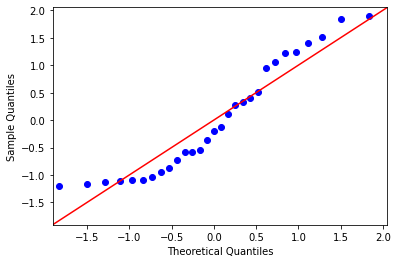

qq-plot of TSA Q (June 09 - July 07) for Hospitalizations


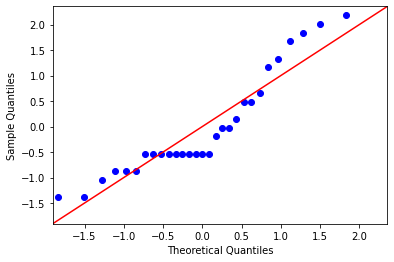

qq-plot of TSA Q (June 09 - July 07) for Fatalities

levene p-value: 1.94E-11
There is strong evidence that the two samples do not have equal variances. This means it is strongly suggested to use a non-parametric analysis model to prevent commiting a Type 1 error! We therefore conduct Welch's t-test which does not assume equal population variance.

t-test p_value: 3.28E-11
There is significant evidence that the observed relationship between hospitalizations and fatalities is not due to random chance.


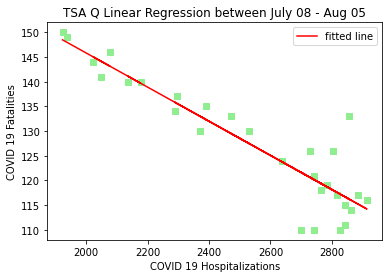

slope: -0.034540    intercept: 214.882948
R-squared: 0.825250 
Pearson corrrelation: -0.908433    Spearman correlation: -0.834875
Pearson p-value: 9.85E-12
Spearman p-value: 1.79E-8
This is a strongly negative relationship
A correlation p-value of 9.850187625527599e-12 indicates that the correlation between our samples is significant and different from zero.

Linear Regression p-value: 9.85E-12
A linear regression p-value this low strongly suggests that hospitalizations has a statistically significant affect on the value of fatalities


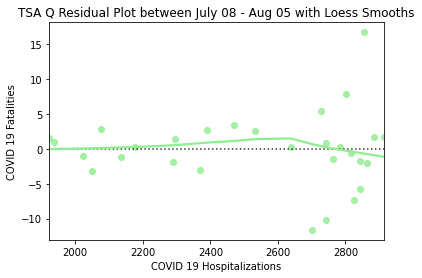

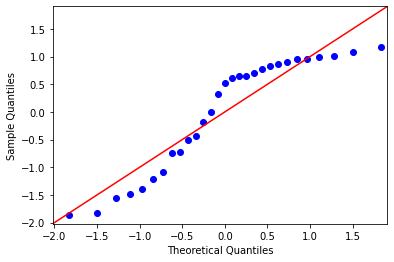

qq-plot of TSA Q (July 08 - Aug 05) for Hospitalizations


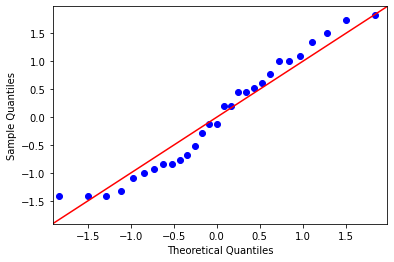

qq-plot of TSA Q (July 08 - Aug 05) for Fatalities

levene p-value: 1.64E-7
There is strong evidence that the two samples do not have equal variances. This means it is strongly suggested to use a non-parametric analysis model to prevent commiting a Type 1 error! We therefore conduct Welch's t-test which does not assume equal population variance.

t-test p_value: 5.13E-26
There is significant evidence that the observed relationship between hospitalizations and fatalities is not due to random chance.


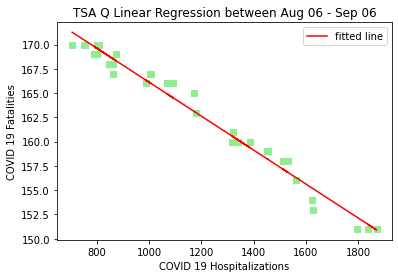

slope: -0.017455    intercept: 183.569070
R-squared: 0.977450 
Pearson corrrelation: -0.988661    Spearman correlation: -0.982619
Pearson p-value: 2.90E-26
Spearman p-value: 1.69E-23
This is a strongly negative relationship
A correlation p-value of 2.895220301753368e-26 indicates that the correlation between our samples is significant and different from zero.

Linear Regression p-value: 2.90E-26
A linear regression p-value this low strongly suggests that hospitalizations has a statistically significant affect on the value of fatalities


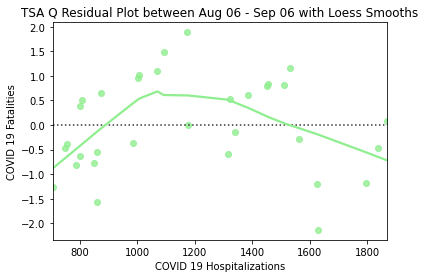

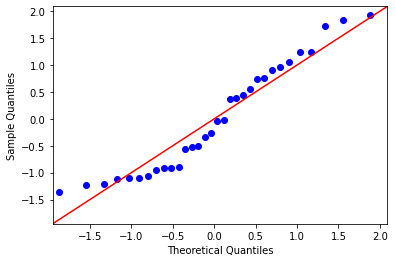

qq-plot of TSA Q (Aug 06 - Sep 06) for Hospitalizations


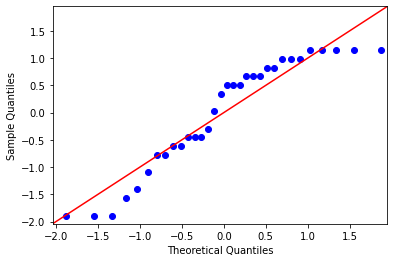

qq-plot of TSA Q (Aug 06 - Sep 06) for Fatalities

levene p-value: 6.90E-14
There is strong evidence that the two samples do not have equal variances. This means it is strongly suggested to use a non-parametric analysis model to prevent commiting a Type 1 error! We therefore conduct Welch's t-test which does not assume equal population variance.

t-test p_value: 1.37E-16
There is significant evidence that the observed relationship between hospitalizations and fatalities is not due to random chance.


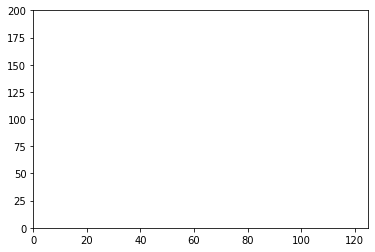

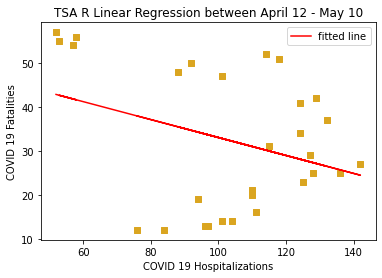

slope: -0.204332    intercept: 53.468572
R-squared: 0.107593 
Pearson corrrelation: -0.328014    Spearman correlation: -0.115740
Pearson p-value: 8.24E-2
Spearman p-value: 5.50E-1
This is a weakly negative relationship
Neither correlation p-value indicates that the correlation between our samples is significantly different from zero.

Linear Regression p-value: 8.24E-2
There is not enough evidence to conclude if hospitalizations has a statistically significant affect on the value of fatalities.


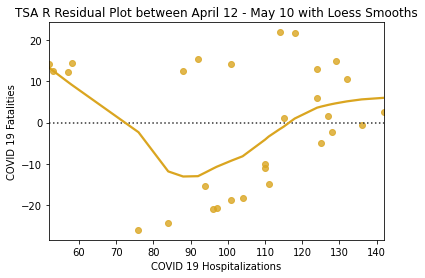

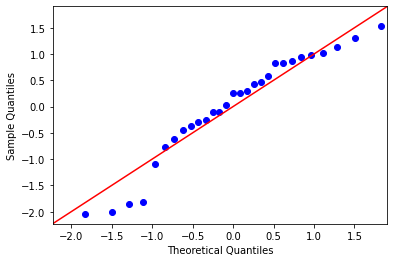

qq-plot of TSA R (April 12 - May 10) for Hospitalizations


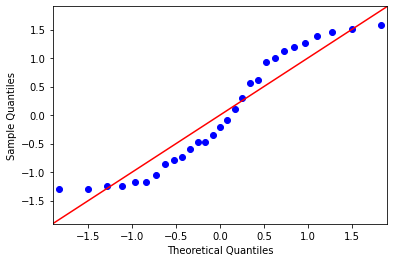

qq-plot of TSA R (April 12 - May 10) for Fatalities

levene p-value: 7.52E-2
There is not enough evidence to reject the assumption of equal variance between the samples. This means there is not enough evidence to prevent using a parametric analysis model. We therefore conduct a two-sided t-test, which assumes equal population variance.

t-test p_value: 3.53E-18
There is significant evidence that the observed relationship between hospitalizations and fatalities is not due to random chance.


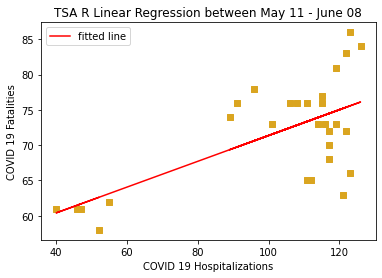

slope: 0.182624    intercept: 53.106061
R-squared: 0.419545 
Pearson corrrelation: 0.647723    Spearman correlation: 0.438269
Pearson p-value: 1.46E-4
Spearman p-value: 1.74E-2
This is a weakly positive relationship
A correlation p-value of 0.00014551658797860848 indicates that the correlation between our samples is significant and different from zero.

Linear Regression p-value: 1.46E-4
A linear regression p-value this low strongly suggests that hospitalizations has a statistically significant affect on the value of fatalities


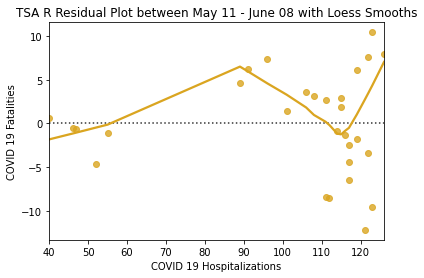

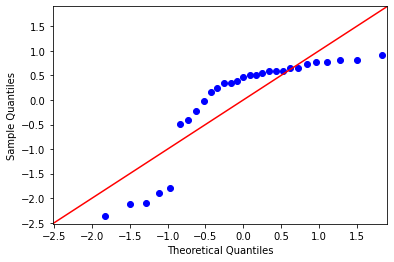

qq-plot of TSA R (May 11 - June 08) for Hospitalizations


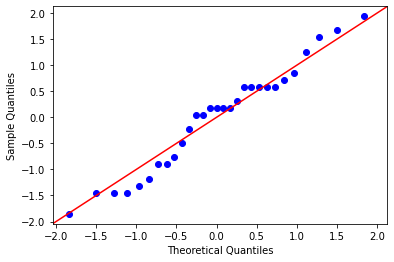

qq-plot of TSA R (May 11 - June 08) for Fatalities

levene p-value: 1.18E-2
There is strong evidence that the two samples do not have equal variances. This means it is strongly suggested to use a non-parametric analysis model to prevent commiting a Type 1 error! We therefore conduct Welch's t-test which does not assume equal population variance.

t-test p_value: 1.62E-6
There is significant evidence that the observed relationship between hospitalizations and fatalities is not due to random chance.


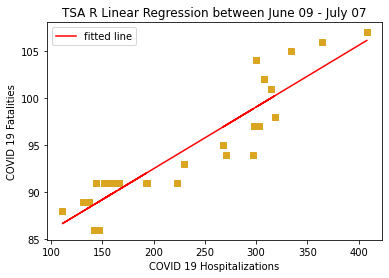

slope: 0.065524    intercept: 79.397362
R-squared: 0.849431 
Pearson corrrelation: 0.921646    Spearman correlation: 0.952664
Pearson p-value: 1.30E-12
Spearman p-value: 1.74E-15
This is a strongly positive relationship
A correlation p-value of 1.7391883922940299e-15 indicates that the correlation between our samples is significant and different from zero.

Linear Regression p-value: 1.30E-12
A linear regression p-value this low strongly suggests that hospitalizations has a statistically significant affect on the value of fatalities


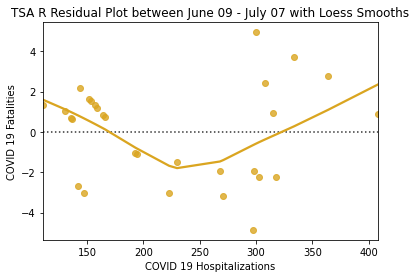

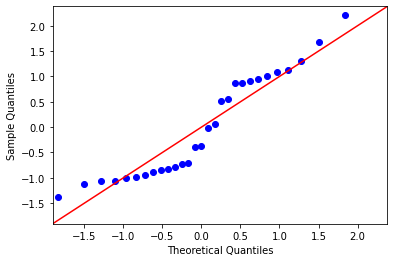

qq-plot of TSA R (June 09 - July 07) for Hospitalizations


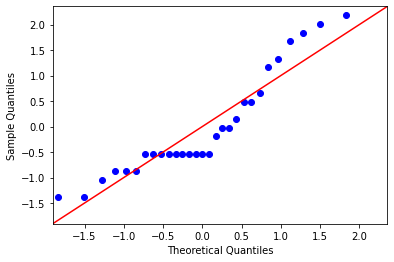

qq-plot of TSA R (June 09 - July 07) for Fatalities

levene p-value: 5.65E-10
There is strong evidence that the two samples do not have equal variances. This means it is strongly suggested to use a non-parametric analysis model to prevent commiting a Type 1 error! We therefore conduct Welch's t-test which does not assume equal population variance.

t-test p_value: 4.44E-9
There is significant evidence that the observed relationship between hospitalizations and fatalities is not due to random chance.


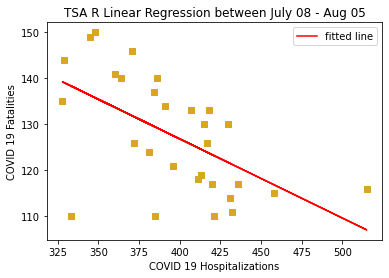

slope: -0.172127    intercept: 195.687922
R-squared: 0.323548 
Pearson corrrelation: -0.568813    Spearman correlation: -0.617433
Pearson p-value: 1.28E-3
Spearman p-value: 3.59E-4
This is a weakly negative relationship
A correlation p-value of 0.0003594230523206599 indicates that the correlation between our samples is significant and different from zero.

Linear Regression p-value: 1.28E-3
A linear regression p-value this low strongly suggests that hospitalizations has a statistically significant affect on the value of fatalities


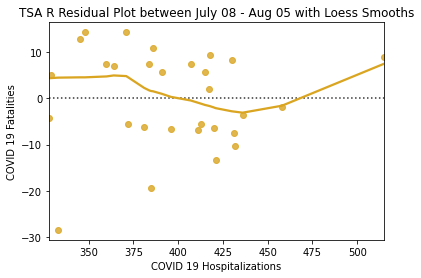

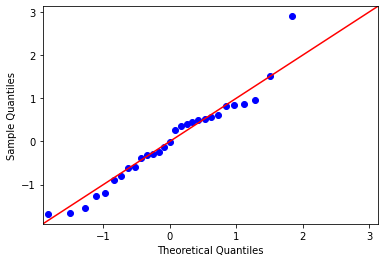

qq-plot of TSA R (July 08 - Aug 05) for Hospitalizations


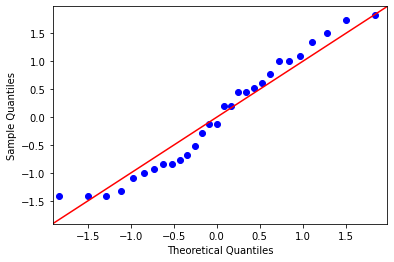

qq-plot of TSA R (July 08 - Aug 05) for Fatalities

levene p-value: 2.95E-5
There is strong evidence that the two samples do not have equal variances. This means it is strongly suggested to use a non-parametric analysis model to prevent commiting a Type 1 error! We therefore conduct Welch's t-test which does not assume equal population variance.

t-test p_value: 5.00E-27
There is significant evidence that the observed relationship between hospitalizations and fatalities is not due to random chance.


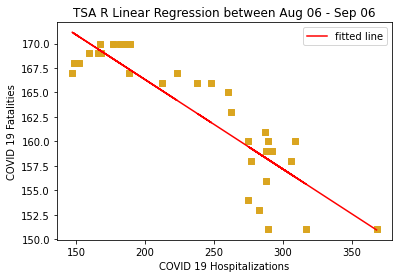

slope: -0.091453    intercept: 184.603897
R-squared: 0.774837 
Pearson corrrelation: -0.880248    Spearman correlation: -0.857451
Pearson p-value: 3.15E-11
Spearman p-value: 3.67E-10
This is a strongly negative relationship
A correlation p-value of 3.153125602938047e-11 indicates that the correlation between our samples is significant and different from zero.

Linear Regression p-value: 3.15E-11
A linear regression p-value this low strongly suggests that hospitalizations has a statistically significant affect on the value of fatalities


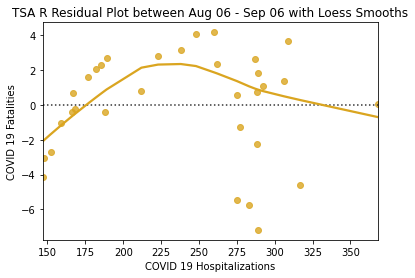

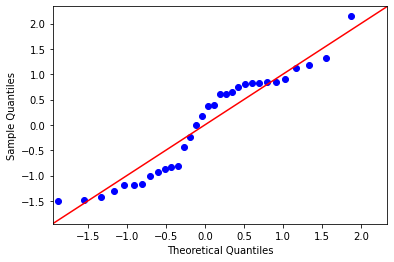

qq-plot of TSA R (Aug 06 - Sep 06) for Hospitalizations


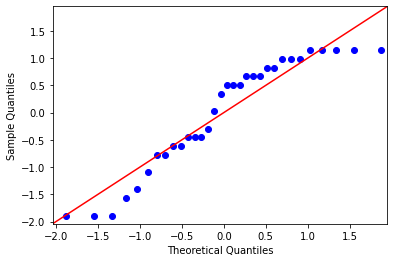

qq-plot of TSA R (Aug 06 - Sep 06) for Fatalities

levene p-value: 1.02E-11
There is strong evidence that the two samples do not have equal variances. This means it is strongly suggested to use a non-parametric analysis model to prevent commiting a Type 1 error! We therefore conduct Welch's t-test which does not assume equal population variance.

t-test p_value: 8.82E-8
There is significant evidence that the observed relationship between hospitalizations and fatalities is not due to random chance.


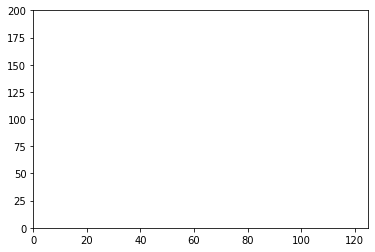

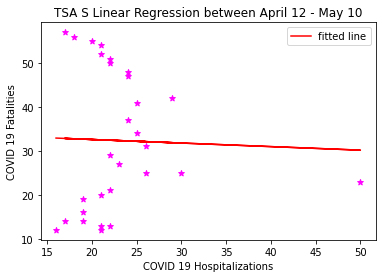

slope: -0.080913    intercept: 34.203039
R-squared: 0.000993 
Pearson corrrelation: -0.031513    Spearman correlation: 0.131682
Pearson p-value: 8.71E-1
Spearman p-value: 4.96E-1
This is a weakly negative relationship
Neither correlation p-value indicates that the correlation between our samples is significantly different from zero.

Linear Regression p-value: 8.71E-1
There is not enough evidence to conclude if hospitalizations has a statistically significant affect on the value of fatalities.


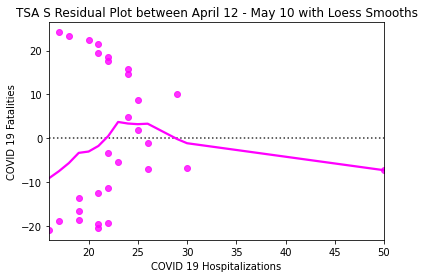

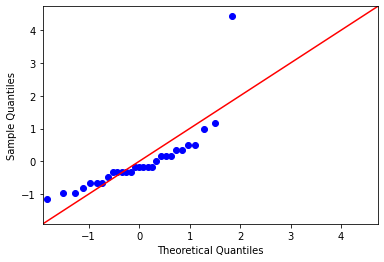

qq-plot of TSA S (April 12 - May 10) for Hospitalizations


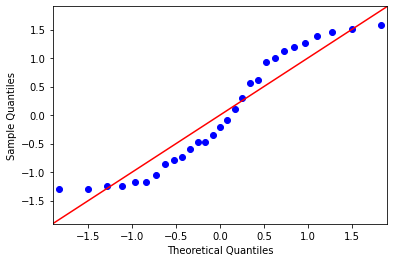

qq-plot of TSA S (April 12 - May 10) for Fatalities

levene p-value: 3.12E-7
There is strong evidence that the two samples do not have equal variances. This means it is strongly suggested to use a non-parametric analysis model to prevent commiting a Type 1 error! We therefore conduct Welch's t-test which does not assume equal population variance.

t-test p_value: 5.34E-3
There is significant evidence that the observed relationship between hospitalizations and fatalities is not due to random chance.


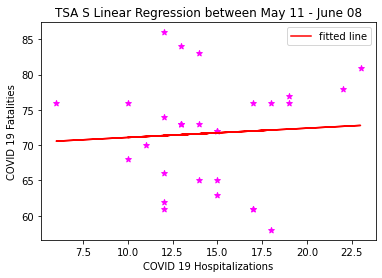

slope: 0.130933    intercept: 69.788871
R-squared: 0.004109 
Pearson corrrelation: 0.064103    Spearman correlation: 0.081663
Pearson p-value: 7.41E-1
Spearman p-value: 6.74E-1
This is a weakly positive relationship
Neither correlation p-value indicates that the correlation between our samples is significantly different from zero.

Linear Regression p-value: 7.41E-1
There is not enough evidence to conclude if hospitalizations has a statistically significant affect on the value of fatalities.


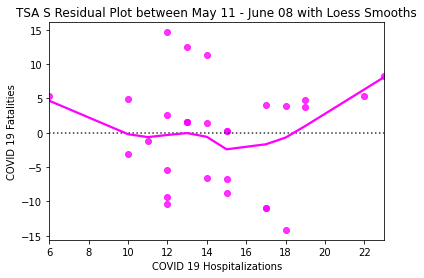

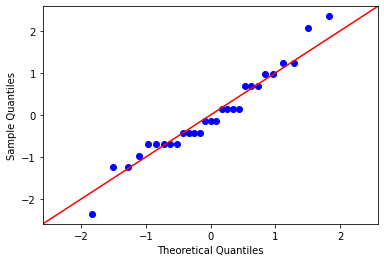

qq-plot of TSA S (May 11 - June 08) for Hospitalizations


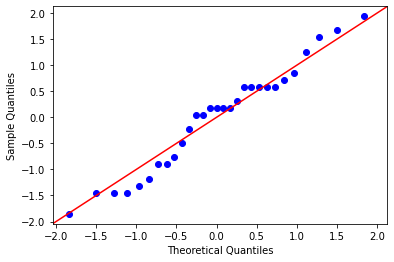

qq-plot of TSA S (May 11 - June 08) for Fatalities

levene p-value: 2.15E-3
There is strong evidence that the two samples do not have equal variances. This means it is strongly suggested to use a non-parametric analysis model to prevent commiting a Type 1 error! We therefore conduct Welch's t-test which does not assume equal population variance.

t-test p_value: 7.49E-33
There is significant evidence that the observed relationship between hospitalizations and fatalities is not due to random chance.


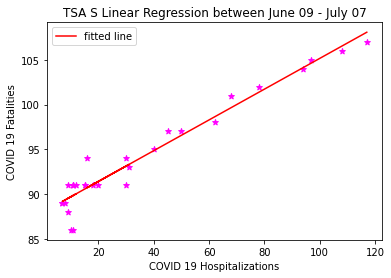

slope: 0.171766    intercept: 87.978044
R-squared: 0.939888 
Pearson corrrelation: 0.969478    Spearman correlation: 0.931493
Pearson p-value: 5.14E-18
Spearman p-value: 2.25E-13
This is a strongly positive relationship
A correlation p-value of 5.137003275618106e-18 indicates that the correlation between our samples is significant and different from zero.

Linear Regression p-value: 5.14E-18
A linear regression p-value this low strongly suggests that hospitalizations has a statistically significant affect on the value of fatalities


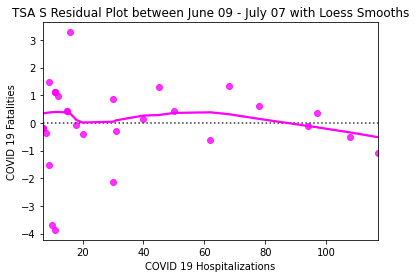

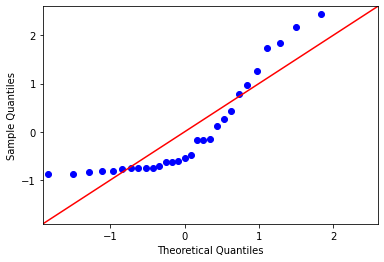

qq-plot of TSA S (June 09 - July 07) for Hospitalizations


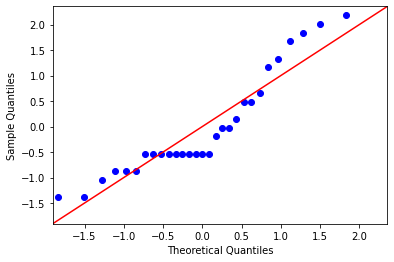

qq-plot of TSA S (June 09 - July 07) for Fatalities

levene p-value: 4.88E-4
There is strong evidence that the two samples do not have equal variances. This means it is strongly suggested to use a non-parametric analysis model to prevent commiting a Type 1 error! We therefore conduct Welch's t-test which does not assume equal population variance.

t-test p_value: 4.14E-10
There is significant evidence that the observed relationship between hospitalizations and fatalities is not due to random chance.


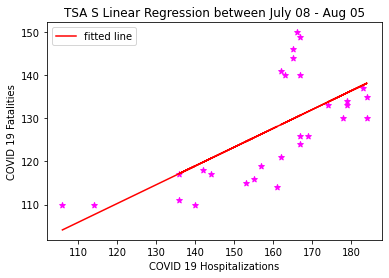

slope: 0.436557    intercept: 57.824987
R-squared: 0.452233 
Pearson corrrelation: 0.672483    Spearman correlation: 0.672802
Pearson p-value: 6.44E-5
Spearman p-value: 6.37E-5
This is a weakly positive relationship
A correlation p-value of 6.370653928867645e-05 indicates that the correlation between our samples is significant and different from zero.

Linear Regression p-value: 6.44E-5
A linear regression p-value this low strongly suggests that hospitalizations has a statistically significant affect on the value of fatalities


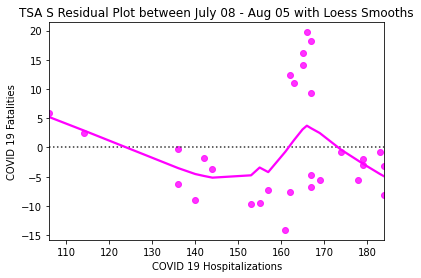

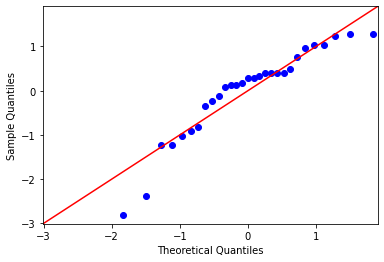

qq-plot of TSA S (July 08 - Aug 05) for Hospitalizations


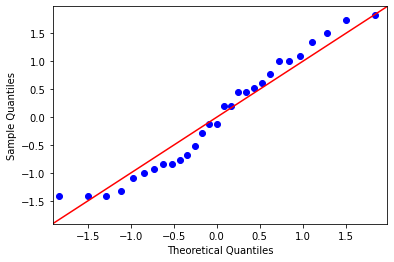

qq-plot of TSA S (July 08 - Aug 05) for Fatalities

levene p-value: 3.30E-1
There is not enough evidence to reject the assumption of equal variance between the samples. This means there is not enough evidence to prevent using a parametric analysis model. We therefore conduct a two-sided t-test, which assumes equal population variance.

t-test p_value: 6.09E-10
There is significant evidence that the observed relationship between hospitalizations and fatalities is not due to random chance.


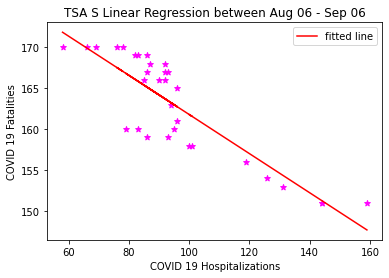

slope: -0.238811    intercept: 185.687523
R-squared: 0.748953 
Pearson corrrelation: -0.865421    Spearman correlation: -0.847475
Pearson p-value: 1.64E-10
Spearman p-value: 9.45E-10
This is a strongly negative relationship
A correlation p-value of 1.6384075046536148e-10 indicates that the correlation between our samples is significant and different from zero.

Linear Regression p-value: 1.64E-10
A linear regression p-value this low strongly suggests that hospitalizations has a statistically significant affect on the value of fatalities


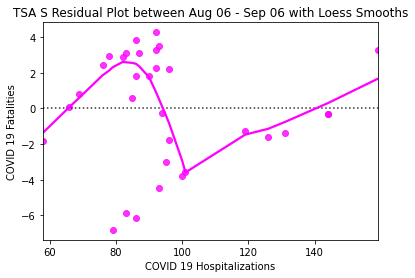

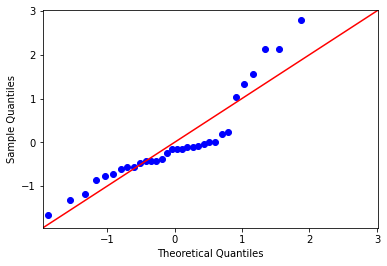

qq-plot of TSA S (Aug 06 - Sep 06) for Hospitalizations


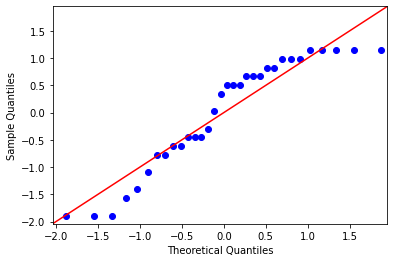

qq-plot of TSA S (Aug 06 - Sep 06) for Fatalities

levene p-value: 2.82E-3
There is strong evidence that the two samples do not have equal variances. This means it is strongly suggested to use a non-parametric analysis model to prevent commiting a Type 1 error! We therefore conduct Welch's t-test which does not assume equal population variance.

t-test p_value: 9.29E-18
There is significant evidence that the observed relationship between hospitalizations and fatalities is not due to random chance.


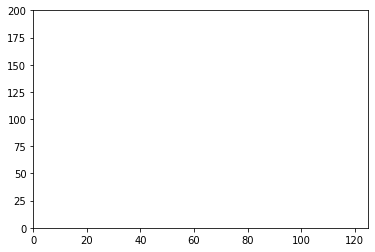

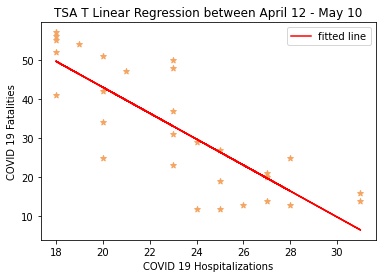

slope: -3.309715    intercept: 109.153048
R-squared: 0.665205 
Pearson corrrelation: -0.815601    Spearman correlation: -0.826960
Pearson p-value: 7.05E-8
Spearman p-value: 3.21E-8
This is a strongly negative relationship
A correlation p-value of 3.2090278858153485e-08 indicates that the correlation between our samples is significant and different from zero.

Linear Regression p-value: 7.05E-8
A linear regression p-value this low strongly suggests that hospitalizations has a statistically significant affect on the value of fatalities


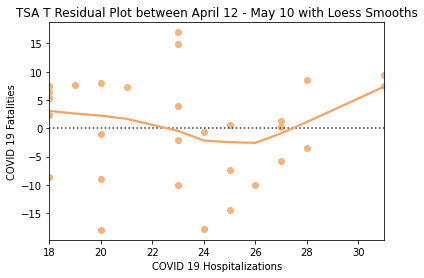

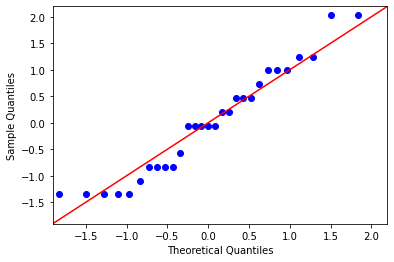

qq-plot of TSA T (April 12 - May 10) for Hospitalizations


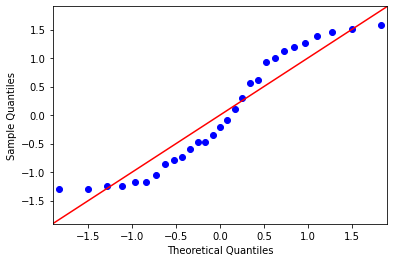

qq-plot of TSA T (April 12 - May 10) for Fatalities

levene p-value: 6.70E-9
There is strong evidence that the two samples do not have equal variances. This means it is strongly suggested to use a non-parametric analysis model to prevent commiting a Type 1 error! We therefore conduct Welch's t-test which does not assume equal population variance.

t-test p_value: 5.13E-3
There is significant evidence that the observed relationship between hospitalizations and fatalities is not due to random chance.


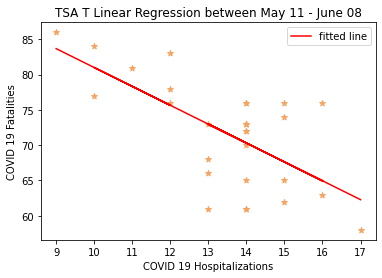

slope: -2.673787    intercept: 107.739681
R-squared: 0.430344 
Pearson corrrelation: -0.656006    Spearman correlation: -0.555698
Pearson p-value: 1.12E-4
Spearman p-value: 1.75E-3
This is a weakly negative relationship
A correlation p-value of 0.00011169582325204922 indicates that the correlation between our samples is significant and different from zero.

Linear Regression p-value: 1.12E-4
A linear regression p-value this low strongly suggests that hospitalizations has a statistically significant affect on the value of fatalities


/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/smoothers_lowess.py:165: RuntimeWarning: invalid value encountered in greater_equal
  res = _lowess(y, x, frac=frac, it=it, delta=delta)


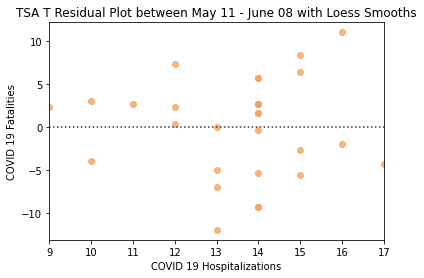

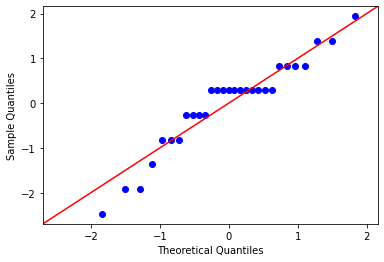

qq-plot of TSA T (May 11 - June 08) for Hospitalizations


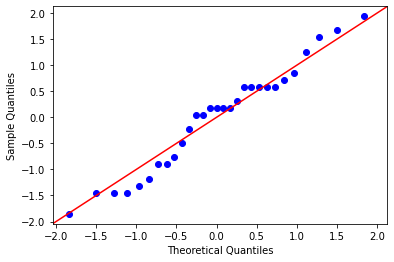

qq-plot of TSA T (May 11 - June 08) for Fatalities

levene p-value: 3.70E-6
There is strong evidence that the two samples do not have equal variances. This means it is strongly suggested to use a non-parametric analysis model to prevent commiting a Type 1 error! We therefore conduct Welch's t-test which does not assume equal population variance.

t-test p_value: 1.20E-28
There is significant evidence that the observed relationship between hospitalizations and fatalities is not due to random chance.


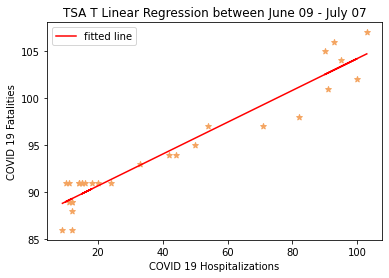

slope: 0.168918    intercept: 87.305508
R-squared: 0.919233 
Pearson corrrelation: 0.958767    Spearman correlation: 0.931504
Pearson p-value: 2.80E-16
Spearman p-value: 2.25E-13
This is a strongly positive relationship
A correlation p-value of 2.797996200264105e-16 indicates that the correlation between our samples is significant and different from zero.

Linear Regression p-value: 2.80E-16
A linear regression p-value this low strongly suggests that hospitalizations has a statistically significant affect on the value of fatalities


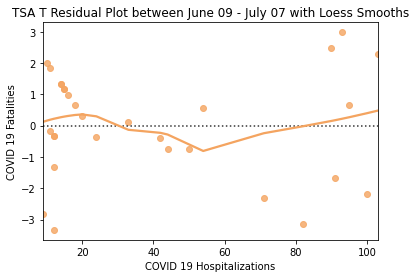

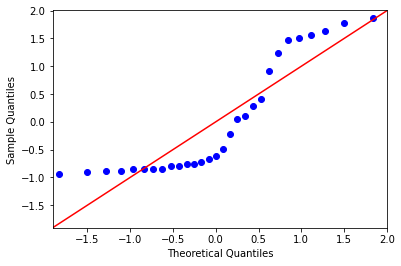

qq-plot of TSA T (June 09 - July 07) for Hospitalizations


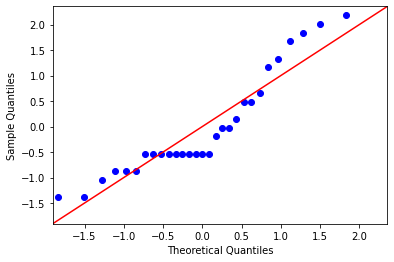

qq-plot of TSA T (June 09 - July 07) for Fatalities

levene p-value: 9.30E-5
There is strong evidence that the two samples do not have equal variances. This means it is strongly suggested to use a non-parametric analysis model to prevent commiting a Type 1 error! We therefore conduct Welch's t-test which does not assume equal population variance.

t-test p_value: 2.76E-9
There is significant evidence that the observed relationship between hospitalizations and fatalities is not due to random chance.


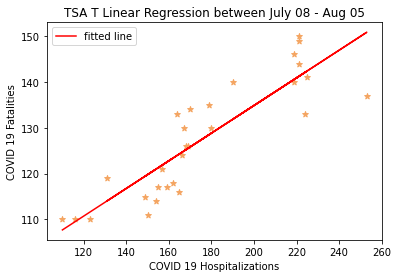

slope: 0.301504    intercept: 74.560348
R-squared: 0.760660 
Pearson corrrelation: 0.872158    Spearman correlation: 0.909573
Pearson p-value: 7.14E-10
Spearman p-value: 8.37E-12
This is a strongly positive relationship
A correlation p-value of 8.37476497587745e-12 indicates that the correlation between our samples is significant and different from zero.

Linear Regression p-value: 7.14E-10
A linear regression p-value this low strongly suggests that hospitalizations has a statistically significant affect on the value of fatalities


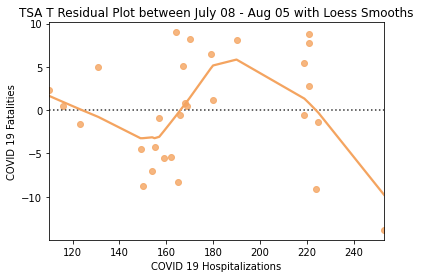

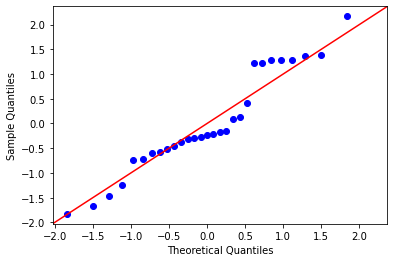

qq-plot of TSA T (July 08 - Aug 05) for Hospitalizations


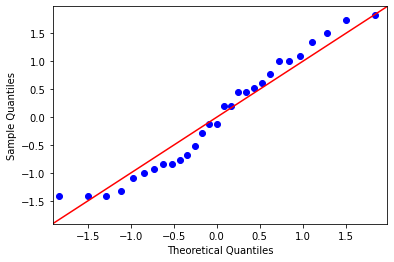

qq-plot of TSA T (July 08 - Aug 05) for Fatalities

levene p-value: 8.97E-4
There is strong evidence that the two samples do not have equal variances. This means it is strongly suggested to use a non-parametric analysis model to prevent commiting a Type 1 error! We therefore conduct Welch's t-test which does not assume equal population variance.

t-test p_value: 9.91E-8
There is significant evidence that the observed relationship between hospitalizations and fatalities is not due to random chance.


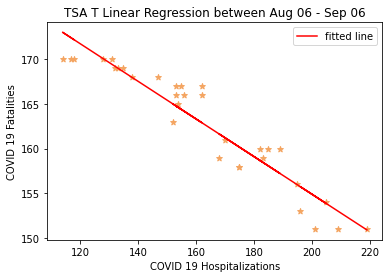

slope: -0.209830    intercept: 196.888631
R-squared: 0.899764 
Pearson corrrelation: -0.948559    Spearman correlation: -0.957304
Pearson p-value: 1.57E-16
Spearman p-value: 1.02E-17
This is a strongly negative relationship
A correlation p-value of 1.0188068258465052e-17 indicates that the correlation between our samples is significant and different from zero.

Linear Regression p-value: 1.57E-16
A linear regression p-value this low strongly suggests that hospitalizations has a statistically significant affect on the value of fatalities


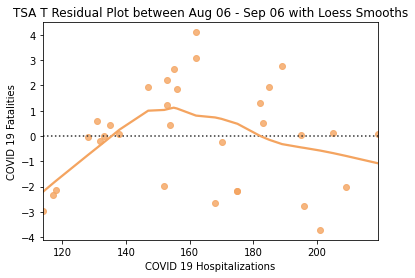

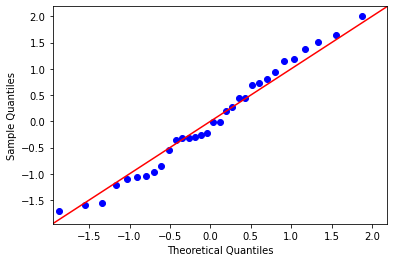

qq-plot of TSA T (Aug 06 - Sep 06) for Hospitalizations


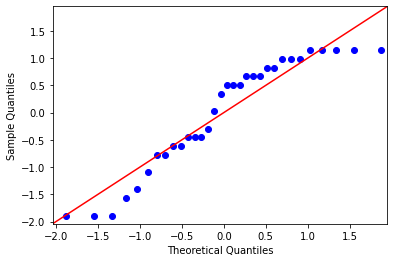

qq-plot of TSA T (Aug 06 - Sep 06) for Fatalities

levene p-value: 3.96E-8
There is strong evidence that the two samples do not have equal variances. This means it is strongly suggested to use a non-parametric analysis model to prevent commiting a Type 1 error! We therefore conduct Welch's t-test which does not assume equal population variance.

t-test p_value: 9.10E-1
There is not enough evidence to suggest that the observed relationship between hospitalizations and fatalities is due to anything but random chance.


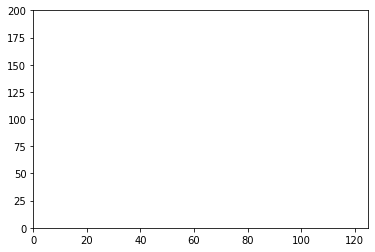

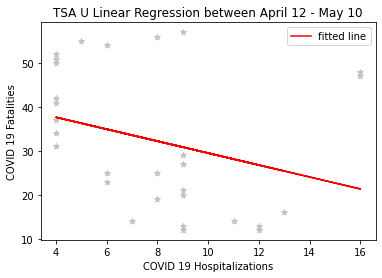

slope: -1.360079    intercept: 43.084759
R-squared: 0.091878 
Pearson corrrelation: -0.303114    Spearman correlation: -0.449737
Pearson p-value: 1.10E-1
Spearman p-value: 1.44E-2
This is a weakly negative relationship
A correlation p-value of 0.014374467530187764 indicates that the correlation between our samples is significant and different from zero.

Linear Regression p-value: 1.10E-1
There is not enough evidence to conclude if hospitalizations has a statistically significant affect on the value of fatalities.


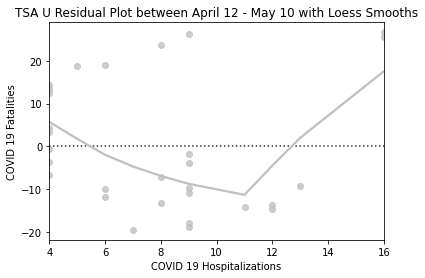

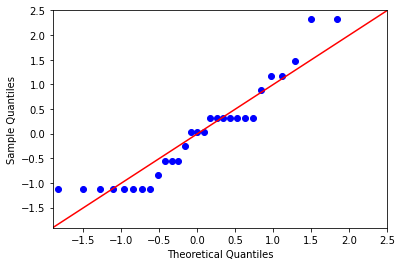

qq-plot of TSA U (April 12 - May 10) for Hospitalizations


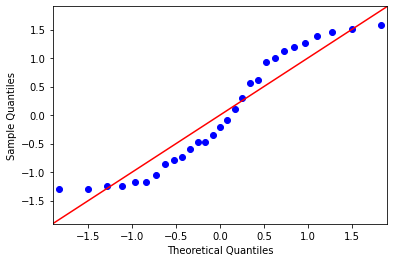

qq-plot of TSA U (April 12 - May 10) for Fatalities

levene p-value: 2.42E-9
There is strong evidence that the two samples do not have equal variances. This means it is strongly suggested to use a non-parametric analysis model to prevent commiting a Type 1 error! We therefore conduct Welch's t-test which does not assume equal population variance.

t-test p_value: 4.08E-9
There is significant evidence that the observed relationship between hospitalizations and fatalities is not due to random chance.


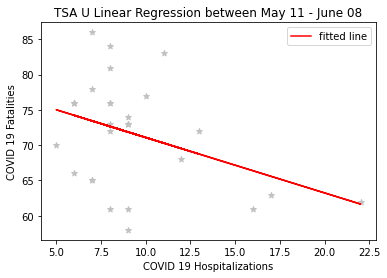

slope: -0.785932    intercept: 78.952747
R-squared: 0.150424 
Pearson corrrelation: -0.387845    Spearman correlation: -0.295385
Pearson p-value: 3.76E-2
Spearman p-value: 1.20E-1
This is a weakly negative relationship
A correlation p-value of 0.03762608690214742 indicates that the correlation between our samples is significant and different from zero.

Linear Regression p-value: 3.76E-2
A linear regression p-value this low strongly suggests that hospitalizations has a statistically significant affect on the value of fatalities


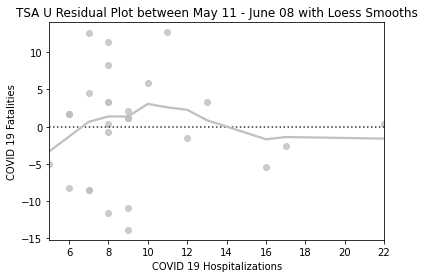

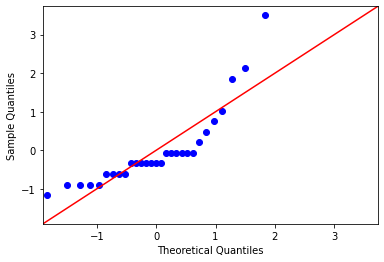

qq-plot of TSA U (May 11 - June 08) for Hospitalizations


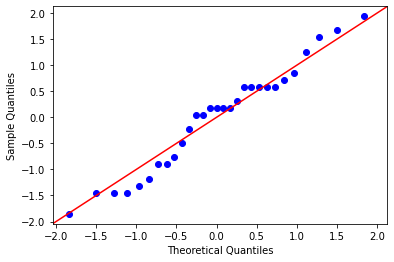

qq-plot of TSA U (May 11 - June 08) for Fatalities

levene p-value: 9.55E-4
There is strong evidence that the two samples do not have equal variances. This means it is strongly suggested to use a non-parametric analysis model to prevent commiting a Type 1 error! We therefore conduct Welch's t-test which does not assume equal population variance.

t-test p_value: 1.88E-34
There is significant evidence that the observed relationship between hospitalizations and fatalities is not due to random chance.


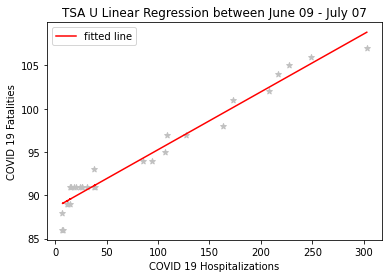

slope: 0.066817    intercept: 88.585236
R-squared: 0.955602 
Pearson corrrelation: 0.977549    Spearman correlation: 0.972146
Pearson p-value: 8.53E-20
Spearman p-value: 1.52E-18
This is a strongly positive relationship
A correlation p-value of 8.526813740238792e-20 indicates that the correlation between our samples is significant and different from zero.

Linear Regression p-value: 8.53E-20
A linear regression p-value this low strongly suggests that hospitalizations has a statistically significant affect on the value of fatalities


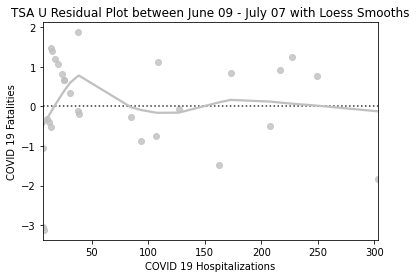

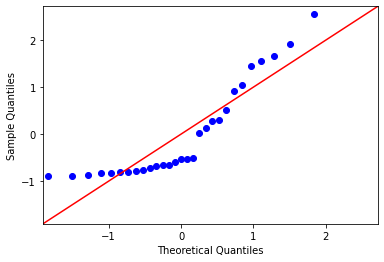

qq-plot of TSA U (June 09 - July 07) for Hospitalizations


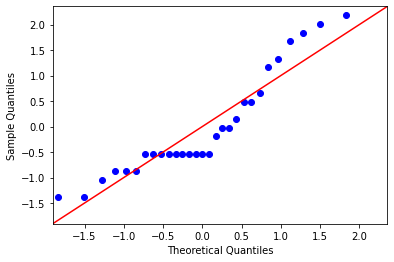

qq-plot of TSA U (June 09 - July 07) for Fatalities

levene p-value: 3.55E-5
There is strong evidence that the two samples do not have equal variances. This means it is strongly suggested to use a non-parametric analysis model to prevent commiting a Type 1 error! We therefore conduct Welch's t-test which does not assume equal population variance.

t-test p_value: 5.06E-1
There is not enough evidence to suggest that the observed relationship between hospitalizations and fatalities is due to anything but random chance.


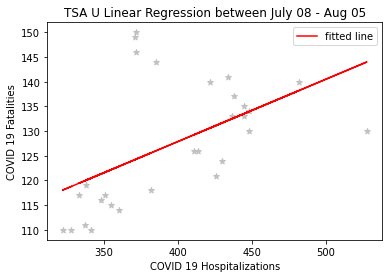

slope: 0.125950    intercept: 77.489746
R-squared: 0.273220 
Pearson corrrelation: 0.522704    Spearman correlation: 0.615442
Pearson p-value: 3.63E-3
Spearman p-value: 3.80E-4
This is a weakly positive relationship
A correlation p-value of 0.00038021138877994886 indicates that the correlation between our samples is significant and different from zero.

Linear Regression p-value: 3.63E-3
A linear regression p-value this low strongly suggests that hospitalizations has a statistically significant affect on the value of fatalities


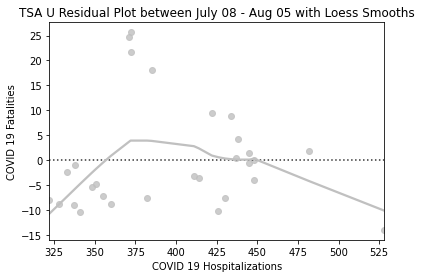

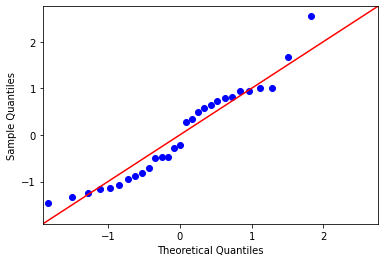

qq-plot of TSA U (July 08 - Aug 05) for Hospitalizations


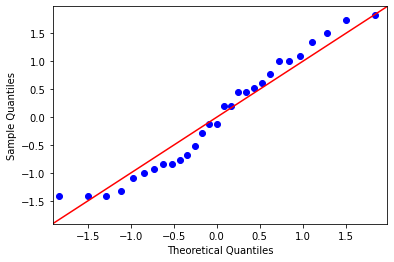

qq-plot of TSA U (July 08 - Aug 05) for Fatalities

levene p-value: 4.72E-8
There is strong evidence that the two samples do not have equal variances. This means it is strongly suggested to use a non-parametric analysis model to prevent commiting a Type 1 error! We therefore conduct Welch's t-test which does not assume equal population variance.

t-test p_value: 3.36E-23
There is significant evidence that the observed relationship between hospitalizations and fatalities is not due to random chance.


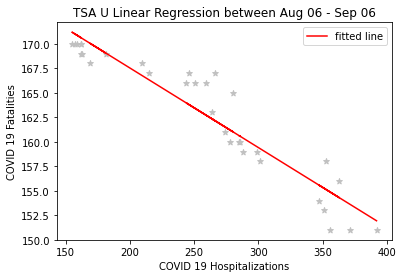

slope: -0.081253    intercept: 183.786772
R-squared: 0.892935 
Pearson corrrelation: -0.944952    Spearman correlation: -0.980034
Pearson p-value: 4.24E-16
Spearman p-value: 1.33E-22
This is a strongly negative relationship
A correlation p-value of 1.3256923994905015e-22 indicates that the correlation between our samples is significant and different from zero.

Linear Regression p-value: 4.24E-16
A linear regression p-value this low strongly suggests that hospitalizations has a statistically significant affect on the value of fatalities


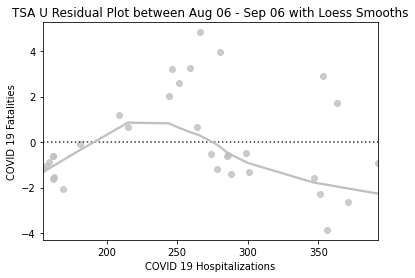

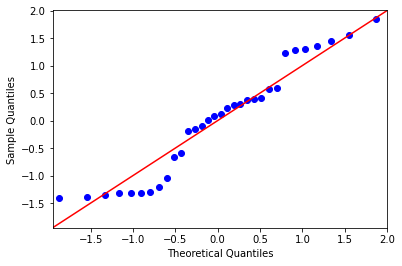

qq-plot of TSA U (Aug 06 - Sep 06) for Hospitalizations


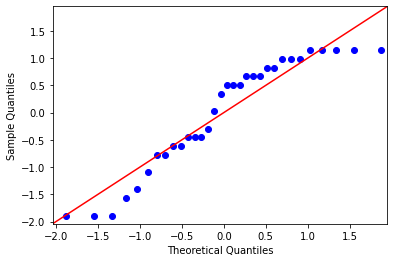

qq-plot of TSA U (Aug 06 - Sep 06) for Fatalities

levene p-value: 5.32E-10
There is strong evidence that the two samples do not have equal variances. This means it is strongly suggested to use a non-parametric analysis model to prevent commiting a Type 1 error! We therefore conduct Welch's t-test which does not assume equal population variance.

t-test p_value: 3.66E-8
There is significant evidence that the observed relationship between hospitalizations and fatalities is not due to random chance.


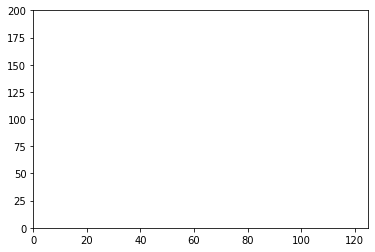

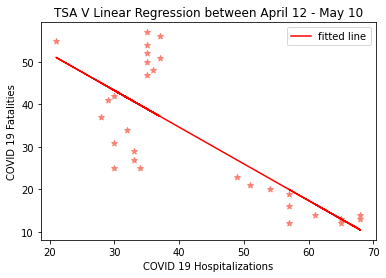

slope: -0.864883    intercept: 69.236561
R-squared: 0.593556 
Pearson corrrelation: -0.770426    Spearman correlation: -0.640281
Pearson p-value: 1.02E-6
Spearman p-value: 1.83E-4
This is a weakly negative relationship
A correlation p-value of 1.0168703933420052e-06 indicates that the correlation between our samples is significant and different from zero.

Linear Regression p-value: 1.02E-6
A linear regression p-value this low strongly suggests that hospitalizations has a statistically significant affect on the value of fatalities


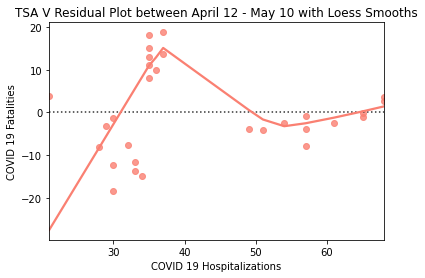

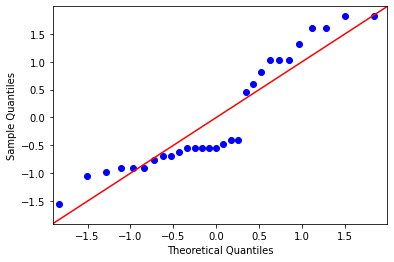

qq-plot of TSA V (April 12 - May 10) for Hospitalizations


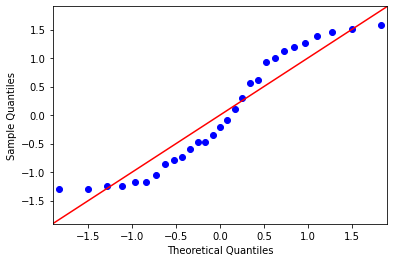

qq-plot of TSA V (April 12 - May 10) for Fatalities

levene p-value: 3.03E-1
There is not enough evidence to reject the assumption of equal variance between the samples. This means there is not enough evidence to prevent using a parametric analysis model. We therefore conduct a two-sided t-test, which assumes equal population variance.

t-test p_value: 1.16E-2
There is significant evidence that the observed relationship between hospitalizations and fatalities is not due to random chance.


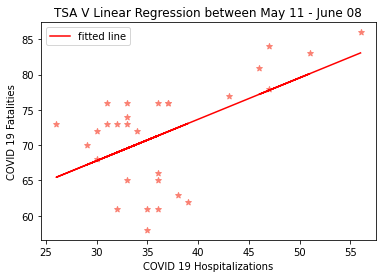

slope: 0.587317    intercept: 50.181708
R-squared: 0.297550 
Pearson corrrelation: 0.545481    Spearman correlation: 0.420204
Pearson p-value: 2.21E-3
Spearman p-value: 2.32E-2
This is a weakly positive relationship
A correlation p-value of 0.002210313158301633 indicates that the correlation between our samples is significant and different from zero.

Linear Regression p-value: 2.21E-3
A linear regression p-value this low strongly suggests that hospitalizations has a statistically significant affect on the value of fatalities


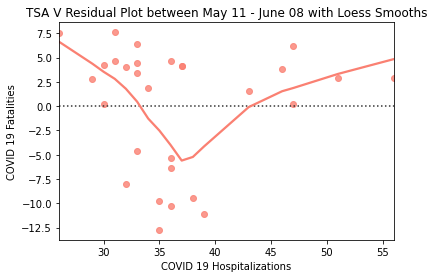

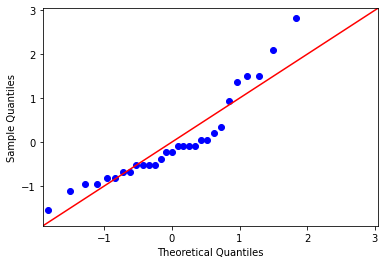

qq-plot of TSA V (May 11 - June 08) for Hospitalizations


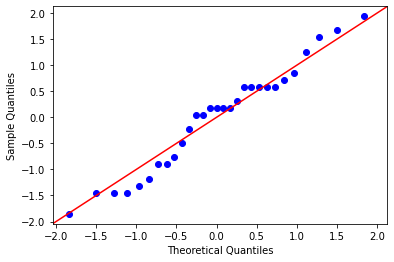

qq-plot of TSA V (May 11 - June 08) for Fatalities

levene p-value: 4.41E-1
There is not enough evidence to reject the assumption of equal variance between the samples. This means there is not enough evidence to prevent using a parametric analysis model. We therefore conduct a two-sided t-test, which assumes equal population variance.

t-test p_value: 2.03E-25
There is significant evidence that the observed relationship between hospitalizations and fatalities is not due to random chance.


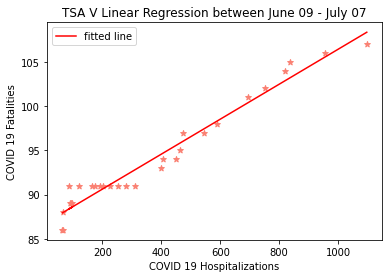

slope: 0.019798    intercept: 86.646019
R-squared: 0.959569 
Pearson corrrelation: 0.979576    Spearman correlation: 0.968514
Pearson p-value: 2.41E-20
Spearman p-value: 7.77E-18
This is a strongly positive relationship
A correlation p-value of 2.4057176853793423e-20 indicates that the correlation between our samples is significant and different from zero.

Linear Regression p-value: 2.41E-20
A linear regression p-value this low strongly suggests that hospitalizations has a statistically significant affect on the value of fatalities


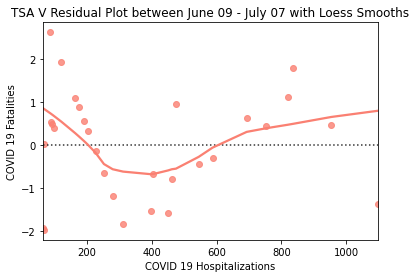

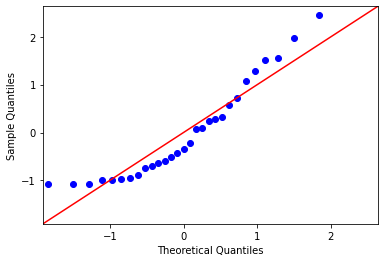

qq-plot of TSA V (June 09 - July 07) for Hospitalizations


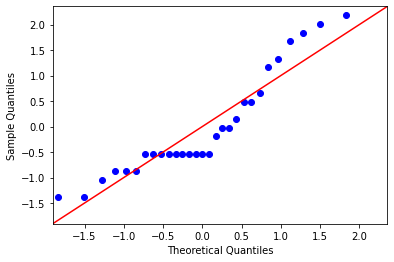

qq-plot of TSA V (June 09 - July 07) for Fatalities

levene p-value: 5.68E-8
There is strong evidence that the two samples do not have equal variances. This means it is strongly suggested to use a non-parametric analysis model to prevent commiting a Type 1 error! We therefore conduct Welch's t-test which does not assume equal population variance.

t-test p_value: 1.85E-5
There is significant evidence that the observed relationship between hospitalizations and fatalities is not due to random chance.


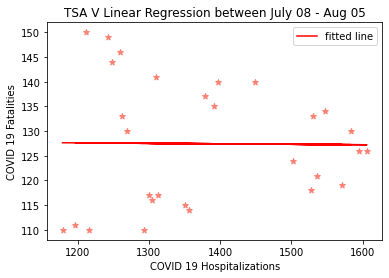

slope: -0.000947    intercept: 128.751791
R-squared: 0.000107 
Pearson corrrelation: -0.010323    Spearman correlation: 0.052275
Pearson p-value: 9.58E-1
Spearman p-value: 7.88E-1
This is a weakly negative relationship
Neither correlation p-value indicates that the correlation between our samples is significantly different from zero.

Linear Regression p-value: 9.58E-1
There is not enough evidence to conclude if hospitalizations has a statistically significant affect on the value of fatalities.


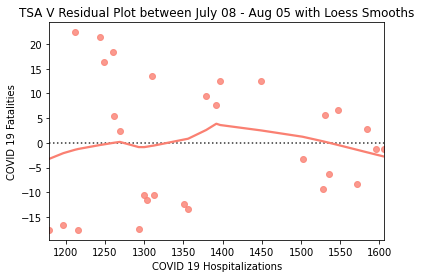

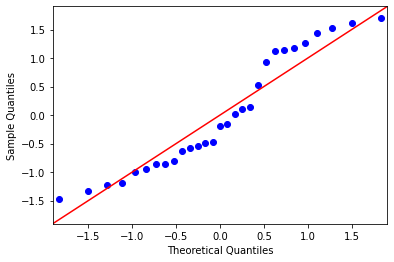

qq-plot of TSA V (July 08 - Aug 05) for Hospitalizations


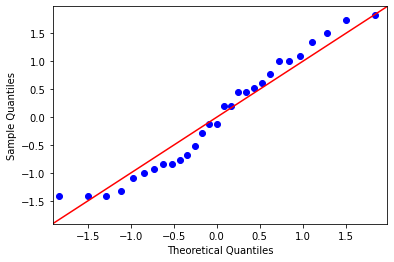

qq-plot of TSA V (July 08 - Aug 05) for Fatalities

levene p-value: 4.43E-10
There is strong evidence that the two samples do not have equal variances. This means it is strongly suggested to use a non-parametric analysis model to prevent commiting a Type 1 error! We therefore conduct Welch's t-test which does not assume equal population variance.

t-test p_value: 5.46E-29
There is significant evidence that the observed relationship between hospitalizations and fatalities is not due to random chance.


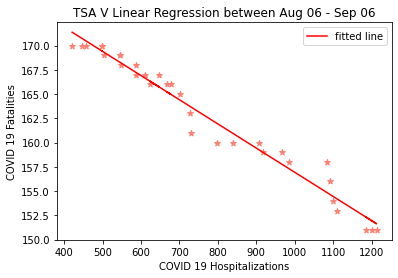

slope: -0.024917    intercept: 181.860422
R-squared: 0.967962 
Pearson corrrelation: -0.983851    Spearman correlation: -0.995039
Pearson p-value: 5.64E-24
Spearman p-value: 1.24E-31
This is a strongly negative relationship
A correlation p-value of 1.2444233000476378e-31 indicates that the correlation between our samples is significant and different from zero.

Linear Regression p-value: 5.64E-24
A linear regression p-value this low strongly suggests that hospitalizations has a statistically significant affect on the value of fatalities


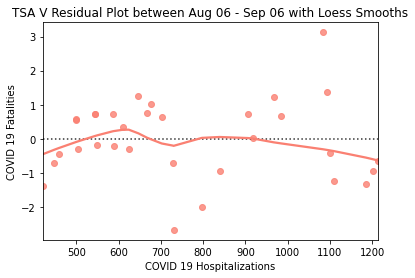

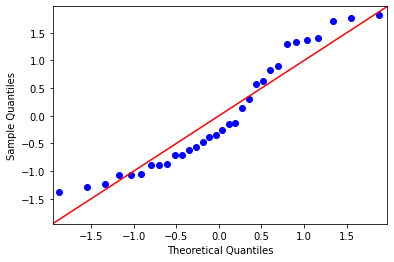

qq-plot of TSA V (Aug 06 - Sep 06) for Hospitalizations


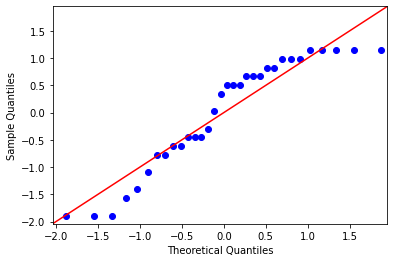

qq-plot of TSA V (Aug 06 - Sep 06) for Fatalities

levene p-value: 3.01E-10
There is strong evidence that the two samples do not have equal variances. This means it is strongly suggested to use a non-parametric analysis model to prevent commiting a Type 1 error! We therefore conduct Welch's t-test which does not assume equal population variance.

t-test p_value: 1.54E-14
There is significant evidence that the observed relationship between hospitalizations and fatalities is not due to random chance.


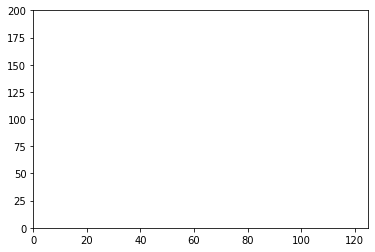

In [31]:
low_corr_p = 0
high_corr_p = 0

low_line_p = 0
high_line_p = 0

low_t = 0
high_t = 0

Pcor = []   # Use if want to see Pearson correlations, can comment out without error.
Scor = []   # Use if want to see Spearman correlations can comment out without error.
hosp_row = -1   # Start hospital row index before 0.

m_count = 0 # Keep track of marking symbols for plots
colors = itertools.cycle(["blue", "green", "y", "purple", "brown", "black", "orange", "cyan", "darkgreen", "gold", "magenta", "peachpuff", "grey", "maroon", "aqua", "lightgreen", "goldenrod", "fuchsia", "sandybrown", "silver", "salmon", "red"])
marks = itertools.cycle(['v', '+', 's', '*', 'o'])

c = "red"  # Starting color for plotting
m = 'o'    # Starting symbol for plotting; each symbol represents TSA region
counter = 0 # Keep track of when to change m_count condition

for TSA in regions: # (1)
    _, scatter_title, x_label_text, y_label_text, residual_title, linear_title, name = regions[TSA]   # (1.1)

    hosp_row += 1   # (1.2)
    hosp_col = 2    # Start iterating at column 2 for hospital_data
    fatal_col = 1   # Start iterating at column 1 for TSA data
    key = 0         # Index for dates dictionary
    
    c_count = 0     # Keep track of when to change colors
    while hosp_col < 150:   # (1.3.1)
        monthly_hospitalizations = []    # (1.3.2)
        monthly_fatalities = []
        
        
        if key == 4:    # For the last entry in dates, plot 32 days instead of 29
            for j in range(32): 
                monthly_hospitalizations.append(hospital_data.loc[hosp_row].at[hosp_col])    # (1.3.3)
                monthly_fatalities.append(TSA_A[fatal_col].sum())    # (1.3.4)
                hosp_col += 1
                fatal_col += 1
                if hosp_col == 150 or fatal_col == 149: # Break when out of columns
                    break
        else:
            for j in range(29): # If not the last entry in dates, plot 29 days of data
                monthly_hospitalizations.append(hospital_data.loc[hosp_row].at[hosp_col])    # (1.3.3)
                monthly_fatalities.append(TSA_A[fatal_col].sum())    # (1.3.4)
                hosp_col += 1
                fatal_col += 1
                if hosp_col == 150 or fatal_col == 149: # Break when out of columns
                    break
                
        plt.title(scatter_title + dates[key])   # (1.3.5)
        plt.xlabel(x_label_text)
        plt.ylabel(y_label_text)
        plt.scatter(monthly_hospitalizations, monthly_fatalities, color=c, marker=m)  
    
        x = np.asarray(monthly_hospitalizations) # (1.3.6)
        y = np.asarray(monthly_fatalities)
     
        slope, intercept, r_value, p_value_line, std_err = linregress(x=x, y=y) # (1.3.7)
        plt.title(linear_title + dates[key])
        plt.xlabel(x_label_text)
        plt.ylabel(y_label_text)
        plt.plot(x, intercept + slope*x, 'r', label='fitted line')
        plt.legend()
        plt.show()
        print("slope: %f    intercept: %f" % (slope, intercept))
        print("R-squared: %f " % r_value**2)
        
        """
        Both Pearson and Spearman correlations are used since there doesn't seem to be a consensus on which to use for count data. Both tend to be in sync on range and magnitude with only about 20 out of 109 values being noticible different.
        """
        corr, corr_p_value = pearsonr(x, y)    # (1.3.8)
        scorr, scorr_p_value = spearmanr(x, y)
        
        # uncomment if want to visually check differences between correlations.
        #Pcor.append(corr)
        #Scor.append(scorr)
        
        print("Pearson corrrelation: %f    Spearman correlation: %f" % (corr, scorr))
        print(f"Pearson p-value: {Decimal(corr_p_value):.2E}")
        print(f"Spearman p-value: {Decimal(scorr_p_value):.2E}")
        
        if corr == 0:
            print("This is a neutral relationship.")
        elif corr == -1:
            print("This is a perfectly negative relationship.")
        elif corr == 1:
            print("This is a perfectly positive relationship.")
        elif corr >= 0.8:
            print("This is a strongly positive relationship")
        elif corr > 0 and corr < 0.8:
            print("This is a weakly positive relationship")
        elif corr <= -0.8:
            print("This is a strongly negative relationship")
        elif corr < 0 and corr > -0.8:
            print("This is a weakly negative relationship")
        else:
            print("This is a mostly neutral relationship")
        
        if corr_p_value <= 0.05 or scorr_p_value <= 0.05:
            print(f"A correlation p-value of {min(corr_p_value, scorr_p_value)} indicates that the correlation between our samples is significant and different from zero.")
            low_corr_p += 1
        else:
            print(f"Neither correlation p-value indicates that the correlation between our samples is significantly different from zero.")
            high_corr_p += 1
        
        
        print(f"\nLinear Regression p-value: {Decimal(p_value_line):.2E}")  # (1.3.9)
        if p_value_line < 0.05:
            print("A linear regression p-value this low strongly suggests that hospitalizations has a statistically significant affect on the value of fatalities")
            low_line_p += 1
        else:
            print("There is not enough evidence to conclude if hospitalizations has a statistically significant affect on the value of fatalities.")
            high_line_p += 1
  
        sns.residplot(x=x, y=y, lowess=True, color=c).set_title(residual_title + dates[key] + " with Loess Smooths")    # (1.3.10)
        plt.xlabel(x_label_text)
        plt.ylabel(y_label_text)
        plt.show()
        
        sm.qqplot(x, line ='45', fit=True) # Check for normality of hospitalizations
        py.show() 
        print(f"qq-plot of {name} ({dates[key]}) for Hospitalizations")
        sm.qqplot(y, line='45', fit=True)   # Check for normality of fatalities
        py.show()
        print(f"qq-plot of {name} ({dates[key]}) for Fatalities\n")
        
        t_stat, p_value_t = (0, 0)
        levene_stat, p_val_levene = levene(x,y) # (1.3.11)
        print(f"levene p-value: {Decimal(p_val_levene):.2E}")
        if p_val_levene < 0.05:
            print("There is strong evidence that the two samples do not have equal variances. This means it is strongly suggested to use a non-parametric analysis model to prevent commiting a Type 1 error! We therefore conduct Welch's t-test which does not assume equal population variance.")
            t_stat, p_value_t = tt(x,y, equal_var=False)
        else:
            print("There is not enough evidence to reject the assumption of equal variance between the samples. This means there is not enough evidence to prevent using a parametric analysis model. We therefore conduct a two-sided t-test, which assumes equal population variance.")
            t_stat, p_value_t = tt(x,y, equal_var=True)
            
        print(f"\nt-test p_value: {Decimal(p_value_t):.2E}")
        
        if p_value_t < 0.05:    # (1.3.12)
            print("There is significant evidence that the observed relationship between hospitalizations and fatalities is not due to random chance.")
            low_t += 1
        else:
            print("There is not enough evidence to suggest that the observed relationship between hospitalizations and fatalities is due to anything but random chance.")
            high_t += 1
            
        c_count += 1    # Increase every loop
        if c_count == 5:   # When c_count is 5, all plots have been made for current TSA
            c = next(colors)
            m_count += 1    # Increase every time change color
            
        if counter < 2: # Counter is used to keep symbols in sync with final plot's legend
            if m_count == 5: # Check when complete to move to next column of final plot's legend
                m = next(marks)
                counter += 1
                m_count = 0
        else:
            if m_count == 4: # Check when complete to move to next column of final plot's legend
                m = next(marks)
                m_count = 0

        del monthly_hospitalizations[:]  # (1.3.13)
        del monthly_fatalities[:]
        key += 1
    axes = plt.gca()
    axes.set_xlim([0,125])
    axes.set_ylim([0,200])
    plt.show()


We have completed test for each TSA region individually. Now let's turn our attention to testing all the TSA regions against each other. In the case of comparing all the TSA regions to each other, we are plotting the sum of all hospitalizations against the sum of all fatalities for each region and will have the regions delinated with different symbols.

In [32]:
# These variables are the 2019 population estimates for each TSA region. 
A_total_pop = 431473
B_total_pop = 498426
C_total_pop = 222285
D_total_pop = 304390
E_total_pop = 7888098
F_total_pop = 279198
G_total_pop = 970139
H_total_pop = 279467
I_total_pop = 861432
J_total_pop = 481218
K_total_pop = 168836
L_total_pop = 490755
M_total_pop = 352301
N_total_pop = 361522
O_total_pop = 2321636
P_total_pop = 2840955
Q_total_pop = 6371536
R_total_pop = 1301086
S_total_pop = 178452
T_total_pop = 300996
U_total_pop = 595717
V_total_pop = 1401144

# This dictionary is for ease of access of the population variables.
pop_regions = {0 : A_total_pop,
               1 : B_total_pop,
               2 : C_total_pop,
               3 : D_total_pop,
               4 : E_total_pop,
               5 : F_total_pop,
               6 : G_total_pop,
               7 : H_total_pop,
               8 : I_total_pop,
               9 : J_total_pop,
               10: K_total_pop,
               11: L_total_pop,
               12: M_total_pop,
               13: N_total_pop,
               14: O_total_pop,
               15: P_total_pop,
               16: Q_total_pop,
               17: R_total_pop,
               18: S_total_pop,
               19: T_total_pop,
               20: U_total_pop,
               21: V_total_pop
               }


This loop is for plotting and analyzing the TSA regions as an aggregate. The first loop through is for comparing the nominal TSA populations and the second loop through is for comparing per capita TSA populations.

The loop flows as follows:

    (1) while we haven't done both nominal and per capita analysis:
        (1.2) define lists to hold total observed occurrences of hospitalizations and fatalities
        (1.3) reset row_index to zero
        (1.4) for each of the TSA regions in our dictionary:
            (1.4.1) reset index counters
            (1.4.2) unpack TSA dataframe from dictionary
            (1.4.3) set temporary variables to 0
            (1.4.4) while we haven't gone through all columns in hospital_data:
                (1.4.4.1) set first temp value to the sum of all columns for current TSA region
            (1.4.5) while we haven't gone through all columns in current TSA dataframe:
                (1.4.5.1) set second temp value to sum of all columns in current TSA region
            (1.4.6) populate lists with either nominal or per capita data
        (1.5) make variables a,...,v, each representing a single point on plot
        (1.6) make plot legend and determine appropriate location to place
        (1.7) determine appropriate title and labels for plot
        (1.8) calculate and plot linear regression
        (1.9) calculate correlation and interpret meaning
        (1.10) make appropriate residual plot
        (1.11) calculate levene p-value, interpret meaning, and use appropriate t-test
        (1.12) interpret meaning of t-test
        (1.13) delete lists


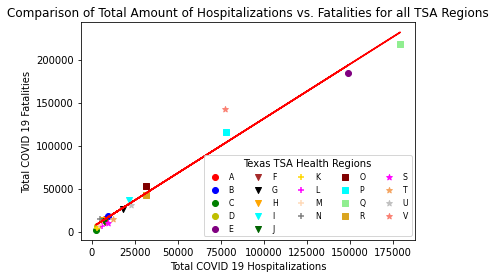

Pearson corrrelation: 0.985919    Spearman correlation: 0.946923
Pearson p-value: 5.22E-17
Spearman p-value: 2.57E-11
This is a strongly positive relationship
A correlation p-value of 5.2168934129885515e-17 indicates that the correlation between our samples is significant and different from zero.

slope: 1.267507    intercept: 4598.026999
R-squared: 0.972037

linear regression p_value: 5.22E-17
A linear regression p-value this low strongly suggests that hospitalizations has a statistically significant affect on the value of fatalities


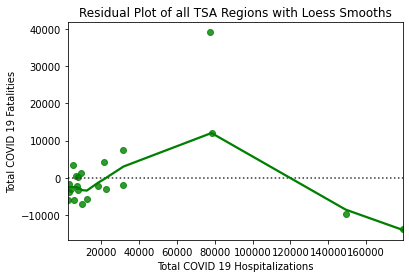

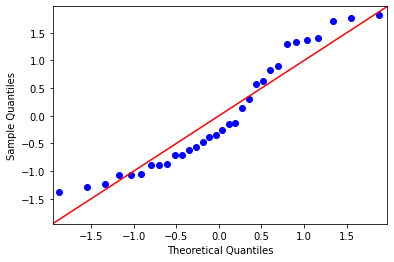

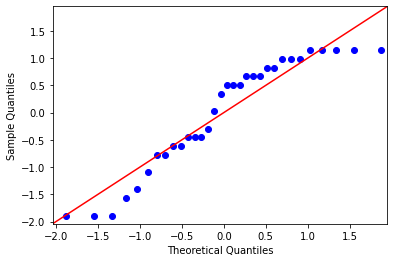

levene p-value: 5.56E-1
There is not enough evidence to reject the assumption of equal variance between the samples. This means there is not enough evidence to prevent using a parametric analysis model. We therefore conduct a two-sided t-test, which assumes equal population variance.

t-test p_value: 3.95E-20
There is significant evidence that the observed relationship between hospitalizations and fatalities is not due to random chance.


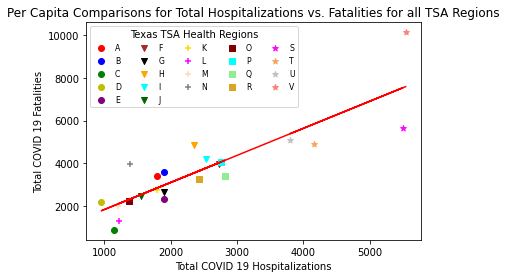

Pearson corrrelation: 0.863504    Spearman correlation: 0.879164
Pearson p-value: 2.28E-7
Spearman p-value: 7.21E-8
This is a strongly positive relationship
A correlation p-value of 7.20931918632671e-08 indicates that the correlation between our samples is significant and different from zero.

slope: 1.267278    intercept: 573.851244
R-squared: 0.745639

linear regression p_value: 2.28E-7
A linear regression p-value this low strongly suggests that hospitalizations has a statistically significant affect on the value of fatalities


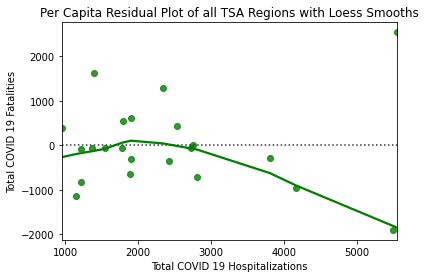

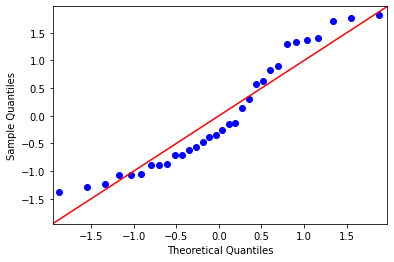

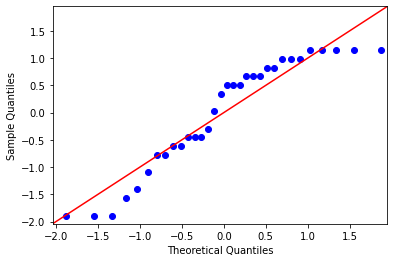

levene p-value: 3.32E-1
There is not enough evidence to reject the assumption of equal variance between the samples. This means there is not enough evidence to prevent using a parametric analysis model. We therefore conduct a two-sided t-test, which assumes equal population variance.

t-test p_value: 3.95E-20
There is significant evidence that the observed relationship between hospitalizations and fatalities is not due to random chance.


Test Results
------------

96 out of 112 correlation tests indicate that the correlation between our samples is significant and different from zero.

91 out of 112 linear relationship tests indicate that hospitalizations has a statistically significant affect on the value of fatalities.

106 out of 112 T-tests/Welch tests indicate that there is significant evidence that the above observed relationships between hospitalizations and fatalities is not due to random chance.



In [33]:
iterr = 0   # 0 = nominal population; 1 = per capita population
while iterr < 2:    # (1)
    hosp_sum = []   # (1.2)
    fatal_sum = []
    row_index = 0   # (1.3)
    for area in regions:    # (1.4)
        i = 2   # (1.4.1)
        j = 1
        TSA, _, _, _, _, _, _ = regions[area]  # (1.4.2)
        hosp_temp_sum = 0   # (1.4.3)
        fatal_temp_sum = 0
        while i < 150:  # (1.4.4)
            hosp_temp_sum += hospital_data.iloc[row_index].at[i]    # (1.4.4.1)
            i += 1
        while j < 149:  # (1.4.5)
            fatal_temp_sum += TSA[j].sum()  # (1.4.5.1)
            j += 1
        
        if iterr == 0:
            hosp_sum.append(hosp_temp_sum)  # (1.4.6)
            fatal_sum.append(fatal_temp_sum)
        else:
            hosp_sum.append((hosp_temp_sum / pop_regions[row_index]) * 100000) # (1.4.6)
            fatal_sum.append((fatal_temp_sum / pop_regions[row_index]) * 100000)
            
        row_index += 1  # Each row_index is TSA region in hospital_data

    # (1.5)
    a = plt.scatter(hosp_sum[0], fatal_sum[0], color="red", marker='o')
    b = plt.scatter(hosp_sum[1], fatal_sum[1], color="blue", marker='o')
    c = plt.scatter(hosp_sum[2], fatal_sum[2], color="green", marker='o')
    d = plt.scatter(hosp_sum[3], fatal_sum[3], color="y", marker='o')
    e = plt.scatter(hosp_sum[4], fatal_sum[4], color="purple", marker='o')
    f = plt.scatter(hosp_sum[5], fatal_sum[5], color="brown", marker='v')
    g = plt.scatter(hosp_sum[6], fatal_sum[6], color="black", marker='v')
    h = plt.scatter(hosp_sum[7], fatal_sum[7], color="orange", marker='v')
    i = plt.scatter(hosp_sum[8], fatal_sum[8], color="cyan", marker='v')
    j = plt.scatter(hosp_sum[9], fatal_sum[9], color="darkgreen", marker='v')
    k = plt.scatter(hosp_sum[10], fatal_sum[10], color="gold", marker='+')
    l = plt.scatter(hosp_sum[11], fatal_sum[11], color="magenta", marker='+')
    m = plt.scatter(hosp_sum[12], fatal_sum[12], color="peachpuff", marker='+')
    n = plt.scatter(hosp_sum[13], fatal_sum[13], color="grey", marker='+')
    o = plt.scatter(hosp_sum[14], fatal_sum[14], color="maroon", marker='s')
    p = plt.scatter(hosp_sum[15], fatal_sum[15], color="aqua", marker='s')
    q = plt.scatter(hosp_sum[16], fatal_sum[16], color="lightgreen", marker='s')
    r = plt.scatter(hosp_sum[17], fatal_sum[17], color="goldenrod", marker='s')
    s = plt.scatter(hosp_sum[18], fatal_sum[18], color="fuchsia", marker='*')
    t = plt.scatter(hosp_sum[19], fatal_sum[19], color="sandybrown", marker='*')
    u = plt.scatter(hosp_sum[20], fatal_sum[20], color="silver", marker='*')
    v = plt.scatter(hosp_sum[21], fatal_sum[21], color="salmon", marker='*')

    if iterr == 0:  # (1.6)
        plt.legend((a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p,q,r,s,t,u,v),
                   ('A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V'),
                    scatterpoints=1,
                    loc='lower right',
                    ncol=5,
                    fontsize=7.8,
                    title="Texas TSA Health Regions")
    else:   # (1.6)
        plt.legend((a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p,q,r,s,t,u,v),
                   ('A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V'),
                    scatterpoints=1,
                    loc='upper left',
                    ncol=5,
                    fontsize=7.8,
                    title="Texas TSA Health Regions")
    
    if iterr == 0:  # (1.7)
        plt.title("Comparison of Total Amount of Hospitalizations vs. Fatalities for all TSA Regions")
    else:   # (1.7)
        plt.title("Per Capita Comparisons for Total Hospitalizations vs. Fatalities for all TSA Regions")
    plt.xlabel("Total COVID 19 Hospitalizations")
    plt.ylabel("Total COVID 19 Fatalities")
    
    slope, intercept, r_value, p_value_line, std_err = linregress(x=hosp_sum, y=fatal_sum)  # (1.8)
    plt.plot(np.asarray(hosp_sum), intercept + slope * np.asarray(hosp_sum), 'r', label='fitted line')
    #plt.savefig("Per Capita Comparisons for Total Hospitalizations vs. Fatalities for all TSA Regions")
    plt.show()
    
    corr, corr_p_value = pearsonr(hosp_sum, fatal_sum) # (1.9)
    scorr, scorr_p_value = spearmanr(hosp_sum, fatal_sum)
    print("Pearson corrrelation: %f    Spearman correlation: %f" % (corr, scorr))
    print(f"Pearson p-value: {Decimal(corr_p_value):.2E}")
    print(f"Spearman p-value: {Decimal(scorr_p_value):.2E}")
    
    if corr == 0:
        print("This is a neutral relationship.")
    elif corr == -1:
        print("This is a perfectly negative relationship.")
    elif corr == 1:
        print("This is a perfectly positive relationship.")
    elif corr >= 0.8:
        print("This is a strongly positive relationship")
    elif corr > 0 and corr < 0.8:
        print("This is a weakly positive relationship")
    elif corr <= -0.8:
        print("This is a strongly negative relationship")
    elif corr < 0 and corr > -0.8:
        print("This is a weakly negative relationship")
    else:
        print("This is a mostly neutral relationship")
        
    if corr_p_value <= 0.05 or scorr_p_value <= 0.05:
        print(f"A correlation p-value of {min(corr_p_value, scorr_p_value)} indicates that the correlation between our samples is significant and different from zero.")
        low_corr_p += 1
    else:
        print(f"Neither correlation p-value indicates that the correlation between our samples is significantly different from zero.")
        high_corr_p += 1
        
    print("\nslope: %f    intercept: %f" % (slope, intercept))
    print("R-squared: %f" % r_value**2)
    print(f"\nlinear regression p_value: {Decimal(p_value_line):.2E}")
    if p_value_line < 0.05:
        print("A linear regression p-value this low strongly suggests that hospitalizations has a statistically significant affect on the value of fatalities")
        low_line_p += 1
    else:
        print("There is not enough evidence to conclude if hospitalizations has a statistically significant affect on the value of fatalities.")
        high_line_p += 1
    
    if iterr == 0:  # (1.10)
        sns.residplot(x=hosp_sum, y=fatal_sum, lowess=True, color="g").set_title("Residual Plot of all TSA Regions with Loess Smooths")
    else:   # (1.10)
        sns.residplot(x=hosp_sum, y=fatal_sum, lowess=True, color="g").set_title("Per Capita Residual Plot of all TSA Regions with Loess Smooths")
        
    plt.xlabel("Total COVID 19 Hospitalizations")
    plt.ylabel("Total COVID 19 Fatalities")
    #plt.savefig("Residual Plot of all TSA Regions with Loess Smooths")
    plt.show()
    
    sm.qqplot(x, line ='45', fit=True) # Check for normality of hospitalizations
    #plt.savefig(f"qq-plot of all TSA's for Hospitalizations")
    py.show() 
    #print(f"qq-plot of all TSA's for Hospitalizations")
    sm.qqplot(y, line='45', fit=True)   # Check for normality of fatalities
    #plt.savefig(f"qq-plot of all TSA's for Fatalities")
    py.show()
    #print(f"qq-plot of all TSA's for Fatalities")
    
    
    t_stat, p_value_t = (0, 0)
    levene_stat, p_val_levene = levene(hosp_sum, fatal_sum) # (1.11)
    print(f"levene p-value: {Decimal(p_val_levene):.2E}")
    if p_val_levene < 0.05:
        print("There is strong evidence that the two samples do not have equal variances. This means it is strongly suggested to use a non-parametric analysis model to prevent commiting a Type 1 error! We therefore conduct Welch's t-test which does not assume equal population variance.")
        t_stat, p_value_t = tt(x,y, equal_var=False)
    else:
        print("There is not enough evidence to reject the assumption of equal variance between the samples. This means there is not enough evidence to prevent using a parametric analysis model. We therefore conduct a two-sided t-test, which assumes equal population variance.")
        t_stat, p_value_t = tt(x,y, equal_var=True)
    
    print(f"\nt-test p_value: {Decimal(p_value_t):.2E}")
        
    if p_value_t < 0.05:    # (1.12)
        print("There is significant evidence that the observed relationship between hospitalizations and fatalities is not due to random chance.")
        low_t += 1
    else:   # (1.12)
        print("There is not enough evidence to suggest that the observed relationship between hospitalizations and fatalities is due to anything but random chance.")
        high_t += 1
    
    del hosp_sum[:] # (1.13)
    del fatal_sum[:]
    
    iterr += 1

print()
text = f"""
Test Results
------------

{low_corr_p} out of {low_corr_p + high_corr_p} correlation tests indicate that the correlation between our samples is significant and different from zero.

{low_line_p} out of {low_line_p + high_line_p} linear relationship tests indicate that hospitalizations has a statistically significant affect on the value of fatalities.

{low_t} out of {low_t + high_t} T-tests/Welch tests indicate that there is significant evidence that the above observed relationships between hospitalizations and fatalities is not due to random chance.
"""

print(text)



# Analysis


---

In both the TSA individual observations and as a nominal/per capita aggregate, we see the results matching to our suspected conclusions. In the case of the monthly individual observations, the majority of cases seem to align to the same conclusions; correlation values point to a strong linear relationship, as COVID 19 hospitalizations increase/decrease we see a corresponding increase/decrease for fatality data. The p-values for each correlation and regression test show that there is significant weight behind the theory of this relationship.

We also see that for many observations the Levene test and qq-plots show that there is significant evidence that our data does not follow a normal distribution. This result is not surprising as the nature of medical reports tend to follow a Poisson distribution. What it does mean is that our t-test analysis should be conducted with suspicion as the result may not necessarily align with the population's true central tendency.

The t-tests/Welch tests show that for our individual TSA regions there is significant evidence that the two samples' population means do not align, which we conclude then that our observations are not due to random chance and that the null hypothesis is rejected. From a visual analysis of the regression lines, we see that the t-tests lend credence to the trend of increasing/decreasing hospitalizations leading to increasing/decreasing fatalities, further strengthening our case for the two alternative hypothesis. Further testing should be conducted, as the small sample of time observed means we cannot say with definitive certainty that the alternative hypothesis are true, though I analysis does seem to be leading in that direction.

Further, we should be wary of relying soly on t-test analysis, as this test assumes the population's underlying distribution is normal or approximate to normal, which is certainly not the case as shown by the Levene test and qq-plots. It is suggested that future analysis focus on non-parametric tests to attain better certainty of results.

Similar results are shown for the aggregate case comparing all TSA regions, with the resulting plots showing a stronger linear relationship than the individual observations.
